In [1]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import shap
import numpy as np
import matplotlib.pylab as plt

# Load Dataset

In [2]:
from pandas import read_csv

train_dataset = read_csv('C:/Users/12569/Desktop/final project/train.csv')

In [3]:
train_dataset.head(10)

,Time,Hit_the_best_bid_or_lift_the_best_ask,Customer_order,Bid_ask,Mid_price,Micro_price,Best_bid,Best_ask,Time_elapsed,LOB_Imbalance,Total_quantity,P,Smith_metric,Trade_price
0,2.0000,0,137,910,544.0,771.5000,89,999,0.0000,0.5000,4,0.0000,0.0000,137
1,7.0250,0,106,8,93.0,92.6364,89,97,5.0250,0.5000,11,0.0000,0.0000,90
2,7.0500,1,96,30,82.0,79.0000,67,97,0.0250,0.6667,10,0.0000,0.0000,89
3,11.1125,0,144,10,88.0,87.4444,83,93,4.0625,0.6667,18,93.6567,422.7540,83
4,12.7375,1,139,9,89.5,88.3750,85,94,1.6250,0.5000,24,78.6667,435.5288,93
5,13.6875,0,111,7,90.5,89.8519,87,94,0.9500,0.5000,27,79.9300,383.1083,92
6,15.5875,1,116,9,96.5,95.2143,92,101,1.9000,0.5000,28,80.9767,344.9081,94
7,16.3375,0,150,6,98.0,97.4000,95,101,0.7500,0.5000,30,84.0433,307.1081,99
8,17.6250,0,119,6,98.0,97.7273,95,101,1.2875,0.5000,33,86.0400,280.1203,96
9,17.6875,1,98,11,95.5,94.8125,90,101,0.0625,0.5000,32,87.0800,260.5911,95


In [4]:
X = train_dataset.drop(labels = ['Trade_price'], axis = 1)
y = train_dataset['Trade_price']

X.head(10)

,Time,Hit_the_best_bid_or_lift_the_best_ask,Customer_order,Bid_ask,Mid_price,Micro_price,Best_bid,Best_ask,Time_elapsed,LOB_Imbalance,Total_quantity,P,Smith_metric
0,2.0000,0,137,910,544.0,771.5000,89,999,0.0000,0.5000,4,0.0000,0.0000
1,7.0250,0,106,8,93.0,92.6364,89,97,5.0250,0.5000,11,0.0000,0.0000
2,7.0500,1,96,30,82.0,79.0000,67,97,0.0250,0.6667,10,0.0000,0.0000
3,11.1125,0,144,10,88.0,87.4444,83,93,4.0625,0.6667,18,93.6567,422.7540
4,12.7375,1,139,9,89.5,88.3750,85,94,1.6250,0.5000,24,78.6667,435.5288
5,13.6875,0,111,7,90.5,89.8519,87,94,0.9500,0.5000,27,79.9300,383.1083
6,15.5875,1,116,9,96.5,95.2143,92,101,1.9000,0.5000,28,80.9767,344.9081
7,16.3375,0,150,6,98.0,97.4000,95,101,0.7500,0.5000,30,84.0433,307.1081
8,17.6250,0,119,6,98.0,97.7273,95,101,1.2875,0.5000,33,86.0400,280.1203
9,17.6875,1,98,11,95.5,94.8125,90,101,0.0625,0.5000,32,87.0800,260.5911


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

xgb_val = xgb.DMatrix(X_val, label = y_val)
xgb_train = xgb.DMatrix(X_train, label = y_train)
xgb_test = xgb.DMatrix(X_test, label = y_test)

# Train the model

In [6]:
watch_list = [(xgb_train, "train"), (xgb_val, "val")]

params = {
    'booster': 'gblinear',
    'objective': 'reg:squarederror',
    'lambda': 2,
    'eta': 0.1,
    'seed': 1000,
}

plst = list(params.items())

num_rounds = 50000
xgb_model = xgb.train(plst, xgb_val, num_rounds, watch_list)

[0]	train-rmse:14.88914	val-rmse:15.30308
[1]	train-rmse:9.63283	val-rmse:10.35082
[2]	train-rmse:9.05643	val-rmse:9.75630
[3]	train-rmse:8.80695	val-rmse:9.44135
[4]	train-rmse:8.59156	val-rmse:9.16342
[5]	train-rmse:8.39518	val-rmse:8.91128
[6]	train-rmse:8.20781	val-rmse:8.67496
[7]	train-rmse:8.03264	val-rmse:8.45698
[8]	train-rmse:7.88440	val-rmse:8.26425
[9]	train-rmse:7.74058	val-rmse:8.08344
[10]	train-rmse:7.61107	val-rmse:7.92048
[11]	train-rmse:7.48881	val-rmse:7.76848
[12]	train-rmse:7.37427	val-rmse:7.62750
[13]	train-rmse:7.26758	val-rmse:7.49694
[14]	train-rmse:7.16801	val-rmse:7.37567
[15]	train-rmse:7.07309	val-rmse:7.26129
[16]	train-rmse:6.98552	val-rmse:7.15598
[17]	train-rmse:6.89963	val-rmse:7.05401
[18]	train-rmse:6.82240	val-rmse:6.96182
[19]	train-rmse:6.74855	val-rmse:6.87476
[20]	train-rmse:6.67822	val-rmse:6.79236
[21]	train-rmse:6.61108	val-rmse:6.71416
[22]	train-rmse:6.54752	val-rmse:6.64008
[23]	train-rmse:6.48677	val-rmse:6.56990
[24]	train-rmse:6.42974

[198]	train-rmse:4.85552	val-rmse:4.70261
[199]	train-rmse:4.85446	val-rmse:4.70143
[200]	train-rmse:4.85336	val-rmse:4.70024
[201]	train-rmse:4.85228	val-rmse:4.69902
[202]	train-rmse:4.85120	val-rmse:4.69785
[203]	train-rmse:4.85013	val-rmse:4.69669
[204]	train-rmse:4.84905	val-rmse:4.69550
[205]	train-rmse:4.84800	val-rmse:4.69432
[206]	train-rmse:4.84689	val-rmse:4.69313
[207]	train-rmse:4.84584	val-rmse:4.69196
[208]	train-rmse:4.84479	val-rmse:4.69082
[209]	train-rmse:4.84375	val-rmse:4.68969
[210]	train-rmse:4.84272	val-rmse:4.68854
[211]	train-rmse:4.84162	val-rmse:4.68734
[212]	train-rmse:4.84056	val-rmse:4.68619
[213]	train-rmse:4.83955	val-rmse:4.68509
[214]	train-rmse:4.83855	val-rmse:4.68400
[215]	train-rmse:4.83751	val-rmse:4.68287
[216]	train-rmse:4.83650	val-rmse:4.68177
[217]	train-rmse:4.83548	val-rmse:4.68068
[218]	train-rmse:4.83446	val-rmse:4.67958
[219]	train-rmse:4.83343	val-rmse:4.67848
[220]	train-rmse:4.83244	val-rmse:4.67740
[221]	train-rmse:4.83144	val-rmse:

[394]	train-rmse:4.68624	val-rmse:4.52597
[395]	train-rmse:4.68556	val-rmse:4.52530
[396]	train-rmse:4.68488	val-rmse:4.52462
[397]	train-rmse:4.68421	val-rmse:4.52393
[398]	train-rmse:4.68355	val-rmse:4.52326
[399]	train-rmse:4.68288	val-rmse:4.52257
[400]	train-rmse:4.68220	val-rmse:4.52190
[401]	train-rmse:4.68154	val-rmse:4.52123
[402]	train-rmse:4.68088	val-rmse:4.52056
[403]	train-rmse:4.68021	val-rmse:4.51987
[404]	train-rmse:4.67954	val-rmse:4.51921
[405]	train-rmse:4.67889	val-rmse:4.51855
[406]	train-rmse:4.67820	val-rmse:4.51786
[407]	train-rmse:4.67756	val-rmse:4.51720
[408]	train-rmse:4.67692	val-rmse:4.51655
[409]	train-rmse:4.67627	val-rmse:4.51589
[410]	train-rmse:4.67562	val-rmse:4.51523
[411]	train-rmse:4.67495	val-rmse:4.51457
[412]	train-rmse:4.67430	val-rmse:4.51389
[413]	train-rmse:4.67363	val-rmse:4.51321
[414]	train-rmse:4.67297	val-rmse:4.51254
[415]	train-rmse:4.67234	val-rmse:4.51189
[416]	train-rmse:4.67167	val-rmse:4.51121
[417]	train-rmse:4.67101	val-rmse:

[590]	train-rmse:4.57993	val-rmse:4.41901
[591]	train-rmse:4.57949	val-rmse:4.41857
[592]	train-rmse:4.57905	val-rmse:4.41813
[593]	train-rmse:4.57863	val-rmse:4.41772
[594]	train-rmse:4.57821	val-rmse:4.41730
[595]	train-rmse:4.57778	val-rmse:4.41687
[596]	train-rmse:4.57737	val-rmse:4.41645
[597]	train-rmse:4.57695	val-rmse:4.41603
[598]	train-rmse:4.57653	val-rmse:4.41561
[599]	train-rmse:4.57611	val-rmse:4.41520
[600]	train-rmse:4.57569	val-rmse:4.41478
[601]	train-rmse:4.57528	val-rmse:4.41437
[602]	train-rmse:4.57485	val-rmse:4.41393
[603]	train-rmse:4.57442	val-rmse:4.41350
[604]	train-rmse:4.57400	val-rmse:4.41308
[605]	train-rmse:4.57358	val-rmse:4.41266
[606]	train-rmse:4.57317	val-rmse:4.41226
[607]	train-rmse:4.57277	val-rmse:4.41186
[608]	train-rmse:4.57236	val-rmse:4.41145
[609]	train-rmse:4.57195	val-rmse:4.41105
[610]	train-rmse:4.57155	val-rmse:4.41064
[611]	train-rmse:4.57115	val-rmse:4.41025
[612]	train-rmse:4.57075	val-rmse:4.40984
[613]	train-rmse:4.57035	val-rmse:

[786]	train-rmse:4.51201	val-rmse:4.35172
[787]	train-rmse:4.51173	val-rmse:4.35145
[788]	train-rmse:4.51144	val-rmse:4.35116
[789]	train-rmse:4.51115	val-rmse:4.35088
[790]	train-rmse:4.51086	val-rmse:4.35061
[791]	train-rmse:4.51060	val-rmse:4.35035
[792]	train-rmse:4.51032	val-rmse:4.35008
[793]	train-rmse:4.51005	val-rmse:4.34981
[794]	train-rmse:4.50977	val-rmse:4.34954
[795]	train-rmse:4.50951	val-rmse:4.34928
[796]	train-rmse:4.50924	val-rmse:4.34901
[797]	train-rmse:4.50896	val-rmse:4.34874
[798]	train-rmse:4.50868	val-rmse:4.34847
[799]	train-rmse:4.50841	val-rmse:4.34820
[800]	train-rmse:4.50814	val-rmse:4.34794
[801]	train-rmse:4.50786	val-rmse:4.34767
[802]	train-rmse:4.50759	val-rmse:4.34739
[803]	train-rmse:4.50731	val-rmse:4.34712
[804]	train-rmse:4.50704	val-rmse:4.34686
[805]	train-rmse:4.50676	val-rmse:4.34658
[806]	train-rmse:4.50648	val-rmse:4.34631
[807]	train-rmse:4.50620	val-rmse:4.34604
[808]	train-rmse:4.50593	val-rmse:4.34579
[809]	train-rmse:4.50568	val-rmse:

[982]	train-rmse:4.46712	val-rmse:4.30800
[983]	train-rmse:4.46694	val-rmse:4.30782
[984]	train-rmse:4.46676	val-rmse:4.30764
[985]	train-rmse:4.46657	val-rmse:4.30746
[986]	train-rmse:4.46638	val-rmse:4.30728
[987]	train-rmse:4.46619	val-rmse:4.30709
[988]	train-rmse:4.46600	val-rmse:4.30692
[989]	train-rmse:4.46582	val-rmse:4.30675
[990]	train-rmse:4.46564	val-rmse:4.30657
[991]	train-rmse:4.46545	val-rmse:4.30639
[992]	train-rmse:4.46527	val-rmse:4.30621
[993]	train-rmse:4.46509	val-rmse:4.30604
[994]	train-rmse:4.46491	val-rmse:4.30587
[995]	train-rmse:4.46473	val-rmse:4.30569
[996]	train-rmse:4.46455	val-rmse:4.30551
[997]	train-rmse:4.46436	val-rmse:4.30533
[998]	train-rmse:4.46418	val-rmse:4.30516
[999]	train-rmse:4.46399	val-rmse:4.30498
[1000]	train-rmse:4.46381	val-rmse:4.30480
[1001]	train-rmse:4.46363	val-rmse:4.30462
[1002]	train-rmse:4.46344	val-rmse:4.30444
[1003]	train-rmse:4.46326	val-rmse:4.30427
[1004]	train-rmse:4.46308	val-rmse:4.30410
[1005]	train-rmse:4.46290	val

[1173]	train-rmse:4.43698	val-rmse:4.27914
[1174]	train-rmse:4.43684	val-rmse:4.27901
[1175]	train-rmse:4.43671	val-rmse:4.27889
[1176]	train-rmse:4.43658	val-rmse:4.27876
[1177]	train-rmse:4.43644	val-rmse:4.27863
[1178]	train-rmse:4.43631	val-rmse:4.27851
[1179]	train-rmse:4.43618	val-rmse:4.27838
[1180]	train-rmse:4.43605	val-rmse:4.27826
[1181]	train-rmse:4.43592	val-rmse:4.27814
[1182]	train-rmse:4.43579	val-rmse:4.27802
[1183]	train-rmse:4.43566	val-rmse:4.27789
[1184]	train-rmse:4.43553	val-rmse:4.27777
[1185]	train-rmse:4.43540	val-rmse:4.27764
[1186]	train-rmse:4.43527	val-rmse:4.27752
[1187]	train-rmse:4.43514	val-rmse:4.27740
[1188]	train-rmse:4.43501	val-rmse:4.27728
[1189]	train-rmse:4.43488	val-rmse:4.27715
[1190]	train-rmse:4.43475	val-rmse:4.27703
[1191]	train-rmse:4.43462	val-rmse:4.27691
[1192]	train-rmse:4.43449	val-rmse:4.27678
[1193]	train-rmse:4.43436	val-rmse:4.27666
[1194]	train-rmse:4.43424	val-rmse:4.27654
[1195]	train-rmse:4.43411	val-rmse:4.27642
[1196]	trai

[1364]	train-rmse:4.41525	val-rmse:4.25865
[1365]	train-rmse:4.41516	val-rmse:4.25856
[1366]	train-rmse:4.41506	val-rmse:4.25847
[1367]	train-rmse:4.41496	val-rmse:4.25838
[1368]	train-rmse:4.41486	val-rmse:4.25829
[1369]	train-rmse:4.41476	val-rmse:4.25820
[1370]	train-rmse:4.41467	val-rmse:4.25811
[1371]	train-rmse:4.41457	val-rmse:4.25802
[1372]	train-rmse:4.41448	val-rmse:4.25794
[1373]	train-rmse:4.41438	val-rmse:4.25785
[1374]	train-rmse:4.41429	val-rmse:4.25776
[1375]	train-rmse:4.41419	val-rmse:4.25767
[1376]	train-rmse:4.41409	val-rmse:4.25758
[1377]	train-rmse:4.41399	val-rmse:4.25748
[1378]	train-rmse:4.41390	val-rmse:4.25739
[1379]	train-rmse:4.41381	val-rmse:4.25730
[1380]	train-rmse:4.41371	val-rmse:4.25721
[1381]	train-rmse:4.41361	val-rmse:4.25713
[1382]	train-rmse:4.41352	val-rmse:4.25704
[1383]	train-rmse:4.41342	val-rmse:4.25695
[1384]	train-rmse:4.41333	val-rmse:4.25686
[1385]	train-rmse:4.41324	val-rmse:4.25678
[1386]	train-rmse:4.41314	val-rmse:4.25669
[1387]	trai

[1555]	train-rmse:4.39885	val-rmse:4.24340
[1556]	train-rmse:4.39877	val-rmse:4.24333
[1557]	train-rmse:4.39870	val-rmse:4.24326
[1558]	train-rmse:4.39863	val-rmse:4.24319
[1559]	train-rmse:4.39855	val-rmse:4.24312
[1560]	train-rmse:4.39848	val-rmse:4.24305
[1561]	train-rmse:4.39840	val-rmse:4.24299
[1562]	train-rmse:4.39832	val-rmse:4.24292
[1563]	train-rmse:4.39825	val-rmse:4.24285
[1564]	train-rmse:4.39818	val-rmse:4.24278
[1565]	train-rmse:4.39811	val-rmse:4.24271
[1566]	train-rmse:4.39803	val-rmse:4.24265
[1567]	train-rmse:4.39796	val-rmse:4.24258
[1568]	train-rmse:4.39788	val-rmse:4.24251
[1569]	train-rmse:4.39781	val-rmse:4.24244
[1570]	train-rmse:4.39774	val-rmse:4.24237
[1571]	train-rmse:4.39767	val-rmse:4.24231
[1572]	train-rmse:4.39759	val-rmse:4.24224
[1573]	train-rmse:4.39752	val-rmse:4.24217
[1574]	train-rmse:4.39745	val-rmse:4.24210
[1575]	train-rmse:4.39737	val-rmse:4.24203
[1576]	train-rmse:4.39729	val-rmse:4.24196
[1577]	train-rmse:4.39722	val-rmse:4.24189
[1578]	trai

[1746]	train-rmse:4.38602	val-rmse:4.23158
[1747]	train-rmse:4.38596	val-rmse:4.23152
[1748]	train-rmse:4.38590	val-rmse:4.23147
[1749]	train-rmse:4.38584	val-rmse:4.23141
[1750]	train-rmse:4.38578	val-rmse:4.23136
[1751]	train-rmse:4.38572	val-rmse:4.23130
[1752]	train-rmse:4.38566	val-rmse:4.23125
[1753]	train-rmse:4.38560	val-rmse:4.23119
[1754]	train-rmse:4.38553	val-rmse:4.23113
[1755]	train-rmse:4.38547	val-rmse:4.23108
[1756]	train-rmse:4.38541	val-rmse:4.23102
[1757]	train-rmse:4.38535	val-rmse:4.23097
[1758]	train-rmse:4.38530	val-rmse:4.23092
[1759]	train-rmse:4.38524	val-rmse:4.23086
[1760]	train-rmse:4.38518	val-rmse:4.23081
[1761]	train-rmse:4.38512	val-rmse:4.23076
[1762]	train-rmse:4.38506	val-rmse:4.23070
[1763]	train-rmse:4.38500	val-rmse:4.23065
[1764]	train-rmse:4.38494	val-rmse:4.23059
[1765]	train-rmse:4.38489	val-rmse:4.23054
[1766]	train-rmse:4.38483	val-rmse:4.23048
[1767]	train-rmse:4.38477	val-rmse:4.23043
[1768]	train-rmse:4.38471	val-rmse:4.23038
[1769]	trai

[1937]	train-rmse:4.37555	val-rmse:4.22200
[1938]	train-rmse:4.37550	val-rmse:4.22195
[1939]	train-rmse:4.37546	val-rmse:4.22191
[1940]	train-rmse:4.37541	val-rmse:4.22187
[1941]	train-rmse:4.37536	val-rmse:4.22182
[1942]	train-rmse:4.37531	val-rmse:4.22178
[1943]	train-rmse:4.37526	val-rmse:4.22173
[1944]	train-rmse:4.37521	val-rmse:4.22168
[1945]	train-rmse:4.37516	val-rmse:4.22164
[1946]	train-rmse:4.37511	val-rmse:4.22159
[1947]	train-rmse:4.37506	val-rmse:4.22155
[1948]	train-rmse:4.37501	val-rmse:4.22151
[1949]	train-rmse:4.37495	val-rmse:4.22145
[1950]	train-rmse:4.37491	val-rmse:4.22141
[1951]	train-rmse:4.37486	val-rmse:4.22136
[1952]	train-rmse:4.37481	val-rmse:4.22132
[1953]	train-rmse:4.37476	val-rmse:4.22128
[1954]	train-rmse:4.37471	val-rmse:4.22123
[1955]	train-rmse:4.37466	val-rmse:4.22119
[1956]	train-rmse:4.37461	val-rmse:4.22114
[1957]	train-rmse:4.37456	val-rmse:4.22110
[1958]	train-rmse:4.37451	val-rmse:4.22105
[1959]	train-rmse:4.37446	val-rmse:4.22101
[1960]	trai

[2128]	train-rmse:4.36675	val-rmse:4.21398
[2129]	train-rmse:4.36671	val-rmse:4.21394
[2130]	train-rmse:4.36667	val-rmse:4.21390
[2131]	train-rmse:4.36662	val-rmse:4.21386
[2132]	train-rmse:4.36658	val-rmse:4.21382
[2133]	train-rmse:4.36653	val-rmse:4.21378
[2134]	train-rmse:4.36649	val-rmse:4.21374
[2135]	train-rmse:4.36645	val-rmse:4.21370
[2136]	train-rmse:4.36641	val-rmse:4.21367
[2137]	train-rmse:4.36637	val-rmse:4.21363
[2138]	train-rmse:4.36633	val-rmse:4.21359
[2139]	train-rmse:4.36628	val-rmse:4.21355
[2140]	train-rmse:4.36624	val-rmse:4.21351
[2141]	train-rmse:4.36620	val-rmse:4.21347
[2142]	train-rmse:4.36616	val-rmse:4.21343
[2143]	train-rmse:4.36611	val-rmse:4.21340
[2144]	train-rmse:4.36607	val-rmse:4.21335
[2145]	train-rmse:4.36602	val-rmse:4.21332
[2146]	train-rmse:4.36598	val-rmse:4.21328
[2147]	train-rmse:4.36594	val-rmse:4.21324
[2148]	train-rmse:4.36590	val-rmse:4.21320
[2149]	train-rmse:4.36586	val-rmse:4.21316
[2150]	train-rmse:4.36582	val-rmse:4.21313
[2151]	trai

[2319]	train-rmse:4.35916	val-rmse:4.20705
[2320]	train-rmse:4.35913	val-rmse:4.20702
[2321]	train-rmse:4.35909	val-rmse:4.20699
[2322]	train-rmse:4.35905	val-rmse:4.20695
[2323]	train-rmse:4.35901	val-rmse:4.20692
[2324]	train-rmse:4.35898	val-rmse:4.20688
[2325]	train-rmse:4.35894	val-rmse:4.20685
[2326]	train-rmse:4.35890	val-rmse:4.20681
[2327]	train-rmse:4.35886	val-rmse:4.20678
[2328]	train-rmse:4.35883	val-rmse:4.20675
[2329]	train-rmse:4.35879	val-rmse:4.20671
[2330]	train-rmse:4.35875	val-rmse:4.20668
[2331]	train-rmse:4.35872	val-rmse:4.20664
[2332]	train-rmse:4.35868	val-rmse:4.20661
[2333]	train-rmse:4.35864	val-rmse:4.20657
[2334]	train-rmse:4.35860	val-rmse:4.20654
[2335]	train-rmse:4.35857	val-rmse:4.20651
[2336]	train-rmse:4.35853	val-rmse:4.20648
[2337]	train-rmse:4.35850	val-rmse:4.20644
[2338]	train-rmse:4.35846	val-rmse:4.20641
[2339]	train-rmse:4.35842	val-rmse:4.20637
[2340]	train-rmse:4.35838	val-rmse:4.20634
[2341]	train-rmse:4.35835	val-rmse:4.20631
[2342]	trai

[2510]	train-rmse:4.35245	val-rmse:4.20092
[2511]	train-rmse:4.35242	val-rmse:4.20089
[2512]	train-rmse:4.35238	val-rmse:4.20086
[2513]	train-rmse:4.35235	val-rmse:4.20083
[2514]	train-rmse:4.35232	val-rmse:4.20080
[2515]	train-rmse:4.35229	val-rmse:4.20077
[2516]	train-rmse:4.35225	val-rmse:4.20073
[2517]	train-rmse:4.35222	val-rmse:4.20071
[2518]	train-rmse:4.35219	val-rmse:4.20068
[2519]	train-rmse:4.35216	val-rmse:4.20065
[2520]	train-rmse:4.35212	val-rmse:4.20061
[2521]	train-rmse:4.35209	val-rmse:4.20059
[2522]	train-rmse:4.35206	val-rmse:4.20055
[2523]	train-rmse:4.35202	val-rmse:4.20052
[2524]	train-rmse:4.35199	val-rmse:4.20050
[2525]	train-rmse:4.35196	val-rmse:4.20046
[2526]	train-rmse:4.35192	val-rmse:4.20043
[2527]	train-rmse:4.35189	val-rmse:4.20040
[2528]	train-rmse:4.35186	val-rmse:4.20038
[2529]	train-rmse:4.35182	val-rmse:4.20034
[2530]	train-rmse:4.35180	val-rmse:4.20031
[2531]	train-rmse:4.35176	val-rmse:4.20028
[2532]	train-rmse:4.35173	val-rmse:4.20025
[2533]	trai

[2701]	train-rmse:4.34642	val-rmse:4.19538
[2702]	train-rmse:4.34639	val-rmse:4.19536
[2703]	train-rmse:4.34636	val-rmse:4.19533
[2704]	train-rmse:4.34633	val-rmse:4.19530
[2705]	train-rmse:4.34630	val-rmse:4.19527
[2706]	train-rmse:4.34627	val-rmse:4.19524
[2707]	train-rmse:4.34624	val-rmse:4.19522
[2708]	train-rmse:4.34621	val-rmse:4.19519
[2709]	train-rmse:4.34618	val-rmse:4.19516
[2710]	train-rmse:4.34615	val-rmse:4.19513
[2711]	train-rmse:4.34612	val-rmse:4.19510
[2712]	train-rmse:4.34609	val-rmse:4.19508
[2713]	train-rmse:4.34606	val-rmse:4.19505
[2714]	train-rmse:4.34603	val-rmse:4.19502
[2715]	train-rmse:4.34600	val-rmse:4.19500
[2716]	train-rmse:4.34597	val-rmse:4.19497
[2717]	train-rmse:4.34594	val-rmse:4.19494
[2718]	train-rmse:4.34591	val-rmse:4.19491
[2719]	train-rmse:4.34588	val-rmse:4.19489
[2720]	train-rmse:4.34585	val-rmse:4.19486
[2721]	train-rmse:4.34582	val-rmse:4.19483
[2722]	train-rmse:4.34579	val-rmse:4.19480
[2723]	train-rmse:4.34576	val-rmse:4.19478
[2724]	trai

[2892]	train-rmse:4.34094	val-rmse:4.19033
[2893]	train-rmse:4.34091	val-rmse:4.19031
[2894]	train-rmse:4.34088	val-rmse:4.19028
[2895]	train-rmse:4.34086	val-rmse:4.19026
[2896]	train-rmse:4.34083	val-rmse:4.19023
[2897]	train-rmse:4.34080	val-rmse:4.19021
[2898]	train-rmse:4.34077	val-rmse:4.19018
[2899]	train-rmse:4.34075	val-rmse:4.19016
[2900]	train-rmse:4.34072	val-rmse:4.19013
[2901]	train-rmse:4.34069	val-rmse:4.19010
[2902]	train-rmse:4.34067	val-rmse:4.19008
[2903]	train-rmse:4.34064	val-rmse:4.19006
[2904]	train-rmse:4.34061	val-rmse:4.19003
[2905]	train-rmse:4.34059	val-rmse:4.19001
[2906]	train-rmse:4.34056	val-rmse:4.18998
[2907]	train-rmse:4.34053	val-rmse:4.18996
[2908]	train-rmse:4.34050	val-rmse:4.18993
[2909]	train-rmse:4.34047	val-rmse:4.18990
[2910]	train-rmse:4.34045	val-rmse:4.18988
[2911]	train-rmse:4.34042	val-rmse:4.18985
[2912]	train-rmse:4.34039	val-rmse:4.18983
[2913]	train-rmse:4.34036	val-rmse:4.18980
[2914]	train-rmse:4.34034	val-rmse:4.18978
[2915]	trai

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[4856]	train-rmse:4.30027	val-rmse:4.15188
[4857]	train-rmse:4.30026	val-rmse:4.15186
[4858]	train-rmse:4.30024	val-rmse:4.15185
[4859]	train-rmse:4.30022	val-rmse:4.15183
[4860]	train-rmse:4.30021	val-rmse:4.15182
[4861]	train-rmse:4.30019	val-rmse:4.15180
[4862]	train-rmse:4.30018	val-rmse:4.15178
[4863]	train-rmse:4.30016	val-rmse:4.15177
[4864]	train-rmse:4.30014	val-rmse:4.15175
[4865]	train-rmse:4.30013	val-rmse:4.15173
[4866]	train-rmse:4.30011	val-rmse:4.15172
[4867]	train-rmse:4.30009	val-rmse:4.15170
[4868]	train-rmse:4.30008	val-rmse:4.15169
[4869]	train-rmse:4.30006	val-rmse:4.15167
[4870]	train-rmse:4.30004	val-rmse:4.15165
[4871]	train-rmse:4.30003	val-rmse:4.15164
[4872]	train-rmse:4.30001	val-rmse:4.15162
[4873]	train-rmse:4.29999	val-rmse:4.15161
[4874]	train-rmse:4.29998	val-rmse:4.15159
[4875]	train-rmse:4.29996	val-rmse:4.15158
[4876]	train-rmse:4.29994	val-rmse:4.15156
[4877]	train-rmse:4.29993	val-rmse:4.15154
[4878]	train-rmse:4.29991	val-rmse:4.15153
[4879]	trai

[5047]	train-rmse:4.29718	val-rmse:4.14886
[5048]	train-rmse:4.29716	val-rmse:4.14885
[5049]	train-rmse:4.29714	val-rmse:4.14883
[5050]	train-rmse:4.29713	val-rmse:4.14882
[5051]	train-rmse:4.29711	val-rmse:4.14880
[5052]	train-rmse:4.29709	val-rmse:4.14879
[5053]	train-rmse:4.29708	val-rmse:4.14877
[5054]	train-rmse:4.29706	val-rmse:4.14876
[5055]	train-rmse:4.29705	val-rmse:4.14874
[5056]	train-rmse:4.29703	val-rmse:4.14872
[5057]	train-rmse:4.29702	val-rmse:4.14871
[5058]	train-rmse:4.29700	val-rmse:4.14869
[5059]	train-rmse:4.29699	val-rmse:4.14868
[5060]	train-rmse:4.29697	val-rmse:4.14866
[5061]	train-rmse:4.29695	val-rmse:4.14865
[5062]	train-rmse:4.29694	val-rmse:4.14863
[5063]	train-rmse:4.29692	val-rmse:4.14862
[5064]	train-rmse:4.29690	val-rmse:4.14860
[5065]	train-rmse:4.29689	val-rmse:4.14858
[5066]	train-rmse:4.29687	val-rmse:4.14857
[5067]	train-rmse:4.29686	val-rmse:4.14855
[5068]	train-rmse:4.29684	val-rmse:4.14854
[5069]	train-rmse:4.29683	val-rmse:4.14852
[5070]	trai

[5238]	train-rmse:4.29417	val-rmse:4.14593
[5239]	train-rmse:4.29415	val-rmse:4.14591
[5240]	train-rmse:4.29414	val-rmse:4.14590
[5241]	train-rmse:4.29412	val-rmse:4.14588
[5242]	train-rmse:4.29411	val-rmse:4.14587
[5243]	train-rmse:4.29409	val-rmse:4.14585
[5244]	train-rmse:4.29408	val-rmse:4.14584
[5245]	train-rmse:4.29406	val-rmse:4.14582
[5246]	train-rmse:4.29405	val-rmse:4.14581
[5247]	train-rmse:4.29403	val-rmse:4.14579
[5248]	train-rmse:4.29401	val-rmse:4.14578
[5249]	train-rmse:4.29400	val-rmse:4.14576
[5250]	train-rmse:4.29398	val-rmse:4.14575
[5251]	train-rmse:4.29397	val-rmse:4.14573
[5252]	train-rmse:4.29395	val-rmse:4.14572
[5253]	train-rmse:4.29394	val-rmse:4.14570
[5254]	train-rmse:4.29392	val-rmse:4.14569
[5255]	train-rmse:4.29391	val-rmse:4.14567
[5256]	train-rmse:4.29389	val-rmse:4.14566
[5257]	train-rmse:4.29388	val-rmse:4.14564
[5258]	train-rmse:4.29386	val-rmse:4.14563
[5259]	train-rmse:4.29385	val-rmse:4.14561
[5260]	train-rmse:4.29383	val-rmse:4.14560
[5261]	trai

[5429]	train-rmse:4.29125	val-rmse:4.14307
[5430]	train-rmse:4.29124	val-rmse:4.14306
[5431]	train-rmse:4.29122	val-rmse:4.14304
[5432]	train-rmse:4.29121	val-rmse:4.14303
[5433]	train-rmse:4.29120	val-rmse:4.14301
[5434]	train-rmse:4.29118	val-rmse:4.14300
[5435]	train-rmse:4.29117	val-rmse:4.14298
[5436]	train-rmse:4.29115	val-rmse:4.14297
[5437]	train-rmse:4.29113	val-rmse:4.14295
[5438]	train-rmse:4.29112	val-rmse:4.14294
[5439]	train-rmse:4.29111	val-rmse:4.14292
[5440]	train-rmse:4.29109	val-rmse:4.14291
[5441]	train-rmse:4.29108	val-rmse:4.14290
[5442]	train-rmse:4.29106	val-rmse:4.14288
[5443]	train-rmse:4.29105	val-rmse:4.14287
[5444]	train-rmse:4.29103	val-rmse:4.14285
[5445]	train-rmse:4.29102	val-rmse:4.14284
[5446]	train-rmse:4.29100	val-rmse:4.14282
[5447]	train-rmse:4.29099	val-rmse:4.14281
[5448]	train-rmse:4.29097	val-rmse:4.14279
[5449]	train-rmse:4.29096	val-rmse:4.14278
[5450]	train-rmse:4.29094	val-rmse:4.14276
[5451]	train-rmse:4.29092	val-rmse:4.14275
[5452]	trai

[5620]	train-rmse:4.28843	val-rmse:4.14029
[5621]	train-rmse:4.28842	val-rmse:4.14028
[5622]	train-rmse:4.28840	val-rmse:4.14026
[5623]	train-rmse:4.28839	val-rmse:4.14025
[5624]	train-rmse:4.28837	val-rmse:4.14023
[5625]	train-rmse:4.28836	val-rmse:4.14022
[5626]	train-rmse:4.28834	val-rmse:4.14020
[5627]	train-rmse:4.28833	val-rmse:4.14019
[5628]	train-rmse:4.28831	val-rmse:4.14018
[5629]	train-rmse:4.28830	val-rmse:4.14016
[5630]	train-rmse:4.28829	val-rmse:4.14015
[5631]	train-rmse:4.28827	val-rmse:4.14013
[5632]	train-rmse:4.28826	val-rmse:4.14012
[5633]	train-rmse:4.28824	val-rmse:4.14011
[5634]	train-rmse:4.28823	val-rmse:4.14009
[5635]	train-rmse:4.28822	val-rmse:4.14008
[5636]	train-rmse:4.28820	val-rmse:4.14006
[5637]	train-rmse:4.28819	val-rmse:4.14005
[5638]	train-rmse:4.28817	val-rmse:4.14003
[5639]	train-rmse:4.28816	val-rmse:4.14002
[5640]	train-rmse:4.28814	val-rmse:4.14001
[5641]	train-rmse:4.28813	val-rmse:4.13999
[5642]	train-rmse:4.28811	val-rmse:4.13998
[5643]	trai

[5811]	train-rmse:4.28567	val-rmse:4.13757
[5812]	train-rmse:4.28566	val-rmse:4.13755
[5813]	train-rmse:4.28564	val-rmse:4.13754
[5814]	train-rmse:4.28563	val-rmse:4.13752
[5815]	train-rmse:4.28562	val-rmse:4.13751
[5816]	train-rmse:4.28560	val-rmse:4.13750
[5817]	train-rmse:4.28559	val-rmse:4.13748
[5818]	train-rmse:4.28557	val-rmse:4.13747
[5819]	train-rmse:4.28556	val-rmse:4.13745
[5820]	train-rmse:4.28555	val-rmse:4.13744
[5821]	train-rmse:4.28553	val-rmse:4.13743
[5822]	train-rmse:4.28552	val-rmse:4.13741
[5823]	train-rmse:4.28551	val-rmse:4.13740
[5824]	train-rmse:4.28549	val-rmse:4.13738
[5825]	train-rmse:4.28548	val-rmse:4.13737
[5826]	train-rmse:4.28546	val-rmse:4.13736
[5827]	train-rmse:4.28545	val-rmse:4.13734
[5828]	train-rmse:4.28543	val-rmse:4.13733
[5829]	train-rmse:4.28542	val-rmse:4.13731
[5830]	train-rmse:4.28541	val-rmse:4.13730
[5831]	train-rmse:4.28539	val-rmse:4.13728
[5832]	train-rmse:4.28538	val-rmse:4.13727
[5833]	train-rmse:4.28536	val-rmse:4.13726
[5834]	trai

[6002]	train-rmse:4.28300	val-rmse:4.13492
[6003]	train-rmse:4.28299	val-rmse:4.13490
[6004]	train-rmse:4.28298	val-rmse:4.13489
[6005]	train-rmse:4.28296	val-rmse:4.13487
[6006]	train-rmse:4.28295	val-rmse:4.13486
[6007]	train-rmse:4.28294	val-rmse:4.13485
[6008]	train-rmse:4.28292	val-rmse:4.13483
[6009]	train-rmse:4.28291	val-rmse:4.13482
[6010]	train-rmse:4.28289	val-rmse:4.13480
[6011]	train-rmse:4.28288	val-rmse:4.13479
[6012]	train-rmse:4.28287	val-rmse:4.13478
[6013]	train-rmse:4.28285	val-rmse:4.13476
[6014]	train-rmse:4.28284	val-rmse:4.13475
[6015]	train-rmse:4.28282	val-rmse:4.13474
[6016]	train-rmse:4.28281	val-rmse:4.13472
[6017]	train-rmse:4.28280	val-rmse:4.13471
[6018]	train-rmse:4.28278	val-rmse:4.13469
[6019]	train-rmse:4.28277	val-rmse:4.13468
[6020]	train-rmse:4.28275	val-rmse:4.13467
[6021]	train-rmse:4.28274	val-rmse:4.13465
[6022]	train-rmse:4.28273	val-rmse:4.13464
[6023]	train-rmse:4.28271	val-rmse:4.13463
[6024]	train-rmse:4.28270	val-rmse:4.13461
[6025]	trai

[6193]	train-rmse:4.28039	val-rmse:4.13232
[6194]	train-rmse:4.28038	val-rmse:4.13230
[6195]	train-rmse:4.28036	val-rmse:4.13229
[6196]	train-rmse:4.28035	val-rmse:4.13227
[6197]	train-rmse:4.28034	val-rmse:4.13226
[6198]	train-rmse:4.28032	val-rmse:4.13225
[6199]	train-rmse:4.28031	val-rmse:4.13223
[6200]	train-rmse:4.28030	val-rmse:4.13222
[6201]	train-rmse:4.28028	val-rmse:4.13221
[6202]	train-rmse:4.28027	val-rmse:4.13219
[6203]	train-rmse:4.28026	val-rmse:4.13218
[6204]	train-rmse:4.28024	val-rmse:4.13217
[6205]	train-rmse:4.28023	val-rmse:4.13215
[6206]	train-rmse:4.28021	val-rmse:4.13214
[6207]	train-rmse:4.28020	val-rmse:4.13213
[6208]	train-rmse:4.28019	val-rmse:4.13211
[6209]	train-rmse:4.28017	val-rmse:4.13210
[6210]	train-rmse:4.28016	val-rmse:4.13209
[6211]	train-rmse:4.28015	val-rmse:4.13207
[6212]	train-rmse:4.28013	val-rmse:4.13206
[6213]	train-rmse:4.28012	val-rmse:4.13205
[6214]	train-rmse:4.28011	val-rmse:4.13203
[6215]	train-rmse:4.28010	val-rmse:4.13202
[6216]	trai

[6384]	train-rmse:4.27785	val-rmse:4.12977
[6385]	train-rmse:4.27783	val-rmse:4.12976
[6386]	train-rmse:4.27782	val-rmse:4.12975
[6387]	train-rmse:4.27781	val-rmse:4.12973
[6388]	train-rmse:4.27780	val-rmse:4.12972
[6389]	train-rmse:4.27778	val-rmse:4.12971
[6390]	train-rmse:4.27777	val-rmse:4.12969
[6391]	train-rmse:4.27776	val-rmse:4.12968
[6392]	train-rmse:4.27774	val-rmse:4.12967
[6393]	train-rmse:4.27773	val-rmse:4.12966
[6394]	train-rmse:4.27772	val-rmse:4.12964
[6395]	train-rmse:4.27771	val-rmse:4.12963
[6396]	train-rmse:4.27769	val-rmse:4.12962
[6397]	train-rmse:4.27768	val-rmse:4.12960
[6398]	train-rmse:4.27767	val-rmse:4.12959
[6399]	train-rmse:4.27765	val-rmse:4.12958
[6400]	train-rmse:4.27764	val-rmse:4.12957
[6401]	train-rmse:4.27763	val-rmse:4.12955
[6402]	train-rmse:4.27761	val-rmse:4.12954
[6403]	train-rmse:4.27760	val-rmse:4.12953
[6404]	train-rmse:4.27759	val-rmse:4.12951
[6405]	train-rmse:4.27757	val-rmse:4.12950
[6406]	train-rmse:4.27756	val-rmse:4.12948
[6407]	trai

[6575]	train-rmse:4.27538	val-rmse:4.12730
[6576]	train-rmse:4.27537	val-rmse:4.12729
[6577]	train-rmse:4.27536	val-rmse:4.12727
[6578]	train-rmse:4.27534	val-rmse:4.12726
[6579]	train-rmse:4.27533	val-rmse:4.12725
[6580]	train-rmse:4.27532	val-rmse:4.12723
[6581]	train-rmse:4.27531	val-rmse:4.12722
[6582]	train-rmse:4.27529	val-rmse:4.12721
[6583]	train-rmse:4.27528	val-rmse:4.12720
[6584]	train-rmse:4.27527	val-rmse:4.12718
[6585]	train-rmse:4.27525	val-rmse:4.12717
[6586]	train-rmse:4.27524	val-rmse:4.12716
[6587]	train-rmse:4.27523	val-rmse:4.12715
[6588]	train-rmse:4.27522	val-rmse:4.12713
[6589]	train-rmse:4.27520	val-rmse:4.12712
[6590]	train-rmse:4.27519	val-rmse:4.12711
[6591]	train-rmse:4.27518	val-rmse:4.12709
[6592]	train-rmse:4.27517	val-rmse:4.12708
[6593]	train-rmse:4.27515	val-rmse:4.12707
[6594]	train-rmse:4.27514	val-rmse:4.12705
[6595]	train-rmse:4.27512	val-rmse:4.12704
[6596]	train-rmse:4.27511	val-rmse:4.12703
[6597]	train-rmse:4.27510	val-rmse:4.12702
[6598]	trai

[6766]	train-rmse:4.27297	val-rmse:4.12487
[6767]	train-rmse:4.27296	val-rmse:4.12486
[6768]	train-rmse:4.27294	val-rmse:4.12485
[6769]	train-rmse:4.27293	val-rmse:4.12484
[6770]	train-rmse:4.27292	val-rmse:4.12482
[6771]	train-rmse:4.27291	val-rmse:4.12481
[6772]	train-rmse:4.27289	val-rmse:4.12480
[6773]	train-rmse:4.27288	val-rmse:4.12479
[6774]	train-rmse:4.27287	val-rmse:4.12477
[6775]	train-rmse:4.27286	val-rmse:4.12476
[6776]	train-rmse:4.27285	val-rmse:4.12475
[6777]	train-rmse:4.27283	val-rmse:4.12474
[6778]	train-rmse:4.27282	val-rmse:4.12472
[6779]	train-rmse:4.27281	val-rmse:4.12471
[6780]	train-rmse:4.27280	val-rmse:4.12470
[6781]	train-rmse:4.27278	val-rmse:4.12469
[6782]	train-rmse:4.27277	val-rmse:4.12467
[6783]	train-rmse:4.27276	val-rmse:4.12466
[6784]	train-rmse:4.27275	val-rmse:4.12465
[6785]	train-rmse:4.27273	val-rmse:4.12463
[6786]	train-rmse:4.27272	val-rmse:4.12462
[6787]	train-rmse:4.27271	val-rmse:4.12461
[6788]	train-rmse:4.27270	val-rmse:4.12460
[6789]	trai

[6957]	train-rmse:4.27062	val-rmse:4.12250
[6958]	train-rmse:4.27060	val-rmse:4.12249
[6959]	train-rmse:4.27059	val-rmse:4.12247
[6960]	train-rmse:4.27058	val-rmse:4.12246
[6961]	train-rmse:4.27057	val-rmse:4.12245
[6962]	train-rmse:4.27056	val-rmse:4.12244
[6963]	train-rmse:4.27054	val-rmse:4.12242
[6964]	train-rmse:4.27053	val-rmse:4.12241
[6965]	train-rmse:4.27052	val-rmse:4.12240
[6966]	train-rmse:4.27051	val-rmse:4.12239
[6967]	train-rmse:4.27050	val-rmse:4.12237
[6968]	train-rmse:4.27048	val-rmse:4.12236
[6969]	train-rmse:4.27047	val-rmse:4.12235
[6970]	train-rmse:4.27046	val-rmse:4.12234
[6971]	train-rmse:4.27045	val-rmse:4.12233
[6972]	train-rmse:4.27043	val-rmse:4.12232
[6973]	train-rmse:4.27042	val-rmse:4.12230
[6974]	train-rmse:4.27041	val-rmse:4.12229
[6975]	train-rmse:4.27040	val-rmse:4.12228
[6976]	train-rmse:4.27039	val-rmse:4.12227
[6977]	train-rmse:4.27037	val-rmse:4.12225
[6978]	train-rmse:4.27036	val-rmse:4.12224
[6979]	train-rmse:4.27035	val-rmse:4.12223
[6980]	trai

[7148]	train-rmse:4.26832	val-rmse:4.12017
[7149]	train-rmse:4.26831	val-rmse:4.12016
[7150]	train-rmse:4.26830	val-rmse:4.12015
[7151]	train-rmse:4.26829	val-rmse:4.12014
[7152]	train-rmse:4.26827	val-rmse:4.12013
[7153]	train-rmse:4.26826	val-rmse:4.12011
[7154]	train-rmse:4.26825	val-rmse:4.12010
[7155]	train-rmse:4.26824	val-rmse:4.12009
[7156]	train-rmse:4.26823	val-rmse:4.12008
[7157]	train-rmse:4.26821	val-rmse:4.12007
[7158]	train-rmse:4.26820	val-rmse:4.12005
[7159]	train-rmse:4.26819	val-rmse:4.12004
[7160]	train-rmse:4.26818	val-rmse:4.12003
[7161]	train-rmse:4.26817	val-rmse:4.12002
[7162]	train-rmse:4.26816	val-rmse:4.12000
[7163]	train-rmse:4.26814	val-rmse:4.11999
[7164]	train-rmse:4.26813	val-rmse:4.11998
[7165]	train-rmse:4.26812	val-rmse:4.11997
[7166]	train-rmse:4.26811	val-rmse:4.11996
[7167]	train-rmse:4.26809	val-rmse:4.11994
[7168]	train-rmse:4.26808	val-rmse:4.11993
[7169]	train-rmse:4.26807	val-rmse:4.11992
[7170]	train-rmse:4.26806	val-rmse:4.11991
[7171]	trai

[7339]	train-rmse:4.26609	val-rmse:4.11790
[7340]	train-rmse:4.26607	val-rmse:4.11789
[7341]	train-rmse:4.26606	val-rmse:4.11788
[7342]	train-rmse:4.26605	val-rmse:4.11787
[7343]	train-rmse:4.26604	val-rmse:4.11786
[7344]	train-rmse:4.26603	val-rmse:4.11784
[7345]	train-rmse:4.26602	val-rmse:4.11783
[7346]	train-rmse:4.26601	val-rmse:4.11782
[7347]	train-rmse:4.26600	val-rmse:4.11781
[7348]	train-rmse:4.26598	val-rmse:4.11780
[7349]	train-rmse:4.26597	val-rmse:4.11778
[7350]	train-rmse:4.26596	val-rmse:4.11777
[7351]	train-rmse:4.26595	val-rmse:4.11776
[7352]	train-rmse:4.26594	val-rmse:4.11775
[7353]	train-rmse:4.26593	val-rmse:4.11774
[7354]	train-rmse:4.26591	val-rmse:4.11773
[7355]	train-rmse:4.26590	val-rmse:4.11771
[7356]	train-rmse:4.26589	val-rmse:4.11770
[7357]	train-rmse:4.26588	val-rmse:4.11769
[7358]	train-rmse:4.26586	val-rmse:4.11768
[7359]	train-rmse:4.26586	val-rmse:4.11767
[7360]	train-rmse:4.26584	val-rmse:4.11766
[7361]	train-rmse:4.26583	val-rmse:4.11764
[7362]	trai

[7530]	train-rmse:4.26390	val-rmse:4.11568
[7531]	train-rmse:4.26389	val-rmse:4.11566
[7532]	train-rmse:4.26388	val-rmse:4.11565
[7533]	train-rmse:4.26387	val-rmse:4.11564
[7534]	train-rmse:4.26386	val-rmse:4.11563
[7535]	train-rmse:4.26384	val-rmse:4.11562
[7536]	train-rmse:4.26383	val-rmse:4.11561
[7537]	train-rmse:4.26382	val-rmse:4.11560
[7538]	train-rmse:4.26381	val-rmse:4.11558
[7539]	train-rmse:4.26380	val-rmse:4.11557
[7540]	train-rmse:4.26379	val-rmse:4.11556
[7541]	train-rmse:4.26378	val-rmse:4.11555
[7542]	train-rmse:4.26377	val-rmse:4.11554
[7543]	train-rmse:4.26375	val-rmse:4.11553
[7544]	train-rmse:4.26374	val-rmse:4.11552
[7545]	train-rmse:4.26373	val-rmse:4.11550
[7546]	train-rmse:4.26372	val-rmse:4.11549
[7547]	train-rmse:4.26371	val-rmse:4.11548
[7548]	train-rmse:4.26370	val-rmse:4.11547
[7549]	train-rmse:4.26368	val-rmse:4.11546
[7550]	train-rmse:4.26367	val-rmse:4.11545
[7551]	train-rmse:4.26366	val-rmse:4.11543
[7552]	train-rmse:4.26365	val-rmse:4.11542
[7553]	trai

[7721]	train-rmse:4.26176	val-rmse:4.11349
[7722]	train-rmse:4.26175	val-rmse:4.11348
[7723]	train-rmse:4.26174	val-rmse:4.11347
[7724]	train-rmse:4.26173	val-rmse:4.11346
[7725]	train-rmse:4.26172	val-rmse:4.11344
[7726]	train-rmse:4.26171	val-rmse:4.11343
[7727]	train-rmse:4.26170	val-rmse:4.11342
[7728]	train-rmse:4.26168	val-rmse:4.11341
[7729]	train-rmse:4.26167	val-rmse:4.11340
[7730]	train-rmse:4.26166	val-rmse:4.11339
[7731]	train-rmse:4.26165	val-rmse:4.11338
[7732]	train-rmse:4.26164	val-rmse:4.11337
[7733]	train-rmse:4.26163	val-rmse:4.11336
[7734]	train-rmse:4.26162	val-rmse:4.11334
[7735]	train-rmse:4.26161	val-rmse:4.11333
[7736]	train-rmse:4.26159	val-rmse:4.11332
[7737]	train-rmse:4.26158	val-rmse:4.11331
[7738]	train-rmse:4.26157	val-rmse:4.11330
[7739]	train-rmse:4.26156	val-rmse:4.11329
[7740]	train-rmse:4.26155	val-rmse:4.11327
[7741]	train-rmse:4.26154	val-rmse:4.11326
[7742]	train-rmse:4.26153	val-rmse:4.11325
[7743]	train-rmse:4.26152	val-rmse:4.11324
[7744]	trai

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[9494]	train-rmse:4.24424	val-rmse:4.09531
[9495]	train-rmse:4.24423	val-rmse:4.09530
[9496]	train-rmse:4.24422	val-rmse:4.09529
[9497]	train-rmse:4.24421	val-rmse:4.09528
[9498]	train-rmse:4.24421	val-rmse:4.09528
[9499]	train-rmse:4.24420	val-rmse:4.09527
[9500]	train-rmse:4.24419	val-rmse:4.09526
[9501]	train-rmse:4.24418	val-rmse:4.09525
[9502]	train-rmse:4.24417	val-rmse:4.09524
[9503]	train-rmse:4.24416	val-rmse:4.09523
[9504]	train-rmse:4.24415	val-rmse:4.09522
[9505]	train-rmse:4.24414	val-rmse:4.09521
[9506]	train-rmse:4.24413	val-rmse:4.09520
[9507]	train-rmse:4.24413	val-rmse:4.09519
[9508]	train-rmse:4.24412	val-rmse:4.09518
[9509]	train-rmse:4.24411	val-rmse:4.09518
[9510]	train-rmse:4.24410	val-rmse:4.09517
[9511]	train-rmse:4.24409	val-rmse:4.09516
[9512]	train-rmse:4.24408	val-rmse:4.09515
[9513]	train-rmse:4.24407	val-rmse:4.09514
[9514]	train-rmse:4.24407	val-rmse:4.09513
[9515]	train-rmse:4.24406	val-rmse:4.09512
[9516]	train-rmse:4.24405	val-rmse:4.09511
[9517]	trai

[9685]	train-rmse:4.24257	val-rmse:4.09355
[9686]	train-rmse:4.24256	val-rmse:4.09354
[9687]	train-rmse:4.24255	val-rmse:4.09353
[9688]	train-rmse:4.24254	val-rmse:4.09353
[9689]	train-rmse:4.24253	val-rmse:4.09352
[9690]	train-rmse:4.24253	val-rmse:4.09351
[9691]	train-rmse:4.24252	val-rmse:4.09350
[9692]	train-rmse:4.24251	val-rmse:4.09349
[9693]	train-rmse:4.24250	val-rmse:4.09348
[9694]	train-rmse:4.24249	val-rmse:4.09347
[9695]	train-rmse:4.24248	val-rmse:4.09346
[9696]	train-rmse:4.24248	val-rmse:4.09345
[9697]	train-rmse:4.24247	val-rmse:4.09345
[9698]	train-rmse:4.24246	val-rmse:4.09344
[9699]	train-rmse:4.24245	val-rmse:4.09343
[9700]	train-rmse:4.24244	val-rmse:4.09342
[9701]	train-rmse:4.24243	val-rmse:4.09341
[9702]	train-rmse:4.24242	val-rmse:4.09340
[9703]	train-rmse:4.24241	val-rmse:4.09339
[9704]	train-rmse:4.24240	val-rmse:4.09338
[9705]	train-rmse:4.24240	val-rmse:4.09337
[9706]	train-rmse:4.24239	val-rmse:4.09336
[9707]	train-rmse:4.24238	val-rmse:4.09335
[9708]	trai

[9876]	train-rmse:4.24094	val-rmse:4.09183
[9877]	train-rmse:4.24093	val-rmse:4.09182
[9878]	train-rmse:4.24092	val-rmse:4.09181
[9879]	train-rmse:4.24091	val-rmse:4.09180
[9880]	train-rmse:4.24090	val-rmse:4.09179
[9881]	train-rmse:4.24089	val-rmse:4.09178
[9882]	train-rmse:4.24088	val-rmse:4.09177
[9883]	train-rmse:4.24088	val-rmse:4.09176
[9884]	train-rmse:4.24087	val-rmse:4.09176
[9885]	train-rmse:4.24086	val-rmse:4.09175
[9886]	train-rmse:4.24085	val-rmse:4.09174
[9887]	train-rmse:4.24084	val-rmse:4.09173
[9888]	train-rmse:4.24083	val-rmse:4.09172
[9889]	train-rmse:4.24083	val-rmse:4.09171
[9890]	train-rmse:4.24082	val-rmse:4.09170
[9891]	train-rmse:4.24081	val-rmse:4.09169
[9892]	train-rmse:4.24080	val-rmse:4.09168
[9893]	train-rmse:4.24079	val-rmse:4.09167
[9894]	train-rmse:4.24078	val-rmse:4.09166
[9895]	train-rmse:4.24077	val-rmse:4.09166
[9896]	train-rmse:4.24076	val-rmse:4.09165
[9897]	train-rmse:4.24076	val-rmse:4.09164
[9898]	train-rmse:4.24075	val-rmse:4.09163
[9899]	trai

[10066]	train-rmse:4.23935	val-rmse:4.09015
[10067]	train-rmse:4.23934	val-rmse:4.09014
[10068]	train-rmse:4.23933	val-rmse:4.09013
[10069]	train-rmse:4.23933	val-rmse:4.09012
[10070]	train-rmse:4.23932	val-rmse:4.09011
[10071]	train-rmse:4.23931	val-rmse:4.09010
[10072]	train-rmse:4.23930	val-rmse:4.09009
[10073]	train-rmse:4.23929	val-rmse:4.09008
[10074]	train-rmse:4.23928	val-rmse:4.09007
[10075]	train-rmse:4.23927	val-rmse:4.09007
[10076]	train-rmse:4.23927	val-rmse:4.09006
[10077]	train-rmse:4.23926	val-rmse:4.09005
[10078]	train-rmse:4.23925	val-rmse:4.09004
[10079]	train-rmse:4.23924	val-rmse:4.09003
[10080]	train-rmse:4.23923	val-rmse:4.09002
[10081]	train-rmse:4.23922	val-rmse:4.09001
[10082]	train-rmse:4.23922	val-rmse:4.09000
[10083]	train-rmse:4.23921	val-rmse:4.09000
[10084]	train-rmse:4.23920	val-rmse:4.08999
[10085]	train-rmse:4.23919	val-rmse:4.08998
[10086]	train-rmse:4.23918	val-rmse:4.08997
[10087]	train-rmse:4.23917	val-rmse:4.08996
[10088]	train-rmse:4.23917	val-r

[10253]	train-rmse:4.23782	val-rmse:4.08852
[10254]	train-rmse:4.23781	val-rmse:4.08852
[10255]	train-rmse:4.23780	val-rmse:4.08851
[10256]	train-rmse:4.23780	val-rmse:4.08850
[10257]	train-rmse:4.23779	val-rmse:4.08849
[10258]	train-rmse:4.23778	val-rmse:4.08848
[10259]	train-rmse:4.23777	val-rmse:4.08847
[10260]	train-rmse:4.23776	val-rmse:4.08846
[10261]	train-rmse:4.23775	val-rmse:4.08845
[10262]	train-rmse:4.23774	val-rmse:4.08844
[10263]	train-rmse:4.23773	val-rmse:4.08843
[10264]	train-rmse:4.23773	val-rmse:4.08843
[10265]	train-rmse:4.23772	val-rmse:4.08842
[10266]	train-rmse:4.23771	val-rmse:4.08841
[10267]	train-rmse:4.23770	val-rmse:4.08840
[10268]	train-rmse:4.23769	val-rmse:4.08839
[10269]	train-rmse:4.23769	val-rmse:4.08838
[10270]	train-rmse:4.23768	val-rmse:4.08837
[10271]	train-rmse:4.23767	val-rmse:4.08836
[10272]	train-rmse:4.23766	val-rmse:4.08835
[10273]	train-rmse:4.23765	val-rmse:4.08835
[10274]	train-rmse:4.23764	val-rmse:4.08834
[10275]	train-rmse:4.23764	val-r

[10440]	train-rmse:4.23631	val-rmse:4.08692
[10441]	train-rmse:4.23630	val-rmse:4.08691
[10442]	train-rmse:4.23630	val-rmse:4.08690
[10443]	train-rmse:4.23629	val-rmse:4.08690
[10444]	train-rmse:4.23628	val-rmse:4.08689
[10445]	train-rmse:4.23627	val-rmse:4.08688
[10446]	train-rmse:4.23626	val-rmse:4.08687
[10447]	train-rmse:4.23626	val-rmse:4.08686
[10448]	train-rmse:4.23625	val-rmse:4.08685
[10449]	train-rmse:4.23624	val-rmse:4.08684
[10450]	train-rmse:4.23623	val-rmse:4.08683
[10451]	train-rmse:4.23622	val-rmse:4.08683
[10452]	train-rmse:4.23622	val-rmse:4.08682
[10453]	train-rmse:4.23621	val-rmse:4.08681
[10454]	train-rmse:4.23620	val-rmse:4.08680
[10455]	train-rmse:4.23619	val-rmse:4.08679
[10456]	train-rmse:4.23618	val-rmse:4.08678
[10457]	train-rmse:4.23618	val-rmse:4.08678
[10458]	train-rmse:4.23617	val-rmse:4.08677
[10459]	train-rmse:4.23616	val-rmse:4.08676
[10460]	train-rmse:4.23616	val-rmse:4.08675
[10461]	train-rmse:4.23615	val-rmse:4.08674
[10462]	train-rmse:4.23614	val-r

[10627]	train-rmse:4.23485	val-rmse:4.08536
[10628]	train-rmse:4.23484	val-rmse:4.08535
[10629]	train-rmse:4.23484	val-rmse:4.08534
[10630]	train-rmse:4.23483	val-rmse:4.08534
[10631]	train-rmse:4.23482	val-rmse:4.08533
[10632]	train-rmse:4.23481	val-rmse:4.08532
[10633]	train-rmse:4.23481	val-rmse:4.08531
[10634]	train-rmse:4.23480	val-rmse:4.08530
[10635]	train-rmse:4.23479	val-rmse:4.08529
[10636]	train-rmse:4.23478	val-rmse:4.08529
[10637]	train-rmse:4.23477	val-rmse:4.08528
[10638]	train-rmse:4.23477	val-rmse:4.08527
[10639]	train-rmse:4.23476	val-rmse:4.08526
[10640]	train-rmse:4.23475	val-rmse:4.08525
[10641]	train-rmse:4.23475	val-rmse:4.08524
[10642]	train-rmse:4.23474	val-rmse:4.08524
[10643]	train-rmse:4.23473	val-rmse:4.08523
[10644]	train-rmse:4.23472	val-rmse:4.08522
[10645]	train-rmse:4.23471	val-rmse:4.08521
[10646]	train-rmse:4.23471	val-rmse:4.08520
[10647]	train-rmse:4.23470	val-rmse:4.08519
[10648]	train-rmse:4.23469	val-rmse:4.08519
[10649]	train-rmse:4.23468	val-r

[10814]	train-rmse:4.23342	val-rmse:4.08383
[10815]	train-rmse:4.23341	val-rmse:4.08382
[10816]	train-rmse:4.23340	val-rmse:4.08381
[10817]	train-rmse:4.23340	val-rmse:4.08380
[10818]	train-rmse:4.23339	val-rmse:4.08380
[10819]	train-rmse:4.23338	val-rmse:4.08379
[10820]	train-rmse:4.23337	val-rmse:4.08378
[10821]	train-rmse:4.23337	val-rmse:4.08377
[10822]	train-rmse:4.23336	val-rmse:4.08376
[10823]	train-rmse:4.23335	val-rmse:4.08376
[10824]	train-rmse:4.23334	val-rmse:4.08375
[10825]	train-rmse:4.23334	val-rmse:4.08374
[10826]	train-rmse:4.23333	val-rmse:4.08373
[10827]	train-rmse:4.23332	val-rmse:4.08372
[10828]	train-rmse:4.23332	val-rmse:4.08372
[10829]	train-rmse:4.23331	val-rmse:4.08371
[10830]	train-rmse:4.23330	val-rmse:4.08370
[10831]	train-rmse:4.23329	val-rmse:4.08369
[10832]	train-rmse:4.23328	val-rmse:4.08368
[10833]	train-rmse:4.23328	val-rmse:4.08368
[10834]	train-rmse:4.23327	val-rmse:4.08367
[10835]	train-rmse:4.23326	val-rmse:4.08366
[10836]	train-rmse:4.23325	val-r

[11001]	train-rmse:4.23202	val-rmse:4.08233
[11002]	train-rmse:4.23201	val-rmse:4.08232
[11003]	train-rmse:4.23201	val-rmse:4.08232
[11004]	train-rmse:4.23200	val-rmse:4.08231
[11005]	train-rmse:4.23199	val-rmse:4.08230
[11006]	train-rmse:4.23199	val-rmse:4.08229
[11007]	train-rmse:4.23198	val-rmse:4.08228
[11008]	train-rmse:4.23197	val-rmse:4.08228
[11009]	train-rmse:4.23196	val-rmse:4.08227
[11010]	train-rmse:4.23196	val-rmse:4.08226
[11011]	train-rmse:4.23195	val-rmse:4.08225
[11012]	train-rmse:4.23194	val-rmse:4.08224
[11013]	train-rmse:4.23193	val-rmse:4.08223
[11014]	train-rmse:4.23192	val-rmse:4.08223
[11015]	train-rmse:4.23191	val-rmse:4.08222
[11016]	train-rmse:4.23191	val-rmse:4.08221
[11017]	train-rmse:4.23190	val-rmse:4.08220
[11018]	train-rmse:4.23189	val-rmse:4.08219
[11019]	train-rmse:4.23189	val-rmse:4.08218
[11020]	train-rmse:4.23188	val-rmse:4.08218
[11021]	train-rmse:4.23187	val-rmse:4.08217
[11022]	train-rmse:4.23186	val-rmse:4.08216
[11023]	train-rmse:4.23186	val-r

[11188]	train-rmse:4.23065	val-rmse:4.08085
[11189]	train-rmse:4.23064	val-rmse:4.08085
[11190]	train-rmse:4.23064	val-rmse:4.08084
[11191]	train-rmse:4.23063	val-rmse:4.08083
[11192]	train-rmse:4.23062	val-rmse:4.08082
[11193]	train-rmse:4.23061	val-rmse:4.08082
[11194]	train-rmse:4.23061	val-rmse:4.08081
[11195]	train-rmse:4.23060	val-rmse:4.08080
[11196]	train-rmse:4.23059	val-rmse:4.08079
[11197]	train-rmse:4.23058	val-rmse:4.08078
[11198]	train-rmse:4.23058	val-rmse:4.08078
[11199]	train-rmse:4.23057	val-rmse:4.08077
[11200]	train-rmse:4.23056	val-rmse:4.08076
[11201]	train-rmse:4.23056	val-rmse:4.08075
[11202]	train-rmse:4.23055	val-rmse:4.08075
[11203]	train-rmse:4.23054	val-rmse:4.08074
[11204]	train-rmse:4.23053	val-rmse:4.08073
[11205]	train-rmse:4.23053	val-rmse:4.08072
[11206]	train-rmse:4.23052	val-rmse:4.08072
[11207]	train-rmse:4.23051	val-rmse:4.08071
[11208]	train-rmse:4.23050	val-rmse:4.08070
[11209]	train-rmse:4.23050	val-rmse:4.08069
[11210]	train-rmse:4.23049	val-r

[11375]	train-rmse:4.22931	val-rmse:4.07941
[11376]	train-rmse:4.22930	val-rmse:4.07940
[11377]	train-rmse:4.22930	val-rmse:4.07940
[11378]	train-rmse:4.22929	val-rmse:4.07939
[11379]	train-rmse:4.22928	val-rmse:4.07938
[11380]	train-rmse:4.22928	val-rmse:4.07937
[11381]	train-rmse:4.22927	val-rmse:4.07937
[11382]	train-rmse:4.22926	val-rmse:4.07936
[11383]	train-rmse:4.22926	val-rmse:4.07935
[11384]	train-rmse:4.22925	val-rmse:4.07934
[11385]	train-rmse:4.22924	val-rmse:4.07934
[11386]	train-rmse:4.22923	val-rmse:4.07933
[11387]	train-rmse:4.22923	val-rmse:4.07932
[11388]	train-rmse:4.22922	val-rmse:4.07931
[11389]	train-rmse:4.22921	val-rmse:4.07930
[11390]	train-rmse:4.22921	val-rmse:4.07930
[11391]	train-rmse:4.22920	val-rmse:4.07929
[11392]	train-rmse:4.22919	val-rmse:4.07928
[11393]	train-rmse:4.22919	val-rmse:4.07928
[11394]	train-rmse:4.22918	val-rmse:4.07927
[11395]	train-rmse:4.22917	val-rmse:4.07926
[11396]	train-rmse:4.22917	val-rmse:4.07925
[11397]	train-rmse:4.22916	val-r

[11562]	train-rmse:4.22800	val-rmse:4.07800
[11563]	train-rmse:4.22800	val-rmse:4.07799
[11564]	train-rmse:4.22799	val-rmse:4.07799
[11565]	train-rmse:4.22799	val-rmse:4.07798
[11566]	train-rmse:4.22798	val-rmse:4.07797
[11567]	train-rmse:4.22797	val-rmse:4.07796
[11568]	train-rmse:4.22796	val-rmse:4.07796
[11569]	train-rmse:4.22796	val-rmse:4.07795
[11570]	train-rmse:4.22795	val-rmse:4.07794
[11571]	train-rmse:4.22794	val-rmse:4.07793
[11572]	train-rmse:4.22794	val-rmse:4.07793
[11573]	train-rmse:4.22793	val-rmse:4.07792
[11574]	train-rmse:4.22792	val-rmse:4.07791
[11575]	train-rmse:4.22792	val-rmse:4.07791
[11576]	train-rmse:4.22791	val-rmse:4.07790
[11577]	train-rmse:4.22790	val-rmse:4.07789
[11578]	train-rmse:4.22790	val-rmse:4.07788
[11579]	train-rmse:4.22789	val-rmse:4.07787
[11580]	train-rmse:4.22788	val-rmse:4.07787
[11581]	train-rmse:4.22788	val-rmse:4.07786
[11582]	train-rmse:4.22787	val-rmse:4.07785
[11583]	train-rmse:4.22786	val-rmse:4.07784
[11584]	train-rmse:4.22785	val-r

[11749]	train-rmse:4.22672	val-rmse:4.07661
[11750]	train-rmse:4.22672	val-rmse:4.07661
[11751]	train-rmse:4.22671	val-rmse:4.07660
[11752]	train-rmse:4.22670	val-rmse:4.07659
[11753]	train-rmse:4.22670	val-rmse:4.07658
[11754]	train-rmse:4.22669	val-rmse:4.07658
[11755]	train-rmse:4.22668	val-rmse:4.07657
[11756]	train-rmse:4.22668	val-rmse:4.07656
[11757]	train-rmse:4.22667	val-rmse:4.07655
[11758]	train-rmse:4.22666	val-rmse:4.07655
[11759]	train-rmse:4.22666	val-rmse:4.07654
[11760]	train-rmse:4.22665	val-rmse:4.07653
[11761]	train-rmse:4.22664	val-rmse:4.07653
[11762]	train-rmse:4.22664	val-rmse:4.07652
[11763]	train-rmse:4.22663	val-rmse:4.07651
[11764]	train-rmse:4.22662	val-rmse:4.07650
[11765]	train-rmse:4.22662	val-rmse:4.07650
[11766]	train-rmse:4.22661	val-rmse:4.07649
[11767]	train-rmse:4.22660	val-rmse:4.07648
[11768]	train-rmse:4.22659	val-rmse:4.07648
[11769]	train-rmse:4.22659	val-rmse:4.07647
[11770]	train-rmse:4.22658	val-rmse:4.07646
[11771]	train-rmse:4.22658	val-r

[11936]	train-rmse:4.22547	val-rmse:4.07526
[11937]	train-rmse:4.22547	val-rmse:4.07525
[11938]	train-rmse:4.22546	val-rmse:4.07524
[11939]	train-rmse:4.22545	val-rmse:4.07524
[11940]	train-rmse:4.22544	val-rmse:4.07523
[11941]	train-rmse:4.22544	val-rmse:4.07522
[11942]	train-rmse:4.22543	val-rmse:4.07521
[11943]	train-rmse:4.22543	val-rmse:4.07521
[11944]	train-rmse:4.22542	val-rmse:4.07520
[11945]	train-rmse:4.22541	val-rmse:4.07519
[11946]	train-rmse:4.22541	val-rmse:4.07518
[11947]	train-rmse:4.22540	val-rmse:4.07518
[11948]	train-rmse:4.22539	val-rmse:4.07517
[11949]	train-rmse:4.22539	val-rmse:4.07516
[11950]	train-rmse:4.22538	val-rmse:4.07515
[11951]	train-rmse:4.22537	val-rmse:4.07515
[11952]	train-rmse:4.22537	val-rmse:4.07514
[11953]	train-rmse:4.22536	val-rmse:4.07513
[11954]	train-rmse:4.22535	val-rmse:4.07512
[11955]	train-rmse:4.22534	val-rmse:4.07512
[11956]	train-rmse:4.22534	val-rmse:4.07511
[11957]	train-rmse:4.22533	val-rmse:4.07510
[11958]	train-rmse:4.22533	val-r

[12123]	train-rmse:4.22425	val-rmse:4.07393
[12124]	train-rmse:4.22425	val-rmse:4.07392
[12125]	train-rmse:4.22424	val-rmse:4.07391
[12126]	train-rmse:4.22423	val-rmse:4.07390
[12127]	train-rmse:4.22423	val-rmse:4.07390
[12128]	train-rmse:4.22422	val-rmse:4.07389
[12129]	train-rmse:4.22421	val-rmse:4.07388
[12130]	train-rmse:4.22421	val-rmse:4.07388
[12131]	train-rmse:4.22420	val-rmse:4.07387
[12132]	train-rmse:4.22419	val-rmse:4.07386
[12133]	train-rmse:4.22419	val-rmse:4.07386
[12134]	train-rmse:4.22418	val-rmse:4.07385
[12135]	train-rmse:4.22417	val-rmse:4.07384
[12136]	train-rmse:4.22417	val-rmse:4.07383
[12137]	train-rmse:4.22416	val-rmse:4.07383
[12138]	train-rmse:4.22415	val-rmse:4.07382
[12139]	train-rmse:4.22415	val-rmse:4.07381
[12140]	train-rmse:4.22414	val-rmse:4.07381
[12141]	train-rmse:4.22414	val-rmse:4.07380
[12142]	train-rmse:4.22413	val-rmse:4.07379
[12143]	train-rmse:4.22412	val-rmse:4.07379
[12144]	train-rmse:4.22412	val-rmse:4.07378
[12145]	train-rmse:4.22411	val-r

[12310]	train-rmse:4.22305	val-rmse:4.07262
[12311]	train-rmse:4.22305	val-rmse:4.07261
[12312]	train-rmse:4.22304	val-rmse:4.07261
[12313]	train-rmse:4.22304	val-rmse:4.07260
[12314]	train-rmse:4.22303	val-rmse:4.07259
[12315]	train-rmse:4.22302	val-rmse:4.07259
[12316]	train-rmse:4.22302	val-rmse:4.07258
[12317]	train-rmse:4.22301	val-rmse:4.07257
[12318]	train-rmse:4.22300	val-rmse:4.07256
[12319]	train-rmse:4.22300	val-rmse:4.07256
[12320]	train-rmse:4.22299	val-rmse:4.07255
[12321]	train-rmse:4.22298	val-rmse:4.07254
[12322]	train-rmse:4.22298	val-rmse:4.07254
[12323]	train-rmse:4.22297	val-rmse:4.07253
[12324]	train-rmse:4.22297	val-rmse:4.07252
[12325]	train-rmse:4.22296	val-rmse:4.07252
[12326]	train-rmse:4.22295	val-rmse:4.07251
[12327]	train-rmse:4.22295	val-rmse:4.07250
[12328]	train-rmse:4.22294	val-rmse:4.07249
[12329]	train-rmse:4.22293	val-rmse:4.07249
[12330]	train-rmse:4.22293	val-rmse:4.07248
[12331]	train-rmse:4.22292	val-rmse:4.07247
[12332]	train-rmse:4.22291	val-r

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[13817]	train-rmse:4.21432	val-rmse:4.06299
[13818]	train-rmse:4.21432	val-rmse:4.06299
[13819]	train-rmse:4.21431	val-rmse:4.06298
[13820]	train-rmse:4.21431	val-rmse:4.06297
[13821]	train-rmse:4.21430	val-rmse:4.06297
[13822]	train-rmse:4.21429	val-rmse:4.06296
[13823]	train-rmse:4.21429	val-rmse:4.06296
[13824]	train-rmse:4.21428	val-rmse:4.06295
[13825]	train-rmse:4.21428	val-rmse:4.06294
[13826]	train-rmse:4.21427	val-rmse:4.06294
[13827]	train-rmse:4.21427	val-rmse:4.06293
[13828]	train-rmse:4.21426	val-rmse:4.06293
[13829]	train-rmse:4.21426	val-rmse:4.06292
[13830]	train-rmse:4.21425	val-rmse:4.06291
[13831]	train-rmse:4.21425	val-rmse:4.06291
[13832]	train-rmse:4.21424	val-rmse:4.06290
[13833]	train-rmse:4.21424	val-rmse:4.06290
[13834]	train-rmse:4.21423	val-rmse:4.06289
[13835]	train-rmse:4.21423	val-rmse:4.06288
[13836]	train-rmse:4.21422	val-rmse:4.06288
[13837]	train-rmse:4.21422	val-rmse:4.06287
[13838]	train-rmse:4.21421	val-rmse:4.06287
[13839]	train-rmse:4.21420	val-r

[14004]	train-rmse:4.21334	val-rmse:4.06189
[14005]	train-rmse:4.21333	val-rmse:4.06189
[14006]	train-rmse:4.21333	val-rmse:4.06188
[14007]	train-rmse:4.21332	val-rmse:4.06188
[14008]	train-rmse:4.21332	val-rmse:4.06187
[14009]	train-rmse:4.21331	val-rmse:4.06187
[14010]	train-rmse:4.21331	val-rmse:4.06186
[14011]	train-rmse:4.21330	val-rmse:4.06185
[14012]	train-rmse:4.21329	val-rmse:4.06185
[14013]	train-rmse:4.21329	val-rmse:4.06184
[14014]	train-rmse:4.21329	val-rmse:4.06184
[14015]	train-rmse:4.21328	val-rmse:4.06183
[14016]	train-rmse:4.21328	val-rmse:4.06183
[14017]	train-rmse:4.21327	val-rmse:4.06182
[14018]	train-rmse:4.21326	val-rmse:4.06181
[14019]	train-rmse:4.21326	val-rmse:4.06181
[14020]	train-rmse:4.21325	val-rmse:4.06180
[14021]	train-rmse:4.21325	val-rmse:4.06180
[14022]	train-rmse:4.21324	val-rmse:4.06179
[14023]	train-rmse:4.21324	val-rmse:4.06179
[14024]	train-rmse:4.21324	val-rmse:4.06178
[14025]	train-rmse:4.21323	val-rmse:4.06177
[14026]	train-rmse:4.21322	val-r

[14191]	train-rmse:4.21238	val-rmse:4.06082
[14192]	train-rmse:4.21237	val-rmse:4.06081
[14193]	train-rmse:4.21237	val-rmse:4.06081
[14194]	train-rmse:4.21236	val-rmse:4.06080
[14195]	train-rmse:4.21235	val-rmse:4.06080
[14196]	train-rmse:4.21235	val-rmse:4.06079
[14197]	train-rmse:4.21234	val-rmse:4.06079
[14198]	train-rmse:4.21234	val-rmse:4.06078
[14199]	train-rmse:4.21233	val-rmse:4.06077
[14200]	train-rmse:4.21233	val-rmse:4.06077
[14201]	train-rmse:4.21232	val-rmse:4.06076
[14202]	train-rmse:4.21232	val-rmse:4.06076
[14203]	train-rmse:4.21232	val-rmse:4.06075
[14204]	train-rmse:4.21231	val-rmse:4.06075
[14205]	train-rmse:4.21230	val-rmse:4.06074
[14206]	train-rmse:4.21230	val-rmse:4.06074
[14207]	train-rmse:4.21230	val-rmse:4.06073
[14208]	train-rmse:4.21229	val-rmse:4.06072
[14209]	train-rmse:4.21228	val-rmse:4.06072
[14210]	train-rmse:4.21228	val-rmse:4.06071
[14211]	train-rmse:4.21227	val-rmse:4.06071
[14212]	train-rmse:4.21227	val-rmse:4.06070
[14213]	train-rmse:4.21226	val-r

[14378]	train-rmse:4.21144	val-rmse:4.05977
[14379]	train-rmse:4.21143	val-rmse:4.05976
[14380]	train-rmse:4.21143	val-rmse:4.05976
[14381]	train-rmse:4.21142	val-rmse:4.05975
[14382]	train-rmse:4.21142	val-rmse:4.05974
[14383]	train-rmse:4.21141	val-rmse:4.05974
[14384]	train-rmse:4.21141	val-rmse:4.05973
[14385]	train-rmse:4.21140	val-rmse:4.05973
[14386]	train-rmse:4.21140	val-rmse:4.05972
[14387]	train-rmse:4.21139	val-rmse:4.05971
[14388]	train-rmse:4.21139	val-rmse:4.05971
[14389]	train-rmse:4.21138	val-rmse:4.05970
[14390]	train-rmse:4.21138	val-rmse:4.05970
[14391]	train-rmse:4.21137	val-rmse:4.05969
[14392]	train-rmse:4.21137	val-rmse:4.05969
[14393]	train-rmse:4.21136	val-rmse:4.05968
[14394]	train-rmse:4.21136	val-rmse:4.05968
[14395]	train-rmse:4.21135	val-rmse:4.05967
[14396]	train-rmse:4.21135	val-rmse:4.05967
[14397]	train-rmse:4.21134	val-rmse:4.05966
[14398]	train-rmse:4.21134	val-rmse:4.05966
[14399]	train-rmse:4.21133	val-rmse:4.05965
[14400]	train-rmse:4.21133	val-r

[14565]	train-rmse:4.21052	val-rmse:4.05873
[14566]	train-rmse:4.21051	val-rmse:4.05873
[14567]	train-rmse:4.21051	val-rmse:4.05872
[14568]	train-rmse:4.21050	val-rmse:4.05872
[14569]	train-rmse:4.21050	val-rmse:4.05871
[14570]	train-rmse:4.21049	val-rmse:4.05870
[14571]	train-rmse:4.21049	val-rmse:4.05870
[14572]	train-rmse:4.21048	val-rmse:4.05870
[14573]	train-rmse:4.21048	val-rmse:4.05869
[14574]	train-rmse:4.21047	val-rmse:4.05868
[14575]	train-rmse:4.21047	val-rmse:4.05868
[14576]	train-rmse:4.21046	val-rmse:4.05867
[14577]	train-rmse:4.21046	val-rmse:4.05867
[14578]	train-rmse:4.21045	val-rmse:4.05866
[14579]	train-rmse:4.21045	val-rmse:4.05865
[14580]	train-rmse:4.21044	val-rmse:4.05865
[14581]	train-rmse:4.21044	val-rmse:4.05864
[14582]	train-rmse:4.21043	val-rmse:4.05864
[14583]	train-rmse:4.21043	val-rmse:4.05863
[14584]	train-rmse:4.21042	val-rmse:4.05863
[14585]	train-rmse:4.21042	val-rmse:4.05862
[14586]	train-rmse:4.21041	val-rmse:4.05862
[14587]	train-rmse:4.21041	val-r

[14752]	train-rmse:4.20962	val-rmse:4.05772
[14753]	train-rmse:4.20961	val-rmse:4.05771
[14754]	train-rmse:4.20961	val-rmse:4.05771
[14755]	train-rmse:4.20960	val-rmse:4.05770
[14756]	train-rmse:4.20960	val-rmse:4.05769
[14757]	train-rmse:4.20959	val-rmse:4.05769
[14758]	train-rmse:4.20959	val-rmse:4.05768
[14759]	train-rmse:4.20958	val-rmse:4.05768
[14760]	train-rmse:4.20958	val-rmse:4.05767
[14761]	train-rmse:4.20957	val-rmse:4.05767
[14762]	train-rmse:4.20957	val-rmse:4.05766
[14763]	train-rmse:4.20956	val-rmse:4.05766
[14764]	train-rmse:4.20956	val-rmse:4.05765
[14765]	train-rmse:4.20955	val-rmse:4.05765
[14766]	train-rmse:4.20955	val-rmse:4.05764
[14767]	train-rmse:4.20955	val-rmse:4.05764
[14768]	train-rmse:4.20954	val-rmse:4.05763
[14769]	train-rmse:4.20954	val-rmse:4.05763
[14770]	train-rmse:4.20953	val-rmse:4.05762
[14771]	train-rmse:4.20953	val-rmse:4.05761
[14772]	train-rmse:4.20952	val-rmse:4.05761
[14773]	train-rmse:4.20952	val-rmse:4.05760
[14774]	train-rmse:4.20951	val-r

[14939]	train-rmse:4.20873	val-rmse:4.05672
[14940]	train-rmse:4.20873	val-rmse:4.05672
[14941]	train-rmse:4.20873	val-rmse:4.05671
[14942]	train-rmse:4.20872	val-rmse:4.05671
[14943]	train-rmse:4.20872	val-rmse:4.05670
[14944]	train-rmse:4.20871	val-rmse:4.05669
[14945]	train-rmse:4.20871	val-rmse:4.05669
[14946]	train-rmse:4.20870	val-rmse:4.05668
[14947]	train-rmse:4.20870	val-rmse:4.05668
[14948]	train-rmse:4.20869	val-rmse:4.05667
[14949]	train-rmse:4.20869	val-rmse:4.05667
[14950]	train-rmse:4.20868	val-rmse:4.05666
[14951]	train-rmse:4.20868	val-rmse:4.05666
[14952]	train-rmse:4.20867	val-rmse:4.05665
[14953]	train-rmse:4.20867	val-rmse:4.05665
[14954]	train-rmse:4.20866	val-rmse:4.05664
[14955]	train-rmse:4.20866	val-rmse:4.05664
[14956]	train-rmse:4.20866	val-rmse:4.05663
[14957]	train-rmse:4.20865	val-rmse:4.05663
[14958]	train-rmse:4.20864	val-rmse:4.05662
[14959]	train-rmse:4.20864	val-rmse:4.05662
[14960]	train-rmse:4.20864	val-rmse:4.05661
[14961]	train-rmse:4.20863	val-r

[15126]	train-rmse:4.20787	val-rmse:4.05574
[15127]	train-rmse:4.20787	val-rmse:4.05574
[15128]	train-rmse:4.20786	val-rmse:4.05573
[15129]	train-rmse:4.20786	val-rmse:4.05573
[15130]	train-rmse:4.20785	val-rmse:4.05572
[15131]	train-rmse:4.20785	val-rmse:4.05572
[15132]	train-rmse:4.20784	val-rmse:4.05571
[15133]	train-rmse:4.20784	val-rmse:4.05571
[15134]	train-rmse:4.20784	val-rmse:4.05570
[15135]	train-rmse:4.20783	val-rmse:4.05570
[15136]	train-rmse:4.20783	val-rmse:4.05569
[15137]	train-rmse:4.20782	val-rmse:4.05569
[15138]	train-rmse:4.20782	val-rmse:4.05568
[15139]	train-rmse:4.20781	val-rmse:4.05568
[15140]	train-rmse:4.20781	val-rmse:4.05567
[15141]	train-rmse:4.20780	val-rmse:4.05567
[15142]	train-rmse:4.20780	val-rmse:4.05566
[15143]	train-rmse:4.20779	val-rmse:4.05566
[15144]	train-rmse:4.20779	val-rmse:4.05565
[15145]	train-rmse:4.20779	val-rmse:4.05565
[15146]	train-rmse:4.20778	val-rmse:4.05564
[15147]	train-rmse:4.20778	val-rmse:4.05563
[15148]	train-rmse:4.20777	val-r

[15313]	train-rmse:4.20703	val-rmse:4.05478
[15314]	train-rmse:4.20702	val-rmse:4.05478
[15315]	train-rmse:4.20702	val-rmse:4.05477
[15316]	train-rmse:4.20701	val-rmse:4.05477
[15317]	train-rmse:4.20701	val-rmse:4.05476
[15318]	train-rmse:4.20700	val-rmse:4.05476
[15319]	train-rmse:4.20700	val-rmse:4.05475
[15320]	train-rmse:4.20699	val-rmse:4.05475
[15321]	train-rmse:4.20699	val-rmse:4.05474
[15322]	train-rmse:4.20698	val-rmse:4.05474
[15323]	train-rmse:4.20698	val-rmse:4.05473
[15324]	train-rmse:4.20697	val-rmse:4.05473
[15325]	train-rmse:4.20697	val-rmse:4.05472
[15326]	train-rmse:4.20697	val-rmse:4.05472
[15327]	train-rmse:4.20696	val-rmse:4.05471
[15328]	train-rmse:4.20696	val-rmse:4.05471
[15329]	train-rmse:4.20695	val-rmse:4.05470
[15330]	train-rmse:4.20695	val-rmse:4.05470
[15331]	train-rmse:4.20694	val-rmse:4.05469
[15332]	train-rmse:4.20694	val-rmse:4.05469
[15333]	train-rmse:4.20693	val-rmse:4.05468
[15334]	train-rmse:4.20693	val-rmse:4.05468
[15335]	train-rmse:4.20693	val-r

[15500]	train-rmse:4.20620	val-rmse:4.05384
[15501]	train-rmse:4.20619	val-rmse:4.05384
[15502]	train-rmse:4.20619	val-rmse:4.05383
[15503]	train-rmse:4.20618	val-rmse:4.05383
[15504]	train-rmse:4.20618	val-rmse:4.05382
[15505]	train-rmse:4.20618	val-rmse:4.05382
[15506]	train-rmse:4.20617	val-rmse:4.05381
[15507]	train-rmse:4.20617	val-rmse:4.05381
[15508]	train-rmse:4.20616	val-rmse:4.05380
[15509]	train-rmse:4.20616	val-rmse:4.05380
[15510]	train-rmse:4.20615	val-rmse:4.05379
[15511]	train-rmse:4.20615	val-rmse:4.05379
[15512]	train-rmse:4.20615	val-rmse:4.05378
[15513]	train-rmse:4.20614	val-rmse:4.05378
[15514]	train-rmse:4.20614	val-rmse:4.05377
[15515]	train-rmse:4.20613	val-rmse:4.05377
[15516]	train-rmse:4.20613	val-rmse:4.05376
[15517]	train-rmse:4.20612	val-rmse:4.05376
[15518]	train-rmse:4.20612	val-rmse:4.05375
[15519]	train-rmse:4.20611	val-rmse:4.05375
[15520]	train-rmse:4.20611	val-rmse:4.05374
[15521]	train-rmse:4.20610	val-rmse:4.05374
[15522]	train-rmse:4.20610	val-r

[15687]	train-rmse:4.20539	val-rmse:4.05292
[15688]	train-rmse:4.20538	val-rmse:4.05291
[15689]	train-rmse:4.20538	val-rmse:4.05291
[15690]	train-rmse:4.20537	val-rmse:4.05290
[15691]	train-rmse:4.20537	val-rmse:4.05290
[15692]	train-rmse:4.20536	val-rmse:4.05289
[15693]	train-rmse:4.20536	val-rmse:4.05289
[15694]	train-rmse:4.20536	val-rmse:4.05288
[15695]	train-rmse:4.20535	val-rmse:4.05288
[15696]	train-rmse:4.20535	val-rmse:4.05287
[15697]	train-rmse:4.20534	val-rmse:4.05287
[15698]	train-rmse:4.20534	val-rmse:4.05286
[15699]	train-rmse:4.20533	val-rmse:4.05286
[15700]	train-rmse:4.20533	val-rmse:4.05285
[15701]	train-rmse:4.20533	val-rmse:4.05285
[15702]	train-rmse:4.20532	val-rmse:4.05284
[15703]	train-rmse:4.20532	val-rmse:4.05284
[15704]	train-rmse:4.20531	val-rmse:4.05283
[15705]	train-rmse:4.20531	val-rmse:4.05283
[15706]	train-rmse:4.20531	val-rmse:4.05282
[15707]	train-rmse:4.20530	val-rmse:4.05282
[15708]	train-rmse:4.20530	val-rmse:4.05281
[15709]	train-rmse:4.20529	val-r

[15874]	train-rmse:4.20459	val-rmse:4.05201
[15875]	train-rmse:4.20459	val-rmse:4.05200
[15876]	train-rmse:4.20458	val-rmse:4.05200
[15877]	train-rmse:4.20458	val-rmse:4.05199
[15878]	train-rmse:4.20457	val-rmse:4.05199
[15879]	train-rmse:4.20457	val-rmse:4.05198
[15880]	train-rmse:4.20457	val-rmse:4.05198
[15881]	train-rmse:4.20456	val-rmse:4.05197
[15882]	train-rmse:4.20456	val-rmse:4.05197
[15883]	train-rmse:4.20455	val-rmse:4.05197
[15884]	train-rmse:4.20455	val-rmse:4.05196
[15885]	train-rmse:4.20454	val-rmse:4.05196
[15886]	train-rmse:4.20454	val-rmse:4.05195
[15887]	train-rmse:4.20454	val-rmse:4.05195
[15888]	train-rmse:4.20453	val-rmse:4.05194
[15889]	train-rmse:4.20453	val-rmse:4.05194
[15890]	train-rmse:4.20452	val-rmse:4.05193
[15891]	train-rmse:4.20452	val-rmse:4.05193
[15892]	train-rmse:4.20451	val-rmse:4.05192
[15893]	train-rmse:4.20451	val-rmse:4.05192
[15894]	train-rmse:4.20451	val-rmse:4.05191
[15895]	train-rmse:4.20450	val-rmse:4.05191
[15896]	train-rmse:4.20450	val-r

[16061]	train-rmse:4.20381	val-rmse:4.05112
[16062]	train-rmse:4.20381	val-rmse:4.05111
[16063]	train-rmse:4.20380	val-rmse:4.05111
[16064]	train-rmse:4.20380	val-rmse:4.05110
[16065]	train-rmse:4.20380	val-rmse:4.05110
[16066]	train-rmse:4.20379	val-rmse:4.05109
[16067]	train-rmse:4.20379	val-rmse:4.05109
[16068]	train-rmse:4.20378	val-rmse:4.05108
[16069]	train-rmse:4.20378	val-rmse:4.05108
[16070]	train-rmse:4.20378	val-rmse:4.05107
[16071]	train-rmse:4.20377	val-rmse:4.05107
[16072]	train-rmse:4.20377	val-rmse:4.05107
[16073]	train-rmse:4.20376	val-rmse:4.05106
[16074]	train-rmse:4.20376	val-rmse:4.05106
[16075]	train-rmse:4.20376	val-rmse:4.05105
[16076]	train-rmse:4.20375	val-rmse:4.05105
[16077]	train-rmse:4.20375	val-rmse:4.05104
[16078]	train-rmse:4.20374	val-rmse:4.05104
[16079]	train-rmse:4.20374	val-rmse:4.05103
[16080]	train-rmse:4.20374	val-rmse:4.05103
[16081]	train-rmse:4.20373	val-rmse:4.05102
[16082]	train-rmse:4.20373	val-rmse:4.05102
[16083]	train-rmse:4.20372	val-r

[16248]	train-rmse:4.20305	val-rmse:4.05024
[16249]	train-rmse:4.20305	val-rmse:4.05024
[16250]	train-rmse:4.20305	val-rmse:4.05023
[16251]	train-rmse:4.20304	val-rmse:4.05023
[16252]	train-rmse:4.20304	val-rmse:4.05023
[16253]	train-rmse:4.20303	val-rmse:4.05022
[16254]	train-rmse:4.20303	val-rmse:4.05022
[16255]	train-rmse:4.20303	val-rmse:4.05021
[16256]	train-rmse:4.20302	val-rmse:4.05021
[16257]	train-rmse:4.20302	val-rmse:4.05020
[16258]	train-rmse:4.20301	val-rmse:4.05020
[16259]	train-rmse:4.20301	val-rmse:4.05019
[16260]	train-rmse:4.20301	val-rmse:4.05019
[16261]	train-rmse:4.20300	val-rmse:4.05018
[16262]	train-rmse:4.20300	val-rmse:4.05018
[16263]	train-rmse:4.20299	val-rmse:4.05018
[16264]	train-rmse:4.20299	val-rmse:4.05017
[16265]	train-rmse:4.20299	val-rmse:4.05016
[16266]	train-rmse:4.20298	val-rmse:4.05016
[16267]	train-rmse:4.20298	val-rmse:4.05016
[16268]	train-rmse:4.20297	val-rmse:4.05015
[16269]	train-rmse:4.20297	val-rmse:4.05015
[16270]	train-rmse:4.20296	val-r

[16435]	train-rmse:4.20231	val-rmse:4.04939
[16436]	train-rmse:4.20230	val-rmse:4.04938
[16437]	train-rmse:4.20230	val-rmse:4.04938
[16438]	train-rmse:4.20230	val-rmse:4.04937
[16439]	train-rmse:4.20229	val-rmse:4.04937
[16440]	train-rmse:4.20229	val-rmse:4.04936
[16441]	train-rmse:4.20228	val-rmse:4.04936
[16442]	train-rmse:4.20228	val-rmse:4.04935
[16443]	train-rmse:4.20228	val-rmse:4.04935
[16444]	train-rmse:4.20227	val-rmse:4.04934
[16445]	train-rmse:4.20227	val-rmse:4.04934
[16446]	train-rmse:4.20226	val-rmse:4.04934
[16447]	train-rmse:4.20226	val-rmse:4.04933
[16448]	train-rmse:4.20226	val-rmse:4.04933
[16449]	train-rmse:4.20225	val-rmse:4.04932
[16450]	train-rmse:4.20225	val-rmse:4.04932
[16451]	train-rmse:4.20225	val-rmse:4.04931
[16452]	train-rmse:4.20224	val-rmse:4.04931
[16453]	train-rmse:4.20224	val-rmse:4.04930
[16454]	train-rmse:4.20223	val-rmse:4.04930
[16455]	train-rmse:4.20223	val-rmse:4.04929
[16456]	train-rmse:4.20222	val-rmse:4.04929
[16457]	train-rmse:4.20222	val-r

[16622]	train-rmse:4.20158	val-rmse:4.04854
[16623]	train-rmse:4.20158	val-rmse:4.04854
[16624]	train-rmse:4.20157	val-rmse:4.04853
[16625]	train-rmse:4.20157	val-rmse:4.04853
[16626]	train-rmse:4.20156	val-rmse:4.04852
[16627]	train-rmse:4.20156	val-rmse:4.04852
[16628]	train-rmse:4.20156	val-rmse:4.04852
[16629]	train-rmse:4.20155	val-rmse:4.04851
[16630]	train-rmse:4.20155	val-rmse:4.04851
[16631]	train-rmse:4.20154	val-rmse:4.04850
[16632]	train-rmse:4.20154	val-rmse:4.04850
[16633]	train-rmse:4.20154	val-rmse:4.04849
[16634]	train-rmse:4.20153	val-rmse:4.04849
[16635]	train-rmse:4.20153	val-rmse:4.04849
[16636]	train-rmse:4.20153	val-rmse:4.04848
[16637]	train-rmse:4.20152	val-rmse:4.04848
[16638]	train-rmse:4.20152	val-rmse:4.04847
[16639]	train-rmse:4.20151	val-rmse:4.04847
[16640]	train-rmse:4.20151	val-rmse:4.04846
[16641]	train-rmse:4.20151	val-rmse:4.04846
[16642]	train-rmse:4.20150	val-rmse:4.04845
[16643]	train-rmse:4.20150	val-rmse:4.04845
[16644]	train-rmse:4.20149	val-r

[16809]	train-rmse:4.20087	val-rmse:4.04772
[16810]	train-rmse:4.20086	val-rmse:4.04771
[16811]	train-rmse:4.20086	val-rmse:4.04771
[16812]	train-rmse:4.20085	val-rmse:4.04770
[16813]	train-rmse:4.20085	val-rmse:4.04770
[16814]	train-rmse:4.20085	val-rmse:4.04770
[16815]	train-rmse:4.20084	val-rmse:4.04769
[16816]	train-rmse:4.20084	val-rmse:4.04769


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[18446]	train-rmse:4.19522	val-rmse:4.04111
[18447]	train-rmse:4.19522	val-rmse:4.04111
[18448]	train-rmse:4.19521	val-rmse:4.04110
[18449]	train-rmse:4.19521	val-rmse:4.04110
[18450]	train-rmse:4.19521	val-rmse:4.04110
[18451]	train-rmse:4.19520	val-rmse:4.04109
[18452]	train-rmse:4.19520	val-rmse:4.04109
[18453]	train-rmse:4.19520	val-rmse:4.04109
[18454]	train-rmse:4.19519	val-rmse:4.04108
[18455]	train-rmse:4.19519	val-rmse:4.04108
[18456]	train-rmse:4.19519	val-rmse:4.04108
[18457]	train-rmse:4.19519	val-rmse:4.04107
[18458]	train-rmse:4.19518	val-rmse:4.04107
[18459]	train-rmse:4.19518	val-rmse:4.04106
[18460]	train-rmse:4.19517	val-rmse:4.04106
[18461]	train-rmse:4.19517	val-rmse:4.04106
[18462]	train-rmse:4.19517	val-rmse:4.04106
[18463]	train-rmse:4.19517	val-rmse:4.04105
[18464]	train-rmse:4.19516	val-rmse:4.04105
[18465]	train-rmse:4.19516	val-rmse:4.04104
[18466]	train-rmse:4.19516	val-rmse:4.04104
[18467]	train-rmse:4.19515	val-rmse:4.04104
[18468]	train-rmse:4.19515	val-r

[18633]	train-rmse:4.19464	val-rmse:4.04042
[18634]	train-rmse:4.19463	val-rmse:4.04042
[18635]	train-rmse:4.19463	val-rmse:4.04042
[18636]	train-rmse:4.19463	val-rmse:4.04041
[18637]	train-rmse:4.19463	val-rmse:4.04041
[18638]	train-rmse:4.19462	val-rmse:4.04041
[18639]	train-rmse:4.19462	val-rmse:4.04040
[18640]	train-rmse:4.19462	val-rmse:4.04040
[18641]	train-rmse:4.19461	val-rmse:4.04040
[18642]	train-rmse:4.19461	val-rmse:4.04039
[18643]	train-rmse:4.19461	val-rmse:4.04039
[18644]	train-rmse:4.19460	val-rmse:4.04038
[18645]	train-rmse:4.19460	val-rmse:4.04038
[18646]	train-rmse:4.19460	val-rmse:4.04038
[18647]	train-rmse:4.19459	val-rmse:4.04037
[18648]	train-rmse:4.19459	val-rmse:4.04037
[18649]	train-rmse:4.19459	val-rmse:4.04037
[18650]	train-rmse:4.19459	val-rmse:4.04036
[18651]	train-rmse:4.19458	val-rmse:4.04036
[18652]	train-rmse:4.19458	val-rmse:4.04036
[18653]	train-rmse:4.19458	val-rmse:4.04035
[18654]	train-rmse:4.19457	val-rmse:4.04035
[18655]	train-rmse:4.19457	val-r

[18820]	train-rmse:4.19407	val-rmse:4.03975
[18821]	train-rmse:4.19406	val-rmse:4.03974
[18822]	train-rmse:4.19406	val-rmse:4.03974
[18823]	train-rmse:4.19406	val-rmse:4.03974
[18824]	train-rmse:4.19405	val-rmse:4.03973
[18825]	train-rmse:4.19405	val-rmse:4.03973
[18826]	train-rmse:4.19405	val-rmse:4.03972
[18827]	train-rmse:4.19405	val-rmse:4.03972
[18828]	train-rmse:4.19404	val-rmse:4.03972
[18829]	train-rmse:4.19404	val-rmse:4.03972
[18830]	train-rmse:4.19404	val-rmse:4.03971
[18831]	train-rmse:4.19403	val-rmse:4.03971
[18832]	train-rmse:4.19403	val-rmse:4.03970
[18833]	train-rmse:4.19403	val-rmse:4.03970
[18834]	train-rmse:4.19402	val-rmse:4.03970
[18835]	train-rmse:4.19402	val-rmse:4.03969
[18836]	train-rmse:4.19402	val-rmse:4.03969
[18837]	train-rmse:4.19401	val-rmse:4.03969
[18838]	train-rmse:4.19401	val-rmse:4.03968
[18839]	train-rmse:4.19401	val-rmse:4.03968
[18840]	train-rmse:4.19400	val-rmse:4.03967
[18841]	train-rmse:4.19400	val-rmse:4.03967
[18842]	train-rmse:4.19400	val-r

[19007]	train-rmse:4.19351	val-rmse:4.03908
[19008]	train-rmse:4.19351	val-rmse:4.03908
[19009]	train-rmse:4.19350	val-rmse:4.03907
[19010]	train-rmse:4.19350	val-rmse:4.03907
[19011]	train-rmse:4.19350	val-rmse:4.03907
[19012]	train-rmse:4.19349	val-rmse:4.03906
[19013]	train-rmse:4.19349	val-rmse:4.03906
[19014]	train-rmse:4.19349	val-rmse:4.03906
[19015]	train-rmse:4.19348	val-rmse:4.03905
[19016]	train-rmse:4.19348	val-rmse:4.03905
[19017]	train-rmse:4.19348	val-rmse:4.03905
[19018]	train-rmse:4.19348	val-rmse:4.03904
[19019]	train-rmse:4.19347	val-rmse:4.03904
[19020]	train-rmse:4.19347	val-rmse:4.03904
[19021]	train-rmse:4.19347	val-rmse:4.03903
[19022]	train-rmse:4.19346	val-rmse:4.03903
[19023]	train-rmse:4.19346	val-rmse:4.03902
[19024]	train-rmse:4.19346	val-rmse:4.03902
[19025]	train-rmse:4.19345	val-rmse:4.03902
[19026]	train-rmse:4.19345	val-rmse:4.03901
[19027]	train-rmse:4.19345	val-rmse:4.03901
[19028]	train-rmse:4.19345	val-rmse:4.03901
[19029]	train-rmse:4.19344	val-r

[19194]	train-rmse:4.19296	val-rmse:4.03843
[19195]	train-rmse:4.19296	val-rmse:4.03842
[19196]	train-rmse:4.19295	val-rmse:4.03842
[19197]	train-rmse:4.19295	val-rmse:4.03842
[19198]	train-rmse:4.19295	val-rmse:4.03841
[19199]	train-rmse:4.19294	val-rmse:4.03841
[19200]	train-rmse:4.19294	val-rmse:4.03841
[19201]	train-rmse:4.19294	val-rmse:4.03840
[19202]	train-rmse:4.19294	val-rmse:4.03840
[19203]	train-rmse:4.19293	val-rmse:4.03840
[19204]	train-rmse:4.19293	val-rmse:4.03839
[19205]	train-rmse:4.19293	val-rmse:4.03839
[19206]	train-rmse:4.19292	val-rmse:4.03839
[19207]	train-rmse:4.19292	val-rmse:4.03838
[19208]	train-rmse:4.19292	val-rmse:4.03838
[19209]	train-rmse:4.19292	val-rmse:4.03838
[19210]	train-rmse:4.19291	val-rmse:4.03837
[19211]	train-rmse:4.19291	val-rmse:4.03837
[19212]	train-rmse:4.19291	val-rmse:4.03837
[19213]	train-rmse:4.19290	val-rmse:4.03836
[19214]	train-rmse:4.19290	val-rmse:4.03836
[19215]	train-rmse:4.19290	val-rmse:4.03836
[19216]	train-rmse:4.19290	val-r

[19381]	train-rmse:4.19242	val-rmse:4.03779
[19382]	train-rmse:4.19242	val-rmse:4.03779
[19383]	train-rmse:4.19242	val-rmse:4.03778
[19384]	train-rmse:4.19241	val-rmse:4.03778
[19385]	train-rmse:4.19241	val-rmse:4.03777
[19386]	train-rmse:4.19241	val-rmse:4.03777
[19387]	train-rmse:4.19241	val-rmse:4.03777
[19388]	train-rmse:4.19240	val-rmse:4.03777
[19389]	train-rmse:4.19240	val-rmse:4.03776
[19390]	train-rmse:4.19240	val-rmse:4.03776
[19391]	train-rmse:4.19240	val-rmse:4.03775
[19392]	train-rmse:4.19239	val-rmse:4.03775
[19393]	train-rmse:4.19239	val-rmse:4.03775
[19394]	train-rmse:4.19239	val-rmse:4.03775
[19395]	train-rmse:4.19238	val-rmse:4.03774
[19396]	train-rmse:4.19238	val-rmse:4.03774
[19397]	train-rmse:4.19238	val-rmse:4.03773
[19398]	train-rmse:4.19238	val-rmse:4.03773
[19399]	train-rmse:4.19237	val-rmse:4.03773
[19400]	train-rmse:4.19237	val-rmse:4.03772
[19401]	train-rmse:4.19237	val-rmse:4.03772
[19402]	train-rmse:4.19236	val-rmse:4.03772
[19403]	train-rmse:4.19236	val-r

[19568]	train-rmse:4.19190	val-rmse:4.03716
[19569]	train-rmse:4.19189	val-rmse:4.03716
[19570]	train-rmse:4.19189	val-rmse:4.03715
[19571]	train-rmse:4.19189	val-rmse:4.03715
[19572]	train-rmse:4.19189	val-rmse:4.03715
[19573]	train-rmse:4.19189	val-rmse:4.03714
[19574]	train-rmse:4.19188	val-rmse:4.03714
[19575]	train-rmse:4.19188	val-rmse:4.03714
[19576]	train-rmse:4.19188	val-rmse:4.03713
[19577]	train-rmse:4.19187	val-rmse:4.03713
[19578]	train-rmse:4.19187	val-rmse:4.03713
[19579]	train-rmse:4.19187	val-rmse:4.03712
[19580]	train-rmse:4.19186	val-rmse:4.03712
[19581]	train-rmse:4.19186	val-rmse:4.03712
[19582]	train-rmse:4.19186	val-rmse:4.03711
[19583]	train-rmse:4.19186	val-rmse:4.03711
[19584]	train-rmse:4.19185	val-rmse:4.03711
[19585]	train-rmse:4.19185	val-rmse:4.03710
[19586]	train-rmse:4.19185	val-rmse:4.03710
[19587]	train-rmse:4.19185	val-rmse:4.03710
[19588]	train-rmse:4.19184	val-rmse:4.03709
[19589]	train-rmse:4.19184	val-rmse:4.03709
[19590]	train-rmse:4.19184	val-r

[19755]	train-rmse:4.19139	val-rmse:4.03654
[19756]	train-rmse:4.19138	val-rmse:4.03654
[19757]	train-rmse:4.19138	val-rmse:4.03653
[19758]	train-rmse:4.19138	val-rmse:4.03653
[19759]	train-rmse:4.19137	val-rmse:4.03653
[19760]	train-rmse:4.19137	val-rmse:4.03653
[19761]	train-rmse:4.19137	val-rmse:4.03652
[19762]	train-rmse:4.19137	val-rmse:4.03652
[19763]	train-rmse:4.19136	val-rmse:4.03651
[19764]	train-rmse:4.19136	val-rmse:4.03651
[19765]	train-rmse:4.19136	val-rmse:4.03651
[19766]	train-rmse:4.19136	val-rmse:4.03651
[19767]	train-rmse:4.19135	val-rmse:4.03650
[19768]	train-rmse:4.19135	val-rmse:4.03650
[19769]	train-rmse:4.19135	val-rmse:4.03650
[19770]	train-rmse:4.19135	val-rmse:4.03649
[19771]	train-rmse:4.19134	val-rmse:4.03649
[19772]	train-rmse:4.19134	val-rmse:4.03649
[19773]	train-rmse:4.19134	val-rmse:4.03648
[19774]	train-rmse:4.19133	val-rmse:4.03648
[19775]	train-rmse:4.19133	val-rmse:4.03648
[19776]	train-rmse:4.19133	val-rmse:4.03647
[19777]	train-rmse:4.19133	val-r

[19942]	train-rmse:4.19088	val-rmse:4.03593
[19943]	train-rmse:4.19088	val-rmse:4.03593
[19944]	train-rmse:4.19088	val-rmse:4.03593
[19945]	train-rmse:4.19088	val-rmse:4.03592
[19946]	train-rmse:4.19087	val-rmse:4.03592
[19947]	train-rmse:4.19087	val-rmse:4.03592
[19948]	train-rmse:4.19087	val-rmse:4.03592
[19949]	train-rmse:4.19086	val-rmse:4.03591
[19950]	train-rmse:4.19086	val-rmse:4.03591
[19951]	train-rmse:4.19086	val-rmse:4.03591
[19952]	train-rmse:4.19086	val-rmse:4.03590
[19953]	train-rmse:4.19085	val-rmse:4.03590
[19954]	train-rmse:4.19085	val-rmse:4.03590
[19955]	train-rmse:4.19085	val-rmse:4.03589
[19956]	train-rmse:4.19085	val-rmse:4.03589
[19957]	train-rmse:4.19084	val-rmse:4.03589
[19958]	train-rmse:4.19084	val-rmse:4.03588
[19959]	train-rmse:4.19084	val-rmse:4.03588
[19960]	train-rmse:4.19083	val-rmse:4.03588
[19961]	train-rmse:4.19083	val-rmse:4.03587
[19962]	train-rmse:4.19083	val-rmse:4.03587
[19963]	train-rmse:4.19083	val-rmse:4.03587
[19964]	train-rmse:4.19082	val-r

[20129]	train-rmse:4.19039	val-rmse:4.03534
[20130]	train-rmse:4.19039	val-rmse:4.03533
[20131]	train-rmse:4.19038	val-rmse:4.03533
[20132]	train-rmse:4.19038	val-rmse:4.03533
[20133]	train-rmse:4.19038	val-rmse:4.03533
[20134]	train-rmse:4.19038	val-rmse:4.03532
[20135]	train-rmse:4.19037	val-rmse:4.03532
[20136]	train-rmse:4.19037	val-rmse:4.03532
[20137]	train-rmse:4.19037	val-rmse:4.03531
[20138]	train-rmse:4.19036	val-rmse:4.03531
[20139]	train-rmse:4.19036	val-rmse:4.03531
[20140]	train-rmse:4.19036	val-rmse:4.03530
[20141]	train-rmse:4.19036	val-rmse:4.03530
[20142]	train-rmse:4.19036	val-rmse:4.03530
[20143]	train-rmse:4.19035	val-rmse:4.03529
[20144]	train-rmse:4.19035	val-rmse:4.03529
[20145]	train-rmse:4.19035	val-rmse:4.03529
[20146]	train-rmse:4.19034	val-rmse:4.03528
[20147]	train-rmse:4.19034	val-rmse:4.03528
[20148]	train-rmse:4.19034	val-rmse:4.03528
[20149]	train-rmse:4.19034	val-rmse:4.03528
[20150]	train-rmse:4.19033	val-rmse:4.03527
[20151]	train-rmse:4.19033	val-r

[20316]	train-rmse:4.18991	val-rmse:4.03475
[20317]	train-rmse:4.18990	val-rmse:4.03475
[20318]	train-rmse:4.18990	val-rmse:4.03475
[20319]	train-rmse:4.18990	val-rmse:4.03474
[20320]	train-rmse:4.18989	val-rmse:4.03474
[20321]	train-rmse:4.18989	val-rmse:4.03474
[20322]	train-rmse:4.18989	val-rmse:4.03473
[20323]	train-rmse:4.18989	val-rmse:4.03473
[20324]	train-rmse:4.18988	val-rmse:4.03473
[20325]	train-rmse:4.18988	val-rmse:4.03472
[20326]	train-rmse:4.18988	val-rmse:4.03472
[20327]	train-rmse:4.18988	val-rmse:4.03472
[20328]	train-rmse:4.18987	val-rmse:4.03472
[20329]	train-rmse:4.18987	val-rmse:4.03471
[20330]	train-rmse:4.18987	val-rmse:4.03471
[20331]	train-rmse:4.18987	val-rmse:4.03471
[20332]	train-rmse:4.18986	val-rmse:4.03470
[20333]	train-rmse:4.18986	val-rmse:4.03470
[20334]	train-rmse:4.18986	val-rmse:4.03470
[20335]	train-rmse:4.18986	val-rmse:4.03469
[20336]	train-rmse:4.18985	val-rmse:4.03469
[20337]	train-rmse:4.18985	val-rmse:4.03469
[20338]	train-rmse:4.18985	val-r

[20503]	train-rmse:4.18943	val-rmse:4.03418
[20504]	train-rmse:4.18943	val-rmse:4.03418
[20505]	train-rmse:4.18943	val-rmse:4.03417
[20506]	train-rmse:4.18942	val-rmse:4.03417
[20507]	train-rmse:4.18942	val-rmse:4.03417
[20508]	train-rmse:4.18942	val-rmse:4.03416
[20509]	train-rmse:4.18942	val-rmse:4.03416
[20510]	train-rmse:4.18942	val-rmse:4.03416
[20511]	train-rmse:4.18941	val-rmse:4.03416
[20512]	train-rmse:4.18941	val-rmse:4.03415
[20513]	train-rmse:4.18941	val-rmse:4.03415
[20514]	train-rmse:4.18940	val-rmse:4.03415
[20515]	train-rmse:4.18940	val-rmse:4.03414
[20516]	train-rmse:4.18940	val-rmse:4.03414
[20517]	train-rmse:4.18940	val-rmse:4.03414
[20518]	train-rmse:4.18939	val-rmse:4.03413
[20519]	train-rmse:4.18939	val-rmse:4.03413
[20520]	train-rmse:4.18939	val-rmse:4.03413
[20521]	train-rmse:4.18939	val-rmse:4.03413
[20522]	train-rmse:4.18938	val-rmse:4.03412
[20523]	train-rmse:4.18938	val-rmse:4.03412
[20524]	train-rmse:4.18938	val-rmse:4.03412
[20525]	train-rmse:4.18938	val-r

[20690]	train-rmse:4.18897	val-rmse:4.03361
[20691]	train-rmse:4.18896	val-rmse:4.03361
[20692]	train-rmse:4.18896	val-rmse:4.03361
[20693]	train-rmse:4.18896	val-rmse:4.03361
[20694]	train-rmse:4.18896	val-rmse:4.03360
[20695]	train-rmse:4.18895	val-rmse:4.03360
[20696]	train-rmse:4.18895	val-rmse:4.03360
[20697]	train-rmse:4.18895	val-rmse:4.03359
[20698]	train-rmse:4.18895	val-rmse:4.03359
[20699]	train-rmse:4.18895	val-rmse:4.03359
[20700]	train-rmse:4.18894	val-rmse:4.03359
[20701]	train-rmse:4.18894	val-rmse:4.03358
[20702]	train-rmse:4.18894	val-rmse:4.03358
[20703]	train-rmse:4.18893	val-rmse:4.03358
[20704]	train-rmse:4.18893	val-rmse:4.03357
[20705]	train-rmse:4.18893	val-rmse:4.03357
[20706]	train-rmse:4.18893	val-rmse:4.03357
[20707]	train-rmse:4.18892	val-rmse:4.03356
[20708]	train-rmse:4.18892	val-rmse:4.03356
[20709]	train-rmse:4.18892	val-rmse:4.03356
[20710]	train-rmse:4.18892	val-rmse:4.03355
[20711]	train-rmse:4.18891	val-rmse:4.03355
[20712]	train-rmse:4.18891	val-r

[20877]	train-rmse:4.18851	val-rmse:4.03306
[20878]	train-rmse:4.18851	val-rmse:4.03306
[20879]	train-rmse:4.18851	val-rmse:4.03305
[20880]	train-rmse:4.18850	val-rmse:4.03305
[20881]	train-rmse:4.18850	val-rmse:4.03305
[20882]	train-rmse:4.18850	val-rmse:4.03304
[20883]	train-rmse:4.18850	val-rmse:4.03304
[20884]	train-rmse:4.18849	val-rmse:4.03304
[20885]	train-rmse:4.18849	val-rmse:4.03303
[20886]	train-rmse:4.18849	val-rmse:4.03303
[20887]	train-rmse:4.18849	val-rmse:4.03303
[20888]	train-rmse:4.18848	val-rmse:4.03303
[20889]	train-rmse:4.18848	val-rmse:4.03302
[20890]	train-rmse:4.18848	val-rmse:4.03302
[20891]	train-rmse:4.18848	val-rmse:4.03302
[20892]	train-rmse:4.18847	val-rmse:4.03301
[20893]	train-rmse:4.18847	val-rmse:4.03301
[20894]	train-rmse:4.18847	val-rmse:4.03301
[20895]	train-rmse:4.18847	val-rmse:4.03301
[20896]	train-rmse:4.18846	val-rmse:4.03300
[20897]	train-rmse:4.18846	val-rmse:4.03300
[20898]	train-rmse:4.18846	val-rmse:4.03300
[20899]	train-rmse:4.18846	val-r

[21064]	train-rmse:4.18806	val-rmse:4.03251
[21065]	train-rmse:4.18806	val-rmse:4.03251
[21066]	train-rmse:4.18806	val-rmse:4.03251
[21067]	train-rmse:4.18806	val-rmse:4.03250
[21068]	train-rmse:4.18805	val-rmse:4.03250
[21069]	train-rmse:4.18805	val-rmse:4.03250
[21070]	train-rmse:4.18805	val-rmse:4.03250
[21071]	train-rmse:4.18805	val-rmse:4.03249
[21072]	train-rmse:4.18804	val-rmse:4.03249
[21073]	train-rmse:4.18804	val-rmse:4.03249
[21074]	train-rmse:4.18804	val-rmse:4.03249
[21075]	train-rmse:4.18804	val-rmse:4.03248
[21076]	train-rmse:4.18804	val-rmse:4.03248
[21077]	train-rmse:4.18803	val-rmse:4.03248
[21078]	train-rmse:4.18803	val-rmse:4.03247
[21079]	train-rmse:4.18803	val-rmse:4.03247
[21080]	train-rmse:4.18803	val-rmse:4.03247
[21081]	train-rmse:4.18802	val-rmse:4.03247
[21082]	train-rmse:4.18802	val-rmse:4.03246
[21083]	train-rmse:4.18802	val-rmse:4.03246
[21084]	train-rmse:4.18802	val-rmse:4.03246
[21085]	train-rmse:4.18801	val-rmse:4.03245
[21086]	train-rmse:4.18801	val-r

[21251]	train-rmse:4.18763	val-rmse:4.03198
[21252]	train-rmse:4.18762	val-rmse:4.03198
[21253]	train-rmse:4.18762	val-rmse:4.03197
[21254]	train-rmse:4.18762	val-rmse:4.03197
[21255]	train-rmse:4.18762	val-rmse:4.03197
[21256]	train-rmse:4.18762	val-rmse:4.03196
[21257]	train-rmse:4.18761	val-rmse:4.03196
[21258]	train-rmse:4.18761	val-rmse:4.03196
[21259]	train-rmse:4.18761	val-rmse:4.03196
[21260]	train-rmse:4.18761	val-rmse:4.03195
[21261]	train-rmse:4.18760	val-rmse:4.03195
[21262]	train-rmse:4.18760	val-rmse:4.03195
[21263]	train-rmse:4.18760	val-rmse:4.03195
[21264]	train-rmse:4.18760	val-rmse:4.03194
[21265]	train-rmse:4.18759	val-rmse:4.03194
[21266]	train-rmse:4.18759	val-rmse:4.03194
[21267]	train-rmse:4.18759	val-rmse:4.03193
[21268]	train-rmse:4.18759	val-rmse:4.03193
[21269]	train-rmse:4.18759	val-rmse:4.03193
[21270]	train-rmse:4.18758	val-rmse:4.03192
[21271]	train-rmse:4.18758	val-rmse:4.03192
[21272]	train-rmse:4.18758	val-rmse:4.03192
[21273]	train-rmse:4.18758	val-r

[21438]	train-rmse:4.18720	val-rmse:4.03145
[21439]	train-rmse:4.18720	val-rmse:4.03145
[21440]	train-rmse:4.18719	val-rmse:4.03145
[21441]	train-rmse:4.18719	val-rmse:4.03144
[21442]	train-rmse:4.18719	val-rmse:4.03144
[21443]	train-rmse:4.18719	val-rmse:4.03144


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[22975]	train-rmse:4.18398	val-rmse:4.02747
[22976]	train-rmse:4.18398	val-rmse:4.02746
[22977]	train-rmse:4.18398	val-rmse:4.02746
[22978]	train-rmse:4.18398	val-rmse:4.02746
[22979]	train-rmse:4.18398	val-rmse:4.02746
[22980]	train-rmse:4.18398	val-rmse:4.02745
[22981]	train-rmse:4.18397	val-rmse:4.02745
[22982]	train-rmse:4.18397	val-rmse:4.02745
[22983]	train-rmse:4.18397	val-rmse:4.02745
[22984]	train-rmse:4.18397	val-rmse:4.02744
[22985]	train-rmse:4.18397	val-rmse:4.02744
[22986]	train-rmse:4.18396	val-rmse:4.02744
[22987]	train-rmse:4.18396	val-rmse:4.02744
[22988]	train-rmse:4.18396	val-rmse:4.02743
[22989]	train-rmse:4.18396	val-rmse:4.02743
[22990]	train-rmse:4.18396	val-rmse:4.02743
[22991]	train-rmse:4.18395	val-rmse:4.02743
[22992]	train-rmse:4.18395	val-rmse:4.02743
[22993]	train-rmse:4.18395	val-rmse:4.02742
[22994]	train-rmse:4.18395	val-rmse:4.02742
[22995]	train-rmse:4.18395	val-rmse:4.02742
[22996]	train-rmse:4.18394	val-rmse:4.02742
[22997]	train-rmse:4.18394	val-r

[23162]	train-rmse:4.18363	val-rmse:4.02702
[23163]	train-rmse:4.18363	val-rmse:4.02702
[23164]	train-rmse:4.18363	val-rmse:4.02701
[23165]	train-rmse:4.18362	val-rmse:4.02701
[23166]	train-rmse:4.18362	val-rmse:4.02701
[23167]	train-rmse:4.18362	val-rmse:4.02701
[23168]	train-rmse:4.18362	val-rmse:4.02700
[23169]	train-rmse:4.18362	val-rmse:4.02700
[23170]	train-rmse:4.18361	val-rmse:4.02700
[23171]	train-rmse:4.18361	val-rmse:4.02700
[23172]	train-rmse:4.18361	val-rmse:4.02699
[23173]	train-rmse:4.18361	val-rmse:4.02699
[23174]	train-rmse:4.18361	val-rmse:4.02699
[23175]	train-rmse:4.18361	val-rmse:4.02699
[23176]	train-rmse:4.18360	val-rmse:4.02698
[23177]	train-rmse:4.18360	val-rmse:4.02698
[23178]	train-rmse:4.18360	val-rmse:4.02698
[23179]	train-rmse:4.18360	val-rmse:4.02698
[23180]	train-rmse:4.18360	val-rmse:4.02698
[23181]	train-rmse:4.18359	val-rmse:4.02697
[23182]	train-rmse:4.18359	val-rmse:4.02697
[23183]	train-rmse:4.18359	val-rmse:4.02697
[23184]	train-rmse:4.18359	val-r

[23349]	train-rmse:4.18328	val-rmse:4.02658
[23350]	train-rmse:4.18328	val-rmse:4.02658
[23351]	train-rmse:4.18328	val-rmse:4.02658
[23352]	train-rmse:4.18327	val-rmse:4.02657
[23353]	train-rmse:4.18327	val-rmse:4.02657
[23354]	train-rmse:4.18327	val-rmse:4.02657
[23355]	train-rmse:4.18327	val-rmse:4.02657
[23356]	train-rmse:4.18327	val-rmse:4.02656
[23357]	train-rmse:4.18326	val-rmse:4.02656
[23358]	train-rmse:4.18326	val-rmse:4.02656
[23359]	train-rmse:4.18326	val-rmse:4.02656
[23360]	train-rmse:4.18326	val-rmse:4.02655
[23361]	train-rmse:4.18326	val-rmse:4.02655
[23362]	train-rmse:4.18326	val-rmse:4.02655
[23363]	train-rmse:4.18325	val-rmse:4.02655
[23364]	train-rmse:4.18325	val-rmse:4.02654
[23365]	train-rmse:4.18325	val-rmse:4.02654
[23366]	train-rmse:4.18325	val-rmse:4.02654
[23367]	train-rmse:4.18325	val-rmse:4.02654
[23368]	train-rmse:4.18325	val-rmse:4.02653
[23369]	train-rmse:4.18324	val-rmse:4.02653
[23370]	train-rmse:4.18324	val-rmse:4.02653
[23371]	train-rmse:4.18324	val-r

[23536]	train-rmse:4.18293	val-rmse:4.02614
[23537]	train-rmse:4.18293	val-rmse:4.02614
[23538]	train-rmse:4.18293	val-rmse:4.02614
[23539]	train-rmse:4.18293	val-rmse:4.02614
[23540]	train-rmse:4.18293	val-rmse:4.02614
[23541]	train-rmse:4.18293	val-rmse:4.02613
[23542]	train-rmse:4.18292	val-rmse:4.02613
[23543]	train-rmse:4.18292	val-rmse:4.02613
[23544]	train-rmse:4.18292	val-rmse:4.02613
[23545]	train-rmse:4.18292	val-rmse:4.02612
[23546]	train-rmse:4.18292	val-rmse:4.02612
[23547]	train-rmse:4.18292	val-rmse:4.02612
[23548]	train-rmse:4.18291	val-rmse:4.02612
[23549]	train-rmse:4.18291	val-rmse:4.02612
[23550]	train-rmse:4.18291	val-rmse:4.02611
[23551]	train-rmse:4.18291	val-rmse:4.02611
[23552]	train-rmse:4.18291	val-rmse:4.02611
[23553]	train-rmse:4.18290	val-rmse:4.02611
[23554]	train-rmse:4.18290	val-rmse:4.02610
[23555]	train-rmse:4.18290	val-rmse:4.02610
[23556]	train-rmse:4.18290	val-rmse:4.02610
[23557]	train-rmse:4.18290	val-rmse:4.02610
[23558]	train-rmse:4.18290	val-r

[23723]	train-rmse:4.18260	val-rmse:4.02572
[23724]	train-rmse:4.18260	val-rmse:4.02572
[23725]	train-rmse:4.18259	val-rmse:4.02571
[23726]	train-rmse:4.18259	val-rmse:4.02571
[23727]	train-rmse:4.18259	val-rmse:4.02571
[23728]	train-rmse:4.18259	val-rmse:4.02571
[23729]	train-rmse:4.18259	val-rmse:4.02571
[23730]	train-rmse:4.18258	val-rmse:4.02570
[23731]	train-rmse:4.18258	val-rmse:4.02570
[23732]	train-rmse:4.18258	val-rmse:4.02570
[23733]	train-rmse:4.18258	val-rmse:4.02570
[23734]	train-rmse:4.18258	val-rmse:4.02569
[23735]	train-rmse:4.18258	val-rmse:4.02569
[23736]	train-rmse:4.18257	val-rmse:4.02569
[23737]	train-rmse:4.18257	val-rmse:4.02569
[23738]	train-rmse:4.18257	val-rmse:4.02569
[23739]	train-rmse:4.18257	val-rmse:4.02568
[23740]	train-rmse:4.18257	val-rmse:4.02568
[23741]	train-rmse:4.18257	val-rmse:4.02568
[23742]	train-rmse:4.18256	val-rmse:4.02568
[23743]	train-rmse:4.18256	val-rmse:4.02567
[23744]	train-rmse:4.18256	val-rmse:4.02567
[23745]	train-rmse:4.18256	val-r

[23910]	train-rmse:4.18227	val-rmse:4.02530
[23911]	train-rmse:4.18227	val-rmse:4.02530
[23912]	train-rmse:4.18226	val-rmse:4.02530
[23913]	train-rmse:4.18226	val-rmse:4.02529
[23914]	train-rmse:4.18226	val-rmse:4.02529
[23915]	train-rmse:4.18226	val-rmse:4.02529
[23916]	train-rmse:4.18226	val-rmse:4.02529
[23917]	train-rmse:4.18225	val-rmse:4.02529
[23918]	train-rmse:4.18225	val-rmse:4.02528
[23919]	train-rmse:4.18225	val-rmse:4.02528
[23920]	train-rmse:4.18225	val-rmse:4.02528
[23921]	train-rmse:4.18225	val-rmse:4.02528
[23922]	train-rmse:4.18225	val-rmse:4.02527
[23923]	train-rmse:4.18224	val-rmse:4.02527
[23924]	train-rmse:4.18224	val-rmse:4.02527
[23925]	train-rmse:4.18224	val-rmse:4.02527
[23926]	train-rmse:4.18224	val-rmse:4.02526
[23927]	train-rmse:4.18224	val-rmse:4.02526
[23928]	train-rmse:4.18224	val-rmse:4.02526
[23929]	train-rmse:4.18223	val-rmse:4.02526
[23930]	train-rmse:4.18223	val-rmse:4.02526
[23931]	train-rmse:4.18223	val-rmse:4.02525
[23932]	train-rmse:4.18223	val-r

[24097]	train-rmse:4.18194	val-rmse:4.02489
[24098]	train-rmse:4.18194	val-rmse:4.02489
[24099]	train-rmse:4.18194	val-rmse:4.02489
[24100]	train-rmse:4.18194	val-rmse:4.02488
[24101]	train-rmse:4.18194	val-rmse:4.02488
[24102]	train-rmse:4.18194	val-rmse:4.02488
[24103]	train-rmse:4.18193	val-rmse:4.02488
[24104]	train-rmse:4.18193	val-rmse:4.02487
[24105]	train-rmse:4.18193	val-rmse:4.02487
[24106]	train-rmse:4.18193	val-rmse:4.02487
[24107]	train-rmse:4.18193	val-rmse:4.02487
[24108]	train-rmse:4.18193	val-rmse:4.02487
[24109]	train-rmse:4.18192	val-rmse:4.02486
[24110]	train-rmse:4.18192	val-rmse:4.02486
[24111]	train-rmse:4.18192	val-rmse:4.02486
[24112]	train-rmse:4.18192	val-rmse:4.02486
[24113]	train-rmse:4.18192	val-rmse:4.02485
[24114]	train-rmse:4.18192	val-rmse:4.02485
[24115]	train-rmse:4.18191	val-rmse:4.02485
[24116]	train-rmse:4.18191	val-rmse:4.02485
[24117]	train-rmse:4.18191	val-rmse:4.02485
[24118]	train-rmse:4.18191	val-rmse:4.02484
[24119]	train-rmse:4.18191	val-r

[24284]	train-rmse:4.18163	val-rmse:4.02449
[24285]	train-rmse:4.18163	val-rmse:4.02449
[24286]	train-rmse:4.18163	val-rmse:4.02448
[24287]	train-rmse:4.18162	val-rmse:4.02448
[24288]	train-rmse:4.18162	val-rmse:4.02448
[24289]	train-rmse:4.18162	val-rmse:4.02448
[24290]	train-rmse:4.18162	val-rmse:4.02447
[24291]	train-rmse:4.18162	val-rmse:4.02447
[24292]	train-rmse:4.18161	val-rmse:4.02447
[24293]	train-rmse:4.18161	val-rmse:4.02447
[24294]	train-rmse:4.18161	val-rmse:4.02447
[24295]	train-rmse:4.18161	val-rmse:4.02446
[24296]	train-rmse:4.18161	val-rmse:4.02446
[24297]	train-rmse:4.18161	val-rmse:4.02446
[24298]	train-rmse:4.18161	val-rmse:4.02446
[24299]	train-rmse:4.18160	val-rmse:4.02446
[24300]	train-rmse:4.18160	val-rmse:4.02445
[24301]	train-rmse:4.18160	val-rmse:4.02445
[24302]	train-rmse:4.18160	val-rmse:4.02445
[24303]	train-rmse:4.18160	val-rmse:4.02445
[24304]	train-rmse:4.18160	val-rmse:4.02444
[24305]	train-rmse:4.18159	val-rmse:4.02444
[24306]	train-rmse:4.18159	val-r

[24471]	train-rmse:4.18131	val-rmse:4.02409
[24472]	train-rmse:4.18131	val-rmse:4.02409
[24473]	train-rmse:4.18131	val-rmse:4.02409
[24474]	train-rmse:4.18131	val-rmse:4.02408
[24475]	train-rmse:4.18131	val-rmse:4.02408
[24476]	train-rmse:4.18131	val-rmse:4.02408
[24477]	train-rmse:4.18131	val-rmse:4.02408
[24478]	train-rmse:4.18130	val-rmse:4.02407
[24479]	train-rmse:4.18130	val-rmse:4.02407
[24480]	train-rmse:4.18130	val-rmse:4.02407
[24481]	train-rmse:4.18130	val-rmse:4.02407
[24482]	train-rmse:4.18130	val-rmse:4.02407
[24483]	train-rmse:4.18130	val-rmse:4.02407
[24484]	train-rmse:4.18129	val-rmse:4.02406
[24485]	train-rmse:4.18129	val-rmse:4.02406
[24486]	train-rmse:4.18129	val-rmse:4.02406
[24487]	train-rmse:4.18129	val-rmse:4.02406
[24488]	train-rmse:4.18129	val-rmse:4.02405
[24489]	train-rmse:4.18129	val-rmse:4.02405
[24490]	train-rmse:4.18128	val-rmse:4.02405
[24491]	train-rmse:4.18128	val-rmse:4.02405
[24492]	train-rmse:4.18128	val-rmse:4.02405
[24493]	train-rmse:4.18128	val-r

[24658]	train-rmse:4.18101	val-rmse:4.02370
[24659]	train-rmse:4.18101	val-rmse:4.02370
[24660]	train-rmse:4.18101	val-rmse:4.02370
[24661]	train-rmse:4.18101	val-rmse:4.02369
[24662]	train-rmse:4.18100	val-rmse:4.02369
[24663]	train-rmse:4.18100	val-rmse:4.02369
[24664]	train-rmse:4.18100	val-rmse:4.02369
[24665]	train-rmse:4.18100	val-rmse:4.02369
[24666]	train-rmse:4.18100	val-rmse:4.02368
[24667]	train-rmse:4.18100	val-rmse:4.02368
[24668]	train-rmse:4.18100	val-rmse:4.02368
[24669]	train-rmse:4.18099	val-rmse:4.02368
[24670]	train-rmse:4.18099	val-rmse:4.02368
[24671]	train-rmse:4.18099	val-rmse:4.02367
[24672]	train-rmse:4.18099	val-rmse:4.02367
[24673]	train-rmse:4.18099	val-rmse:4.02367
[24674]	train-rmse:4.18098	val-rmse:4.02367
[24675]	train-rmse:4.18098	val-rmse:4.02367
[24676]	train-rmse:4.18098	val-rmse:4.02366
[24677]	train-rmse:4.18098	val-rmse:4.02366
[24678]	train-rmse:4.18098	val-rmse:4.02366
[24679]	train-rmse:4.18098	val-rmse:4.02366
[24680]	train-rmse:4.18098	val-r

[24845]	train-rmse:4.18071	val-rmse:4.02332
[24846]	train-rmse:4.18071	val-rmse:4.02331
[24847]	train-rmse:4.18071	val-rmse:4.02331
[24848]	train-rmse:4.18071	val-rmse:4.02331
[24849]	train-rmse:4.18070	val-rmse:4.02331
[24850]	train-rmse:4.18070	val-rmse:4.02331
[24851]	train-rmse:4.18070	val-rmse:4.02330
[24852]	train-rmse:4.18070	val-rmse:4.02330
[24853]	train-rmse:4.18070	val-rmse:4.02330
[24854]	train-rmse:4.18070	val-rmse:4.02330
[24855]	train-rmse:4.18070	val-rmse:4.02330
[24856]	train-rmse:4.18069	val-rmse:4.02329
[24857]	train-rmse:4.18069	val-rmse:4.02329
[24858]	train-rmse:4.18069	val-rmse:4.02329
[24859]	train-rmse:4.18069	val-rmse:4.02329
[24860]	train-rmse:4.18069	val-rmse:4.02328
[24861]	train-rmse:4.18069	val-rmse:4.02328
[24862]	train-rmse:4.18068	val-rmse:4.02328
[24863]	train-rmse:4.18068	val-rmse:4.02328
[24864]	train-rmse:4.18068	val-rmse:4.02328
[24865]	train-rmse:4.18068	val-rmse:4.02327
[24866]	train-rmse:4.18068	val-rmse:4.02327
[24867]	train-rmse:4.18068	val-r

[25032]	train-rmse:4.18042	val-rmse:4.02294
[25033]	train-rmse:4.18042	val-rmse:4.02294
[25034]	train-rmse:4.18041	val-rmse:4.02293
[25035]	train-rmse:4.18041	val-rmse:4.02293
[25036]	train-rmse:4.18041	val-rmse:4.02293
[25037]	train-rmse:4.18041	val-rmse:4.02293
[25038]	train-rmse:4.18041	val-rmse:4.02292
[25039]	train-rmse:4.18041	val-rmse:4.02292
[25040]	train-rmse:4.18040	val-rmse:4.02292
[25041]	train-rmse:4.18040	val-rmse:4.02292
[25042]	train-rmse:4.18040	val-rmse:4.02292
[25043]	train-rmse:4.18040	val-rmse:4.02292
[25044]	train-rmse:4.18040	val-rmse:4.02291
[25045]	train-rmse:4.18040	val-rmse:4.02291
[25046]	train-rmse:4.18039	val-rmse:4.02291
[25047]	train-rmse:4.18039	val-rmse:4.02291
[25048]	train-rmse:4.18039	val-rmse:4.02290
[25049]	train-rmse:4.18039	val-rmse:4.02290
[25050]	train-rmse:4.18039	val-rmse:4.02290
[25051]	train-rmse:4.18039	val-rmse:4.02290
[25052]	train-rmse:4.18039	val-rmse:4.02290
[25053]	train-rmse:4.18038	val-rmse:4.02290
[25054]	train-rmse:4.18038	val-r

[25219]	train-rmse:4.18013	val-rmse:4.02257
[25220]	train-rmse:4.18013	val-rmse:4.02256
[25221]	train-rmse:4.18013	val-rmse:4.02256
[25222]	train-rmse:4.18012	val-rmse:4.02256
[25223]	train-rmse:4.18012	val-rmse:4.02256
[25224]	train-rmse:4.18012	val-rmse:4.02256
[25225]	train-rmse:4.18012	val-rmse:4.02255
[25226]	train-rmse:4.18012	val-rmse:4.02255
[25227]	train-rmse:4.18012	val-rmse:4.02255
[25228]	train-rmse:4.18011	val-rmse:4.02255
[25229]	train-rmse:4.18011	val-rmse:4.02255
[25230]	train-rmse:4.18011	val-rmse:4.02254
[25231]	train-rmse:4.18011	val-rmse:4.02254
[25232]	train-rmse:4.18011	val-rmse:4.02254
[25233]	train-rmse:4.18011	val-rmse:4.02254
[25234]	train-rmse:4.18011	val-rmse:4.02254
[25235]	train-rmse:4.18010	val-rmse:4.02254
[25236]	train-rmse:4.18010	val-rmse:4.02253
[25237]	train-rmse:4.18010	val-rmse:4.02253
[25238]	train-rmse:4.18010	val-rmse:4.02253
[25239]	train-rmse:4.18010	val-rmse:4.02253
[25240]	train-rmse:4.18010	val-rmse:4.02252
[25241]	train-rmse:4.18010	val-r

[25406]	train-rmse:4.17985	val-rmse:4.02220
[25407]	train-rmse:4.17984	val-rmse:4.02220
[25408]	train-rmse:4.17984	val-rmse:4.02220
[25409]	train-rmse:4.17984	val-rmse:4.02220
[25410]	train-rmse:4.17984	val-rmse:4.02219
[25411]	train-rmse:4.17984	val-rmse:4.02219
[25412]	train-rmse:4.17984	val-rmse:4.02219
[25413]	train-rmse:4.17983	val-rmse:4.02219
[25414]	train-rmse:4.17983	val-rmse:4.02219
[25415]	train-rmse:4.17983	val-rmse:4.02218
[25416]	train-rmse:4.17983	val-rmse:4.02218
[25417]	train-rmse:4.17983	val-rmse:4.02218
[25418]	train-rmse:4.17983	val-rmse:4.02218
[25419]	train-rmse:4.17983	val-rmse:4.02218
[25420]	train-rmse:4.17982	val-rmse:4.02217
[25421]	train-rmse:4.17982	val-rmse:4.02217
[25422]	train-rmse:4.17982	val-rmse:4.02217
[25423]	train-rmse:4.17982	val-rmse:4.02217
[25424]	train-rmse:4.17982	val-rmse:4.02217
[25425]	train-rmse:4.17982	val-rmse:4.02217
[25426]	train-rmse:4.17982	val-rmse:4.02216
[25427]	train-rmse:4.17981	val-rmse:4.02216
[25428]	train-rmse:4.17981	val-r

[25593]	train-rmse:4.17957	val-rmse:4.02184
[25594]	train-rmse:4.17957	val-rmse:4.02184
[25595]	train-rmse:4.17957	val-rmse:4.02184
[25596]	train-rmse:4.17956	val-rmse:4.02184
[25597]	train-rmse:4.17956	val-rmse:4.02184
[25598]	train-rmse:4.17956	val-rmse:4.02183
[25599]	train-rmse:4.17956	val-rmse:4.02183
[25600]	train-rmse:4.17956	val-rmse:4.02183
[25601]	train-rmse:4.17956	val-rmse:4.02183
[25602]	train-rmse:4.17956	val-rmse:4.02183
[25603]	train-rmse:4.17955	val-rmse:4.02182
[25604]	train-rmse:4.17955	val-rmse:4.02182
[25605]	train-rmse:4.17955	val-rmse:4.02182
[25606]	train-rmse:4.17955	val-rmse:4.02182
[25607]	train-rmse:4.17955	val-rmse:4.02182
[25608]	train-rmse:4.17955	val-rmse:4.02182
[25609]	train-rmse:4.17955	val-rmse:4.02181
[25610]	train-rmse:4.17954	val-rmse:4.02181
[25611]	train-rmse:4.17954	val-rmse:4.02181
[25612]	train-rmse:4.17954	val-rmse:4.02181
[25613]	train-rmse:4.17954	val-rmse:4.02180
[25614]	train-rmse:4.17954	val-rmse:4.02180
[25615]	train-rmse:4.17954	val-r

[25780]	train-rmse:4.17930	val-rmse:4.02149
[25781]	train-rmse:4.17930	val-rmse:4.02149
[25782]	train-rmse:4.17929	val-rmse:4.02149
[25783]	train-rmse:4.17929	val-rmse:4.02149
[25784]	train-rmse:4.17929	val-rmse:4.02148
[25785]	train-rmse:4.17929	val-rmse:4.02148
[25786]	train-rmse:4.17929	val-rmse:4.02148
[25787]	train-rmse:4.17929	val-rmse:4.02148
[25788]	train-rmse:4.17929	val-rmse:4.02148
[25789]	train-rmse:4.17929	val-rmse:4.02147
[25790]	train-rmse:4.17928	val-rmse:4.02147
[25791]	train-rmse:4.17928	val-rmse:4.02147
[25792]	train-rmse:4.17928	val-rmse:4.02147
[25793]	train-rmse:4.17928	val-rmse:4.02147
[25794]	train-rmse:4.17928	val-rmse:4.02147
[25795]	train-rmse:4.17928	val-rmse:4.02146
[25796]	train-rmse:4.17928	val-rmse:4.02146
[25797]	train-rmse:4.17927	val-rmse:4.02146
[25798]	train-rmse:4.17927	val-rmse:4.02146
[25799]	train-rmse:4.17927	val-rmse:4.02146
[25800]	train-rmse:4.17927	val-rmse:4.02145
[25801]	train-rmse:4.17927	val-rmse:4.02145
[25802]	train-rmse:4.17927	val-r

[25967]	train-rmse:4.17903	val-rmse:4.02114
[25968]	train-rmse:4.17903	val-rmse:4.02114
[25969]	train-rmse:4.17903	val-rmse:4.02114
[25970]	train-rmse:4.17903	val-rmse:4.02114
[25971]	train-rmse:4.17903	val-rmse:4.02114
[25972]	train-rmse:4.17902	val-rmse:4.02114
[25973]	train-rmse:4.17902	val-rmse:4.02113
[25974]	train-rmse:4.17902	val-rmse:4.02113


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[27250]	train-rmse:4.17733	val-rmse:4.01892
[27251]	train-rmse:4.17733	val-rmse:4.01892
[27252]	train-rmse:4.17733	val-rmse:4.01892
[27253]	train-rmse:4.17733	val-rmse:4.01892
[27254]	train-rmse:4.17733	val-rmse:4.01891
[27255]	train-rmse:4.17733	val-rmse:4.01891
[27256]	train-rmse:4.17733	val-rmse:4.01891
[27257]	train-rmse:4.17732	val-rmse:4.01891
[27258]	train-rmse:4.17732	val-rmse:4.01891
[27259]	train-rmse:4.17732	val-rmse:4.01891
[27260]	train-rmse:4.17732	val-rmse:4.01891
[27261]	train-rmse:4.17732	val-rmse:4.01890
[27262]	train-rmse:4.17732	val-rmse:4.01890
[27263]	train-rmse:4.17732	val-rmse:4.01890
[27264]	train-rmse:4.17732	val-rmse:4.01890
[27265]	train-rmse:4.17732	val-rmse:4.01890
[27266]	train-rmse:4.17731	val-rmse:4.01889
[27267]	train-rmse:4.17731	val-rmse:4.01889
[27268]	train-rmse:4.17731	val-rmse:4.01889
[27269]	train-rmse:4.17731	val-rmse:4.01889
[27270]	train-rmse:4.17731	val-rmse:4.01889
[27271]	train-rmse:4.17731	val-rmse:4.01889
[27272]	train-rmse:4.17731	val-r

[27437]	train-rmse:4.17710	val-rmse:4.01862
[27438]	train-rmse:4.17710	val-rmse:4.01862
[27439]	train-rmse:4.17710	val-rmse:4.01861
[27440]	train-rmse:4.17710	val-rmse:4.01861
[27441]	train-rmse:4.17710	val-rmse:4.01861
[27442]	train-rmse:4.17710	val-rmse:4.01861
[27443]	train-rmse:4.17710	val-rmse:4.01861
[27444]	train-rmse:4.17710	val-rmse:4.01861
[27445]	train-rmse:4.17709	val-rmse:4.01860
[27446]	train-rmse:4.17709	val-rmse:4.01860
[27447]	train-rmse:4.17709	val-rmse:4.01860
[27448]	train-rmse:4.17709	val-rmse:4.01860
[27449]	train-rmse:4.17709	val-rmse:4.01860
[27450]	train-rmse:4.17709	val-rmse:4.01860
[27451]	train-rmse:4.17709	val-rmse:4.01860
[27452]	train-rmse:4.17709	val-rmse:4.01859
[27453]	train-rmse:4.17709	val-rmse:4.01859
[27454]	train-rmse:4.17708	val-rmse:4.01859
[27455]	train-rmse:4.17708	val-rmse:4.01859
[27456]	train-rmse:4.17708	val-rmse:4.01859
[27457]	train-rmse:4.17708	val-rmse:4.01859
[27458]	train-rmse:4.17708	val-rmse:4.01858
[27459]	train-rmse:4.17708	val-r

[27624]	train-rmse:4.17688	val-rmse:4.01832
[27625]	train-rmse:4.17688	val-rmse:4.01832
[27626]	train-rmse:4.17688	val-rmse:4.01832
[27627]	train-rmse:4.17688	val-rmse:4.01832
[27628]	train-rmse:4.17688	val-rmse:4.01831
[27629]	train-rmse:4.17687	val-rmse:4.01831
[27630]	train-rmse:4.17687	val-rmse:4.01831
[27631]	train-rmse:4.17687	val-rmse:4.01831
[27632]	train-rmse:4.17687	val-rmse:4.01831
[27633]	train-rmse:4.17687	val-rmse:4.01830
[27634]	train-rmse:4.17687	val-rmse:4.01830
[27635]	train-rmse:4.17687	val-rmse:4.01830
[27636]	train-rmse:4.17687	val-rmse:4.01830
[27637]	train-rmse:4.17687	val-rmse:4.01830
[27638]	train-rmse:4.17686	val-rmse:4.01830
[27639]	train-rmse:4.17686	val-rmse:4.01830
[27640]	train-rmse:4.17686	val-rmse:4.01829
[27641]	train-rmse:4.17686	val-rmse:4.01829
[27642]	train-rmse:4.17686	val-rmse:4.01829
[27643]	train-rmse:4.17686	val-rmse:4.01829
[27644]	train-rmse:4.17686	val-rmse:4.01829
[27645]	train-rmse:4.17685	val-rmse:4.01829
[27646]	train-rmse:4.17685	val-r

[27811]	train-rmse:4.17666	val-rmse:4.01802
[27812]	train-rmse:4.17666	val-rmse:4.01802
[27813]	train-rmse:4.17666	val-rmse:4.01802
[27814]	train-rmse:4.17665	val-rmse:4.01802
[27815]	train-rmse:4.17665	val-rmse:4.01802
[27816]	train-rmse:4.17665	val-rmse:4.01802
[27817]	train-rmse:4.17665	val-rmse:4.01802
[27818]	train-rmse:4.17665	val-rmse:4.01801
[27819]	train-rmse:4.17665	val-rmse:4.01801
[27820]	train-rmse:4.17665	val-rmse:4.01801
[27821]	train-rmse:4.17665	val-rmse:4.01801
[27822]	train-rmse:4.17664	val-rmse:4.01801
[27823]	train-rmse:4.17664	val-rmse:4.01801
[27824]	train-rmse:4.17664	val-rmse:4.01800
[27825]	train-rmse:4.17664	val-rmse:4.01800
[27826]	train-rmse:4.17664	val-rmse:4.01800
[27827]	train-rmse:4.17664	val-rmse:4.01800
[27828]	train-rmse:4.17664	val-rmse:4.01800
[27829]	train-rmse:4.17664	val-rmse:4.01800
[27830]	train-rmse:4.17664	val-rmse:4.01800
[27831]	train-rmse:4.17664	val-rmse:4.01799
[27832]	train-rmse:4.17663	val-rmse:4.01799
[27833]	train-rmse:4.17663	val-r

[27998]	train-rmse:4.17644	val-rmse:4.01774
[27999]	train-rmse:4.17644	val-rmse:4.01774
[28000]	train-rmse:4.17644	val-rmse:4.01773
[28001]	train-rmse:4.17644	val-rmse:4.01773
[28002]	train-rmse:4.17644	val-rmse:4.01773
[28003]	train-rmse:4.17644	val-rmse:4.01773
[28004]	train-rmse:4.17643	val-rmse:4.01773
[28005]	train-rmse:4.17643	val-rmse:4.01773
[28006]	train-rmse:4.17643	val-rmse:4.01773
[28007]	train-rmse:4.17643	val-rmse:4.01772
[28008]	train-rmse:4.17643	val-rmse:4.01772
[28009]	train-rmse:4.17643	val-rmse:4.01772
[28010]	train-rmse:4.17643	val-rmse:4.01772
[28011]	train-rmse:4.17643	val-rmse:4.01772
[28012]	train-rmse:4.17643	val-rmse:4.01771
[28013]	train-rmse:4.17643	val-rmse:4.01771
[28014]	train-rmse:4.17643	val-rmse:4.01771
[28015]	train-rmse:4.17642	val-rmse:4.01771
[28016]	train-rmse:4.17642	val-rmse:4.01771
[28017]	train-rmse:4.17642	val-rmse:4.01771
[28018]	train-rmse:4.17642	val-rmse:4.01771
[28019]	train-rmse:4.17642	val-rmse:4.01770
[28020]	train-rmse:4.17642	val-r

[28185]	train-rmse:4.17623	val-rmse:4.01745
[28186]	train-rmse:4.17623	val-rmse:4.01745
[28187]	train-rmse:4.17623	val-rmse:4.01745
[28188]	train-rmse:4.17623	val-rmse:4.01745
[28189]	train-rmse:4.17622	val-rmse:4.01745
[28190]	train-rmse:4.17622	val-rmse:4.01745
[28191]	train-rmse:4.17622	val-rmse:4.01744
[28192]	train-rmse:4.17622	val-rmse:4.01744
[28193]	train-rmse:4.17622	val-rmse:4.01744
[28194]	train-rmse:4.17622	val-rmse:4.01744
[28195]	train-rmse:4.17622	val-rmse:4.01744
[28196]	train-rmse:4.17622	val-rmse:4.01744
[28197]	train-rmse:4.17622	val-rmse:4.01743
[28198]	train-rmse:4.17622	val-rmse:4.01743
[28199]	train-rmse:4.17621	val-rmse:4.01743
[28200]	train-rmse:4.17621	val-rmse:4.01743
[28201]	train-rmse:4.17621	val-rmse:4.01743
[28202]	train-rmse:4.17621	val-rmse:4.01743
[28203]	train-rmse:4.17621	val-rmse:4.01743
[28204]	train-rmse:4.17621	val-rmse:4.01742
[28205]	train-rmse:4.17621	val-rmse:4.01742
[28206]	train-rmse:4.17621	val-rmse:4.01742
[28207]	train-rmse:4.17620	val-r

[28372]	train-rmse:4.17602	val-rmse:4.01717
[28373]	train-rmse:4.17602	val-rmse:4.01717
[28374]	train-rmse:4.17602	val-rmse:4.01717
[28375]	train-rmse:4.17601	val-rmse:4.01717
[28376]	train-rmse:4.17601	val-rmse:4.01717
[28377]	train-rmse:4.17601	val-rmse:4.01717
[28378]	train-rmse:4.17601	val-rmse:4.01716
[28379]	train-rmse:4.17601	val-rmse:4.01716
[28380]	train-rmse:4.17601	val-rmse:4.01716
[28381]	train-rmse:4.17601	val-rmse:4.01716
[28382]	train-rmse:4.17601	val-rmse:4.01716
[28383]	train-rmse:4.17601	val-rmse:4.01715
[28384]	train-rmse:4.17601	val-rmse:4.01715
[28385]	train-rmse:4.17600	val-rmse:4.01715
[28386]	train-rmse:4.17600	val-rmse:4.01715
[28387]	train-rmse:4.17600	val-rmse:4.01715
[28388]	train-rmse:4.17600	val-rmse:4.01715
[28389]	train-rmse:4.17600	val-rmse:4.01715
[28390]	train-rmse:4.17600	val-rmse:4.01714
[28391]	train-rmse:4.17600	val-rmse:4.01714
[28392]	train-rmse:4.17600	val-rmse:4.01714
[28393]	train-rmse:4.17600	val-rmse:4.01714
[28394]	train-rmse:4.17599	val-r

[28559]	train-rmse:4.17581	val-rmse:4.01690
[28560]	train-rmse:4.17581	val-rmse:4.01689
[28561]	train-rmse:4.17581	val-rmse:4.01689
[28562]	train-rmse:4.17581	val-rmse:4.01689
[28563]	train-rmse:4.17581	val-rmse:4.01689
[28564]	train-rmse:4.17581	val-rmse:4.01689
[28565]	train-rmse:4.17581	val-rmse:4.01689
[28566]	train-rmse:4.17581	val-rmse:4.01689
[28567]	train-rmse:4.17580	val-rmse:4.01688
[28568]	train-rmse:4.17580	val-rmse:4.01688
[28569]	train-rmse:4.17580	val-rmse:4.01688
[28570]	train-rmse:4.17580	val-rmse:4.01688
[28571]	train-rmse:4.17580	val-rmse:4.01688
[28572]	train-rmse:4.17580	val-rmse:4.01688
[28573]	train-rmse:4.17580	val-rmse:4.01688
[28574]	train-rmse:4.17580	val-rmse:4.01687
[28575]	train-rmse:4.17579	val-rmse:4.01687
[28576]	train-rmse:4.17579	val-rmse:4.01687
[28577]	train-rmse:4.17579	val-rmse:4.01687
[28578]	train-rmse:4.17579	val-rmse:4.01687
[28579]	train-rmse:4.17579	val-rmse:4.01687
[28580]	train-rmse:4.17579	val-rmse:4.01687
[28581]	train-rmse:4.17579	val-r

[28746]	train-rmse:4.17561	val-rmse:4.01663
[28747]	train-rmse:4.17561	val-rmse:4.01662
[28748]	train-rmse:4.17561	val-rmse:4.01662
[28749]	train-rmse:4.17561	val-rmse:4.01662
[28750]	train-rmse:4.17561	val-rmse:4.01662
[28751]	train-rmse:4.17561	val-rmse:4.01662
[28752]	train-rmse:4.17561	val-rmse:4.01662
[28753]	train-rmse:4.17561	val-rmse:4.01662
[28754]	train-rmse:4.17560	val-rmse:4.01661
[28755]	train-rmse:4.17560	val-rmse:4.01661
[28756]	train-rmse:4.17560	val-rmse:4.01661
[28757]	train-rmse:4.17560	val-rmse:4.01661
[28758]	train-rmse:4.17560	val-rmse:4.01661
[28759]	train-rmse:4.17560	val-rmse:4.01661
[28760]	train-rmse:4.17560	val-rmse:4.01661
[28761]	train-rmse:4.17560	val-rmse:4.01661
[28762]	train-rmse:4.17560	val-rmse:4.01660
[28763]	train-rmse:4.17559	val-rmse:4.01660
[28764]	train-rmse:4.17559	val-rmse:4.01660
[28765]	train-rmse:4.17559	val-rmse:4.01660
[28766]	train-rmse:4.17559	val-rmse:4.01660
[28767]	train-rmse:4.17559	val-rmse:4.01660
[28768]	train-rmse:4.17559	val-r

[28933]	train-rmse:4.17541	val-rmse:4.01636
[28934]	train-rmse:4.17541	val-rmse:4.01636
[28935]	train-rmse:4.17541	val-rmse:4.01636
[28936]	train-rmse:4.17541	val-rmse:4.01636
[28937]	train-rmse:4.17541	val-rmse:4.01635
[28938]	train-rmse:4.17541	val-rmse:4.01635
[28939]	train-rmse:4.17541	val-rmse:4.01635
[28940]	train-rmse:4.17541	val-rmse:4.01635
[28941]	train-rmse:4.17541	val-rmse:4.01635
[28942]	train-rmse:4.17540	val-rmse:4.01635
[28943]	train-rmse:4.17540	val-rmse:4.01635
[28944]	train-rmse:4.17540	val-rmse:4.01635
[28945]	train-rmse:4.17540	val-rmse:4.01634
[28946]	train-rmse:4.17540	val-rmse:4.01634
[28947]	train-rmse:4.17540	val-rmse:4.01634
[28948]	train-rmse:4.17540	val-rmse:4.01634
[28949]	train-rmse:4.17540	val-rmse:4.01634
[28950]	train-rmse:4.17540	val-rmse:4.01634
[28951]	train-rmse:4.17539	val-rmse:4.01633
[28952]	train-rmse:4.17539	val-rmse:4.01633
[28953]	train-rmse:4.17539	val-rmse:4.01633
[28954]	train-rmse:4.17539	val-rmse:4.01633
[28955]	train-rmse:4.17539	val-r

[29120]	train-rmse:4.17522	val-rmse:4.01610
[29121]	train-rmse:4.17522	val-rmse:4.01610
[29122]	train-rmse:4.17522	val-rmse:4.01610
[29123]	train-rmse:4.17522	val-rmse:4.01610
[29124]	train-rmse:4.17522	val-rmse:4.01609
[29125]	train-rmse:4.17521	val-rmse:4.01609
[29126]	train-rmse:4.17521	val-rmse:4.01609
[29127]	train-rmse:4.17521	val-rmse:4.01609
[29128]	train-rmse:4.17521	val-rmse:4.01609
[29129]	train-rmse:4.17521	val-rmse:4.01609
[29130]	train-rmse:4.17521	val-rmse:4.01609
[29131]	train-rmse:4.17521	val-rmse:4.01608
[29132]	train-rmse:4.17521	val-rmse:4.01608
[29133]	train-rmse:4.17521	val-rmse:4.01608
[29134]	train-rmse:4.17521	val-rmse:4.01608
[29135]	train-rmse:4.17521	val-rmse:4.01608
[29136]	train-rmse:4.17520	val-rmse:4.01608
[29137]	train-rmse:4.17520	val-rmse:4.01608
[29138]	train-rmse:4.17520	val-rmse:4.01607
[29139]	train-rmse:4.17520	val-rmse:4.01607
[29140]	train-rmse:4.17520	val-rmse:4.01607
[29141]	train-rmse:4.17520	val-rmse:4.01607
[29142]	train-rmse:4.17520	val-r

[29307]	train-rmse:4.17503	val-rmse:4.01584
[29308]	train-rmse:4.17503	val-rmse:4.01584
[29309]	train-rmse:4.17503	val-rmse:4.01584
[29310]	train-rmse:4.17503	val-rmse:4.01584
[29311]	train-rmse:4.17503	val-rmse:4.01584
[29312]	train-rmse:4.17502	val-rmse:4.01584
[29313]	train-rmse:4.17502	val-rmse:4.01583
[29314]	train-rmse:4.17502	val-rmse:4.01583
[29315]	train-rmse:4.17502	val-rmse:4.01583
[29316]	train-rmse:4.17502	val-rmse:4.01583
[29317]	train-rmse:4.17502	val-rmse:4.01583
[29318]	train-rmse:4.17502	val-rmse:4.01583
[29319]	train-rmse:4.17502	val-rmse:4.01583
[29320]	train-rmse:4.17502	val-rmse:4.01582
[29321]	train-rmse:4.17502	val-rmse:4.01582
[29322]	train-rmse:4.17502	val-rmse:4.01582
[29323]	train-rmse:4.17501	val-rmse:4.01582
[29324]	train-rmse:4.17501	val-rmse:4.01582
[29325]	train-rmse:4.17501	val-rmse:4.01582
[29326]	train-rmse:4.17501	val-rmse:4.01582
[29327]	train-rmse:4.17501	val-rmse:4.01581
[29328]	train-rmse:4.17501	val-rmse:4.01581
[29329]	train-rmse:4.17501	val-r

[29494]	train-rmse:4.17484	val-rmse:4.01559
[29495]	train-rmse:4.17484	val-rmse:4.01559
[29496]	train-rmse:4.17484	val-rmse:4.01559
[29497]	train-rmse:4.17484	val-rmse:4.01558
[29498]	train-rmse:4.17484	val-rmse:4.01558
[29499]	train-rmse:4.17484	val-rmse:4.01558
[29500]	train-rmse:4.17484	val-rmse:4.01558
[29501]	train-rmse:4.17484	val-rmse:4.01558
[29502]	train-rmse:4.17483	val-rmse:4.01558
[29503]	train-rmse:4.17483	val-rmse:4.01558
[29504]	train-rmse:4.17483	val-rmse:4.01558
[29505]	train-rmse:4.17483	val-rmse:4.01557
[29506]	train-rmse:4.17483	val-rmse:4.01557
[29507]	train-rmse:4.17483	val-rmse:4.01557
[29508]	train-rmse:4.17483	val-rmse:4.01557
[29509]	train-rmse:4.17483	val-rmse:4.01557
[29510]	train-rmse:4.17483	val-rmse:4.01557
[29511]	train-rmse:4.17483	val-rmse:4.01556
[29512]	train-rmse:4.17483	val-rmse:4.01556
[29513]	train-rmse:4.17483	val-rmse:4.01556
[29514]	train-rmse:4.17482	val-rmse:4.01556
[29515]	train-rmse:4.17482	val-rmse:4.01556
[29516]	train-rmse:4.17482	val-r

[29681]	train-rmse:4.17466	val-rmse:4.01534
[29682]	train-rmse:4.17466	val-rmse:4.01534
[29683]	train-rmse:4.17466	val-rmse:4.01534
[29684]	train-rmse:4.17466	val-rmse:4.01534
[29685]	train-rmse:4.17465	val-rmse:4.01533
[29686]	train-rmse:4.17465	val-rmse:4.01533
[29687]	train-rmse:4.17465	val-rmse:4.01533
[29688]	train-rmse:4.17465	val-rmse:4.01533
[29689]	train-rmse:4.17465	val-rmse:4.01533
[29690]	train-rmse:4.17465	val-rmse:4.01533
[29691]	train-rmse:4.17465	val-rmse:4.01533
[29692]	train-rmse:4.17465	val-rmse:4.01532
[29693]	train-rmse:4.17465	val-rmse:4.01532
[29694]	train-rmse:4.17465	val-rmse:4.01532
[29695]	train-rmse:4.17464	val-rmse:4.01532
[29696]	train-rmse:4.17464	val-rmse:4.01532
[29697]	train-rmse:4.17464	val-rmse:4.01532
[29698]	train-rmse:4.17464	val-rmse:4.01532
[29699]	train-rmse:4.17464	val-rmse:4.01532
[29700]	train-rmse:4.17464	val-rmse:4.01531
[29701]	train-rmse:4.17464	val-rmse:4.01531
[29702]	train-rmse:4.17464	val-rmse:4.01531
[29703]	train-rmse:4.17464	val-r

[29868]	train-rmse:4.17448	val-rmse:4.01509
[29869]	train-rmse:4.17448	val-rmse:4.01509
[29870]	train-rmse:4.17448	val-rmse:4.01509
[29871]	train-rmse:4.17448	val-rmse:4.01509
[29872]	train-rmse:4.17448	val-rmse:4.01509
[29873]	train-rmse:4.17447	val-rmse:4.01509
[29874]	train-rmse:4.17447	val-rmse:4.01509
[29875]	train-rmse:4.17447	val-rmse:4.01508
[29876]	train-rmse:4.17447	val-rmse:4.01508
[29877]	train-rmse:4.17447	val-rmse:4.01508
[29878]	train-rmse:4.17447	val-rmse:4.01508
[29879]	train-rmse:4.17447	val-rmse:4.01508
[29880]	train-rmse:4.17447	val-rmse:4.01508
[29881]	train-rmse:4.17447	val-rmse:4.01508
[29882]	train-rmse:4.17446	val-rmse:4.01508
[29883]	train-rmse:4.17446	val-rmse:4.01507
[29884]	train-rmse:4.17446	val-rmse:4.01507
[29885]	train-rmse:4.17446	val-rmse:4.01507
[29886]	train-rmse:4.17446	val-rmse:4.01507
[29887]	train-rmse:4.17446	val-rmse:4.01507
[29888]	train-rmse:4.17446	val-rmse:4.01507
[29889]	train-rmse:4.17446	val-rmse:4.01507
[29890]	train-rmse:4.17446	val-r

[30055]	train-rmse:4.17430	val-rmse:4.01485
[30056]	train-rmse:4.17430	val-rmse:4.01485
[30057]	train-rmse:4.17430	val-rmse:4.01485
[30058]	train-rmse:4.17430	val-rmse:4.01485
[30059]	train-rmse:4.17430	val-rmse:4.01485
[30060]	train-rmse:4.17430	val-rmse:4.01484
[30061]	train-rmse:4.17430	val-rmse:4.01484
[30062]	train-rmse:4.17429	val-rmse:4.01484
[30063]	train-rmse:4.17429	val-rmse:4.01484
[30064]	train-rmse:4.17429	val-rmse:4.01484
[30065]	train-rmse:4.17429	val-rmse:4.01484
[30066]	train-rmse:4.17429	val-rmse:4.01484
[30067]	train-rmse:4.17429	val-rmse:4.01484
[30068]	train-rmse:4.17429	val-rmse:4.01483
[30069]	train-rmse:4.17429	val-rmse:4.01483
[30070]	train-rmse:4.17429	val-rmse:4.01483
[30071]	train-rmse:4.17429	val-rmse:4.01483
[30072]	train-rmse:4.17429	val-rmse:4.01483
[30073]	train-rmse:4.17428	val-rmse:4.01483
[30074]	train-rmse:4.17428	val-rmse:4.01483
[30075]	train-rmse:4.17428	val-rmse:4.01483
[30076]	train-rmse:4.17428	val-rmse:4.01482
[30077]	train-rmse:4.17428	val-r

[30242]	train-rmse:4.17413	val-rmse:4.01461
[30243]	train-rmse:4.17413	val-rmse:4.01461
[30244]	train-rmse:4.17413	val-rmse:4.01461
[30245]	train-rmse:4.17412	val-rmse:4.01461
[30246]	train-rmse:4.17412	val-rmse:4.01461


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[31840]	train-rmse:4.17276	val-rmse:4.01273
[31841]	train-rmse:4.17276	val-rmse:4.01273
[31842]	train-rmse:4.17276	val-rmse:4.01273
[31843]	train-rmse:4.17276	val-rmse:4.01273
[31844]	train-rmse:4.17276	val-rmse:4.01273
[31845]	train-rmse:4.17276	val-rmse:4.01273
[31846]	train-rmse:4.17276	val-rmse:4.01273
[31847]	train-rmse:4.17276	val-rmse:4.01273
[31848]	train-rmse:4.17276	val-rmse:4.01272
[31849]	train-rmse:4.17276	val-rmse:4.01272
[31850]	train-rmse:4.17276	val-rmse:4.01272
[31851]	train-rmse:4.17276	val-rmse:4.01272
[31852]	train-rmse:4.17275	val-rmse:4.01272
[31853]	train-rmse:4.17275	val-rmse:4.01272
[31854]	train-rmse:4.17275	val-rmse:4.01272
[31855]	train-rmse:4.17275	val-rmse:4.01272
[31856]	train-rmse:4.17275	val-rmse:4.01272
[31857]	train-rmse:4.17275	val-rmse:4.01272
[31858]	train-rmse:4.17275	val-rmse:4.01272
[31859]	train-rmse:4.17275	val-rmse:4.01271
[31860]	train-rmse:4.17275	val-rmse:4.01271
[31861]	train-rmse:4.17275	val-rmse:4.01271
[31862]	train-rmse:4.17275	val-r

[32027]	train-rmse:4.17262	val-rmse:4.01253
[32028]	train-rmse:4.17262	val-rmse:4.01253
[32029]	train-rmse:4.17262	val-rmse:4.01253
[32030]	train-rmse:4.17262	val-rmse:4.01253
[32031]	train-rmse:4.17261	val-rmse:4.01253
[32032]	train-rmse:4.17261	val-rmse:4.01253
[32033]	train-rmse:4.17261	val-rmse:4.01252
[32034]	train-rmse:4.17261	val-rmse:4.01252
[32035]	train-rmse:4.17261	val-rmse:4.01252
[32036]	train-rmse:4.17261	val-rmse:4.01252
[32037]	train-rmse:4.17261	val-rmse:4.01252
[32038]	train-rmse:4.17261	val-rmse:4.01252
[32039]	train-rmse:4.17261	val-rmse:4.01252
[32040]	train-rmse:4.17261	val-rmse:4.01252
[32041]	train-rmse:4.17261	val-rmse:4.01252
[32042]	train-rmse:4.17261	val-rmse:4.01251
[32043]	train-rmse:4.17260	val-rmse:4.01251
[32044]	train-rmse:4.17260	val-rmse:4.01251
[32045]	train-rmse:4.17260	val-rmse:4.01251
[32046]	train-rmse:4.17260	val-rmse:4.01251
[32047]	train-rmse:4.17260	val-rmse:4.01251
[32048]	train-rmse:4.17260	val-rmse:4.01251
[32049]	train-rmse:4.17260	val-r

[32214]	train-rmse:4.17247	val-rmse:4.01233
[32215]	train-rmse:4.17247	val-rmse:4.01233
[32216]	train-rmse:4.17247	val-rmse:4.01233
[32217]	train-rmse:4.17247	val-rmse:4.01233
[32218]	train-rmse:4.17247	val-rmse:4.01233
[32219]	train-rmse:4.17247	val-rmse:4.01232
[32220]	train-rmse:4.17247	val-rmse:4.01232
[32221]	train-rmse:4.17247	val-rmse:4.01232
[32222]	train-rmse:4.17247	val-rmse:4.01232
[32223]	train-rmse:4.17247	val-rmse:4.01232
[32224]	train-rmse:4.17247	val-rmse:4.01232
[32225]	train-rmse:4.17246	val-rmse:4.01232
[32226]	train-rmse:4.17246	val-rmse:4.01232
[32227]	train-rmse:4.17246	val-rmse:4.01232
[32228]	train-rmse:4.17246	val-rmse:4.01232
[32229]	train-rmse:4.17246	val-rmse:4.01231
[32230]	train-rmse:4.17246	val-rmse:4.01231
[32231]	train-rmse:4.17246	val-rmse:4.01231
[32232]	train-rmse:4.17246	val-rmse:4.01231
[32233]	train-rmse:4.17246	val-rmse:4.01231
[32234]	train-rmse:4.17246	val-rmse:4.01231
[32235]	train-rmse:4.17246	val-rmse:4.01231
[32236]	train-rmse:4.17246	val-r

[32401]	train-rmse:4.17233	val-rmse:4.01213
[32402]	train-rmse:4.17233	val-rmse:4.01213
[32403]	train-rmse:4.17233	val-rmse:4.01213
[32404]	train-rmse:4.17233	val-rmse:4.01213
[32405]	train-rmse:4.17233	val-rmse:4.01213
[32406]	train-rmse:4.17233	val-rmse:4.01213
[32407]	train-rmse:4.17233	val-rmse:4.01213
[32408]	train-rmse:4.17233	val-rmse:4.01213
[32409]	train-rmse:4.17233	val-rmse:4.01212
[32410]	train-rmse:4.17233	val-rmse:4.01212
[32411]	train-rmse:4.17232	val-rmse:4.01212
[32412]	train-rmse:4.17232	val-rmse:4.01212
[32413]	train-rmse:4.17232	val-rmse:4.01212
[32414]	train-rmse:4.17232	val-rmse:4.01212
[32415]	train-rmse:4.17232	val-rmse:4.01212
[32416]	train-rmse:4.17232	val-rmse:4.01212
[32417]	train-rmse:4.17232	val-rmse:4.01212
[32418]	train-rmse:4.17232	val-rmse:4.01211
[32419]	train-rmse:4.17232	val-rmse:4.01211
[32420]	train-rmse:4.17232	val-rmse:4.01211
[32421]	train-rmse:4.17232	val-rmse:4.01211
[32422]	train-rmse:4.17232	val-rmse:4.01211
[32423]	train-rmse:4.17232	val-r

[32588]	train-rmse:4.17219	val-rmse:4.01194
[32589]	train-rmse:4.17219	val-rmse:4.01194
[32590]	train-rmse:4.17219	val-rmse:4.01194
[32591]	train-rmse:4.17219	val-rmse:4.01194
[32592]	train-rmse:4.17219	val-rmse:4.01193
[32593]	train-rmse:4.17219	val-rmse:4.01193
[32594]	train-rmse:4.17219	val-rmse:4.01193
[32595]	train-rmse:4.17219	val-rmse:4.01193
[32596]	train-rmse:4.17219	val-rmse:4.01193
[32597]	train-rmse:4.17219	val-rmse:4.01193
[32598]	train-rmse:4.17219	val-rmse:4.01193
[32599]	train-rmse:4.17219	val-rmse:4.01193
[32600]	train-rmse:4.17218	val-rmse:4.01193
[32601]	train-rmse:4.17218	val-rmse:4.01192
[32602]	train-rmse:4.17218	val-rmse:4.01192
[32603]	train-rmse:4.17218	val-rmse:4.01192
[32604]	train-rmse:4.17218	val-rmse:4.01192
[32605]	train-rmse:4.17218	val-rmse:4.01192
[32606]	train-rmse:4.17218	val-rmse:4.01192
[32607]	train-rmse:4.17218	val-rmse:4.01192
[32608]	train-rmse:4.17218	val-rmse:4.01192
[32609]	train-rmse:4.17218	val-rmse:4.01192
[32610]	train-rmse:4.17218	val-r

[32775]	train-rmse:4.17206	val-rmse:4.01175
[32776]	train-rmse:4.17206	val-rmse:4.01175
[32777]	train-rmse:4.17206	val-rmse:4.01174
[32778]	train-rmse:4.17206	val-rmse:4.01174
[32779]	train-rmse:4.17205	val-rmse:4.01174
[32780]	train-rmse:4.17205	val-rmse:4.01174
[32781]	train-rmse:4.17205	val-rmse:4.01174
[32782]	train-rmse:4.17205	val-rmse:4.01174
[32783]	train-rmse:4.17205	val-rmse:4.01174
[32784]	train-rmse:4.17205	val-rmse:4.01174
[32785]	train-rmse:4.17205	val-rmse:4.01174
[32786]	train-rmse:4.17205	val-rmse:4.01174
[32787]	train-rmse:4.17205	val-rmse:4.01173
[32788]	train-rmse:4.17205	val-rmse:4.01173
[32789]	train-rmse:4.17205	val-rmse:4.01173
[32790]	train-rmse:4.17205	val-rmse:4.01173
[32791]	train-rmse:4.17205	val-rmse:4.01173
[32792]	train-rmse:4.17204	val-rmse:4.01173
[32793]	train-rmse:4.17204	val-rmse:4.01173
[32794]	train-rmse:4.17204	val-rmse:4.01173
[32795]	train-rmse:4.17204	val-rmse:4.01173
[32796]	train-rmse:4.17204	val-rmse:4.01173
[32797]	train-rmse:4.17204	val-r

[32962]	train-rmse:4.17192	val-rmse:4.01156
[32963]	train-rmse:4.17192	val-rmse:4.01156
[32964]	train-rmse:4.17192	val-rmse:4.01156
[32965]	train-rmse:4.17192	val-rmse:4.01156
[32966]	train-rmse:4.17192	val-rmse:4.01156
[32967]	train-rmse:4.17192	val-rmse:4.01155
[32968]	train-rmse:4.17192	val-rmse:4.01155
[32969]	train-rmse:4.17192	val-rmse:4.01155
[32970]	train-rmse:4.17192	val-rmse:4.01155
[32971]	train-rmse:4.17192	val-rmse:4.01155
[32972]	train-rmse:4.17192	val-rmse:4.01155
[32973]	train-rmse:4.17192	val-rmse:4.01155
[32974]	train-rmse:4.17192	val-rmse:4.01155
[32975]	train-rmse:4.17191	val-rmse:4.01155
[32976]	train-rmse:4.17191	val-rmse:4.01154
[32977]	train-rmse:4.17191	val-rmse:4.01154
[32978]	train-rmse:4.17191	val-rmse:4.01154
[32979]	train-rmse:4.17191	val-rmse:4.01154
[32980]	train-rmse:4.17191	val-rmse:4.01154
[32981]	train-rmse:4.17191	val-rmse:4.01154
[32982]	train-rmse:4.17191	val-rmse:4.01154
[32983]	train-rmse:4.17191	val-rmse:4.01154
[32984]	train-rmse:4.17191	val-r

[33149]	train-rmse:4.17179	val-rmse:4.01137
[33150]	train-rmse:4.17179	val-rmse:4.01137
[33151]	train-rmse:4.17179	val-rmse:4.01137
[33152]	train-rmse:4.17179	val-rmse:4.01137
[33153]	train-rmse:4.17179	val-rmse:4.01137
[33154]	train-rmse:4.17179	val-rmse:4.01137
[33155]	train-rmse:4.17179	val-rmse:4.01137
[33156]	train-rmse:4.17179	val-rmse:4.01137
[33157]	train-rmse:4.17179	val-rmse:4.01136
[33158]	train-rmse:4.17179	val-rmse:4.01136
[33159]	train-rmse:4.17178	val-rmse:4.01136
[33160]	train-rmse:4.17178	val-rmse:4.01136
[33161]	train-rmse:4.17178	val-rmse:4.01136
[33162]	train-rmse:4.17178	val-rmse:4.01136
[33163]	train-rmse:4.17178	val-rmse:4.01136
[33164]	train-rmse:4.17178	val-rmse:4.01136
[33165]	train-rmse:4.17178	val-rmse:4.01136
[33166]	train-rmse:4.17178	val-rmse:4.01136
[33167]	train-rmse:4.17178	val-rmse:4.01136
[33168]	train-rmse:4.17178	val-rmse:4.01136
[33169]	train-rmse:4.17178	val-rmse:4.01135
[33170]	train-rmse:4.17178	val-rmse:4.01135
[33171]	train-rmse:4.17178	val-r

[33336]	train-rmse:4.17166	val-rmse:4.01119
[33337]	train-rmse:4.17166	val-rmse:4.01119
[33338]	train-rmse:4.17166	val-rmse:4.01119
[33339]	train-rmse:4.17166	val-rmse:4.01119
[33340]	train-rmse:4.17166	val-rmse:4.01119
[33341]	train-rmse:4.17166	val-rmse:4.01119
[33342]	train-rmse:4.17166	val-rmse:4.01119
[33343]	train-rmse:4.17166	val-rmse:4.01119
[33344]	train-rmse:4.17166	val-rmse:4.01118
[33345]	train-rmse:4.17166	val-rmse:4.01118
[33346]	train-rmse:4.17166	val-rmse:4.01118
[33347]	train-rmse:4.17166	val-rmse:4.01118
[33348]	train-rmse:4.17165	val-rmse:4.01118
[33349]	train-rmse:4.17165	val-rmse:4.01118
[33350]	train-rmse:4.17165	val-rmse:4.01118
[33351]	train-rmse:4.17165	val-rmse:4.01118
[33352]	train-rmse:4.17165	val-rmse:4.01118
[33353]	train-rmse:4.17165	val-rmse:4.01117
[33354]	train-rmse:4.17165	val-rmse:4.01117
[33355]	train-rmse:4.17165	val-rmse:4.01117
[33356]	train-rmse:4.17165	val-rmse:4.01117
[33357]	train-rmse:4.17165	val-rmse:4.01117
[33358]	train-rmse:4.17165	val-r

[33523]	train-rmse:4.17154	val-rmse:4.01101
[33524]	train-rmse:4.17154	val-rmse:4.01101
[33525]	train-rmse:4.17153	val-rmse:4.01101
[33526]	train-rmse:4.17153	val-rmse:4.01101
[33527]	train-rmse:4.17153	val-rmse:4.01101
[33528]	train-rmse:4.17153	val-rmse:4.01101
[33529]	train-rmse:4.17153	val-rmse:4.01101
[33530]	train-rmse:4.17153	val-rmse:4.01100
[33531]	train-rmse:4.17153	val-rmse:4.01100
[33532]	train-rmse:4.17153	val-rmse:4.01100
[33533]	train-rmse:4.17153	val-rmse:4.01100
[33534]	train-rmse:4.17153	val-rmse:4.01100
[33535]	train-rmse:4.17153	val-rmse:4.01100
[33536]	train-rmse:4.17153	val-rmse:4.01100
[33537]	train-rmse:4.17152	val-rmse:4.01100
[33538]	train-rmse:4.17152	val-rmse:4.01100
[33539]	train-rmse:4.17152	val-rmse:4.01100
[33540]	train-rmse:4.17152	val-rmse:4.01100
[33541]	train-rmse:4.17152	val-rmse:4.01100
[33542]	train-rmse:4.17152	val-rmse:4.01099
[33543]	train-rmse:4.17152	val-rmse:4.01099
[33544]	train-rmse:4.17152	val-rmse:4.01099
[33545]	train-rmse:4.17152	val-r

[33710]	train-rmse:4.17141	val-rmse:4.01084
[33711]	train-rmse:4.17141	val-rmse:4.01083
[33712]	train-rmse:4.17141	val-rmse:4.01083
[33713]	train-rmse:4.17141	val-rmse:4.01083
[33714]	train-rmse:4.17141	val-rmse:4.01083
[33715]	train-rmse:4.17141	val-rmse:4.01083
[33716]	train-rmse:4.17141	val-rmse:4.01083
[33717]	train-rmse:4.17141	val-rmse:4.01083
[33718]	train-rmse:4.17141	val-rmse:4.01083
[33719]	train-rmse:4.17141	val-rmse:4.01083
[33720]	train-rmse:4.17140	val-rmse:4.01082
[33721]	train-rmse:4.17140	val-rmse:4.01082
[33722]	train-rmse:4.17140	val-rmse:4.01082
[33723]	train-rmse:4.17140	val-rmse:4.01082
[33724]	train-rmse:4.17140	val-rmse:4.01082
[33725]	train-rmse:4.17140	val-rmse:4.01082
[33726]	train-rmse:4.17140	val-rmse:4.01082
[33727]	train-rmse:4.17140	val-rmse:4.01082
[33728]	train-rmse:4.17140	val-rmse:4.01082
[33729]	train-rmse:4.17140	val-rmse:4.01082
[33730]	train-rmse:4.17140	val-rmse:4.01082
[33731]	train-rmse:4.17140	val-rmse:4.01082
[33732]	train-rmse:4.17140	val-r

[33897]	train-rmse:4.17129	val-rmse:4.01066
[33898]	train-rmse:4.17129	val-rmse:4.01066
[33899]	train-rmse:4.17129	val-rmse:4.01066
[33900]	train-rmse:4.17129	val-rmse:4.01066
[33901]	train-rmse:4.17129	val-rmse:4.01066
[33902]	train-rmse:4.17128	val-rmse:4.01066
[33903]	train-rmse:4.17128	val-rmse:4.01065
[33904]	train-rmse:4.17128	val-rmse:4.01065
[33905]	train-rmse:4.17128	val-rmse:4.01065
[33906]	train-rmse:4.17128	val-rmse:4.01065
[33907]	train-rmse:4.17128	val-rmse:4.01065
[33908]	train-rmse:4.17128	val-rmse:4.01065
[33909]	train-rmse:4.17128	val-rmse:4.01065
[33910]	train-rmse:4.17128	val-rmse:4.01065
[33911]	train-rmse:4.17128	val-rmse:4.01065
[33912]	train-rmse:4.17128	val-rmse:4.01065
[33913]	train-rmse:4.17128	val-rmse:4.01065
[33914]	train-rmse:4.17128	val-rmse:4.01064
[33915]	train-rmse:4.17127	val-rmse:4.01064
[33916]	train-rmse:4.17128	val-rmse:4.01064
[33917]	train-rmse:4.17127	val-rmse:4.01064
[33918]	train-rmse:4.17127	val-rmse:4.01064
[33919]	train-rmse:4.17127	val-r

[34084]	train-rmse:4.17117	val-rmse:4.01049
[34085]	train-rmse:4.17117	val-rmse:4.01049
[34086]	train-rmse:4.17117	val-rmse:4.01049
[34087]	train-rmse:4.17117	val-rmse:4.01049
[34088]	train-rmse:4.17117	val-rmse:4.01049
[34089]	train-rmse:4.17116	val-rmse:4.01049
[34090]	train-rmse:4.17116	val-rmse:4.01048
[34091]	train-rmse:4.17116	val-rmse:4.01048
[34092]	train-rmse:4.17116	val-rmse:4.01048
[34093]	train-rmse:4.17116	val-rmse:4.01048
[34094]	train-rmse:4.17116	val-rmse:4.01048
[34095]	train-rmse:4.17116	val-rmse:4.01048
[34096]	train-rmse:4.17116	val-rmse:4.01048
[34097]	train-rmse:4.17116	val-rmse:4.01048
[34098]	train-rmse:4.17116	val-rmse:4.01048
[34099]	train-rmse:4.17116	val-rmse:4.01048
[34100]	train-rmse:4.17116	val-rmse:4.01047
[34101]	train-rmse:4.17116	val-rmse:4.01047
[34102]	train-rmse:4.17116	val-rmse:4.01047
[34103]	train-rmse:4.17115	val-rmse:4.01047
[34104]	train-rmse:4.17115	val-rmse:4.01047
[34105]	train-rmse:4.17115	val-rmse:4.01047
[34106]	train-rmse:4.17115	val-r

[34271]	train-rmse:4.17105	val-rmse:4.01032
[34272]	train-rmse:4.17105	val-rmse:4.01032
[34273]	train-rmse:4.17105	val-rmse:4.01032
[34274]	train-rmse:4.17105	val-rmse:4.01032
[34275]	train-rmse:4.17105	val-rmse:4.01032
[34276]	train-rmse:4.17105	val-rmse:4.01032
[34277]	train-rmse:4.17104	val-rmse:4.01032
[34278]	train-rmse:4.17104	val-rmse:4.01031
[34279]	train-rmse:4.17104	val-rmse:4.01031
[34280]	train-rmse:4.17104	val-rmse:4.01031
[34281]	train-rmse:4.17104	val-rmse:4.01031
[34282]	train-rmse:4.17104	val-rmse:4.01031
[34283]	train-rmse:4.17104	val-rmse:4.01031
[34284]	train-rmse:4.17104	val-rmse:4.01031
[34285]	train-rmse:4.17104	val-rmse:4.01031
[34286]	train-rmse:4.17104	val-rmse:4.01031
[34287]	train-rmse:4.17104	val-rmse:4.01031
[34288]	train-rmse:4.17104	val-rmse:4.01030
[34289]	train-rmse:4.17104	val-rmse:4.01030
[34290]	train-rmse:4.17104	val-rmse:4.01030
[34291]	train-rmse:4.17104	val-rmse:4.01030
[34292]	train-rmse:4.17103	val-rmse:4.01030
[34293]	train-rmse:4.17103	val-r

[34458]	train-rmse:4.17093	val-rmse:4.01015
[34459]	train-rmse:4.17093	val-rmse:4.01015
[34460]	train-rmse:4.17093	val-rmse:4.01015
[34461]	train-rmse:4.17093	val-rmse:4.01015
[34462]	train-rmse:4.17093	val-rmse:4.01015
[34463]	train-rmse:4.17093	val-rmse:4.01015
[34464]	train-rmse:4.17093	val-rmse:4.01015
[34465]	train-rmse:4.17093	val-rmse:4.01015
[34466]	train-rmse:4.17093	val-rmse:4.01015
[34467]	train-rmse:4.17093	val-rmse:4.01015
[34468]	train-rmse:4.17093	val-rmse:4.01015
[34469]	train-rmse:4.17093	val-rmse:4.01014
[34470]	train-rmse:4.17093	val-rmse:4.01014
[34471]	train-rmse:4.17092	val-rmse:4.01014
[34472]	train-rmse:4.17092	val-rmse:4.01014
[34473]	train-rmse:4.17092	val-rmse:4.01014
[34474]	train-rmse:4.17092	val-rmse:4.01014
[34475]	train-rmse:4.17092	val-rmse:4.01014
[34476]	train-rmse:4.17092	val-rmse:4.01014
[34477]	train-rmse:4.17092	val-rmse:4.01014
[34478]	train-rmse:4.17092	val-rmse:4.01014
[34479]	train-rmse:4.17092	val-rmse:4.01014
[34480]	train-rmse:4.17092	val-r

[34645]	train-rmse:4.17082	val-rmse:4.00999
[34646]	train-rmse:4.17082	val-rmse:4.00999
[34647]	train-rmse:4.17082	val-rmse:4.00999
[34648]	train-rmse:4.17082	val-rmse:4.00999
[34649]	train-rmse:4.17081	val-rmse:4.00999
[34650]	train-rmse:4.17081	val-rmse:4.00999
[34651]	train-rmse:4.17081	val-rmse:4.00998
[34652]	train-rmse:4.17081	val-rmse:4.00998
[34653]	train-rmse:4.17081	val-rmse:4.00998
[34654]	train-rmse:4.17081	val-rmse:4.00998
[34655]	train-rmse:4.17081	val-rmse:4.00998
[34656]	train-rmse:4.17081	val-rmse:4.00998
[34657]	train-rmse:4.17081	val-rmse:4.00998
[34658]	train-rmse:4.17081	val-rmse:4.00998
[34659]	train-rmse:4.17081	val-rmse:4.00998
[34660]	train-rmse:4.17081	val-rmse:4.00998
[34661]	train-rmse:4.17081	val-rmse:4.00998
[34662]	train-rmse:4.17081	val-rmse:4.00997
[34663]	train-rmse:4.17081	val-rmse:4.00997
[34664]	train-rmse:4.17081	val-rmse:4.00997
[34665]	train-rmse:4.17080	val-rmse:4.00997
[34666]	train-rmse:4.17080	val-rmse:4.00997
[34667]	train-rmse:4.17080	val-r

[34832]	train-rmse:4.17070	val-rmse:4.00983
[34833]	train-rmse:4.17070	val-rmse:4.00983
[34834]	train-rmse:4.17070	val-rmse:4.00983
[34835]	train-rmse:4.17070	val-rmse:4.00983
[34836]	train-rmse:4.17070	val-rmse:4.00983
[34837]	train-rmse:4.17070	val-rmse:4.00983
[34838]	train-rmse:4.17070	val-rmse:4.00983


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[36583]	train-rmse:4.16974	val-rmse:4.00844
[36584]	train-rmse:4.16974	val-rmse:4.00844
[36585]	train-rmse:4.16974	val-rmse:4.00844
[36586]	train-rmse:4.16974	val-rmse:4.00843
[36587]	train-rmse:4.16974	val-rmse:4.00843
[36588]	train-rmse:4.16974	val-rmse:4.00843
[36589]	train-rmse:4.16974	val-rmse:4.00843
[36590]	train-rmse:4.16974	val-rmse:4.00843
[36591]	train-rmse:4.16974	val-rmse:4.00843
[36592]	train-rmse:4.16974	val-rmse:4.00843
[36593]	train-rmse:4.16973	val-rmse:4.00843
[36594]	train-rmse:4.16973	val-rmse:4.00843
[36595]	train-rmse:4.16973	val-rmse:4.00843
[36596]	train-rmse:4.16973	val-rmse:4.00843
[36597]	train-rmse:4.16973	val-rmse:4.00843
[36598]	train-rmse:4.16973	val-rmse:4.00842
[36599]	train-rmse:4.16973	val-rmse:4.00842
[36600]	train-rmse:4.16973	val-rmse:4.00842
[36601]	train-rmse:4.16973	val-rmse:4.00842
[36602]	train-rmse:4.16973	val-rmse:4.00842
[36603]	train-rmse:4.16973	val-rmse:4.00842
[36604]	train-rmse:4.16973	val-rmse:4.00842
[36605]	train-rmse:4.16973	val-r

[36770]	train-rmse:4.16965	val-rmse:4.00830
[36771]	train-rmse:4.16965	val-rmse:4.00830
[36772]	train-rmse:4.16965	val-rmse:4.00830
[36773]	train-rmse:4.16964	val-rmse:4.00830
[36774]	train-rmse:4.16964	val-rmse:4.00830
[36775]	train-rmse:4.16964	val-rmse:4.00830
[36776]	train-rmse:4.16964	val-rmse:4.00830
[36777]	train-rmse:4.16964	val-rmse:4.00829
[36778]	train-rmse:4.16964	val-rmse:4.00829
[36779]	train-rmse:4.16964	val-rmse:4.00829
[36780]	train-rmse:4.16964	val-rmse:4.00829
[36781]	train-rmse:4.16964	val-rmse:4.00829
[36782]	train-rmse:4.16964	val-rmse:4.00829
[36783]	train-rmse:4.16964	val-rmse:4.00829
[36784]	train-rmse:4.16964	val-rmse:4.00829
[36785]	train-rmse:4.16964	val-rmse:4.00829
[36786]	train-rmse:4.16964	val-rmse:4.00829
[36787]	train-rmse:4.16964	val-rmse:4.00829
[36788]	train-rmse:4.16964	val-rmse:4.00829
[36789]	train-rmse:4.16964	val-rmse:4.00829
[36790]	train-rmse:4.16964	val-rmse:4.00828
[36791]	train-rmse:4.16963	val-rmse:4.00828
[36792]	train-rmse:4.16963	val-r

[36957]	train-rmse:4.16955	val-rmse:4.00816
[36958]	train-rmse:4.16955	val-rmse:4.00816
[36959]	train-rmse:4.16955	val-rmse:4.00816
[36960]	train-rmse:4.16955	val-rmse:4.00816
[36961]	train-rmse:4.16955	val-rmse:4.00816
[36962]	train-rmse:4.16955	val-rmse:4.00816
[36963]	train-rmse:4.16955	val-rmse:4.00816
[36964]	train-rmse:4.16955	val-rmse:4.00816
[36965]	train-rmse:4.16955	val-rmse:4.00816
[36966]	train-rmse:4.16955	val-rmse:4.00816
[36967]	train-rmse:4.16955	val-rmse:4.00816
[36968]	train-rmse:4.16955	val-rmse:4.00816
[36969]	train-rmse:4.16955	val-rmse:4.00816
[36970]	train-rmse:4.16955	val-rmse:4.00815
[36971]	train-rmse:4.16955	val-rmse:4.00815
[36972]	train-rmse:4.16955	val-rmse:4.00815
[36973]	train-rmse:4.16954	val-rmse:4.00815
[36974]	train-rmse:4.16954	val-rmse:4.00815
[36975]	train-rmse:4.16954	val-rmse:4.00815
[36976]	train-rmse:4.16954	val-rmse:4.00815
[36977]	train-rmse:4.16954	val-rmse:4.00815
[36978]	train-rmse:4.16954	val-rmse:4.00815
[36979]	train-rmse:4.16954	val-r

[37144]	train-rmse:4.16946	val-rmse:4.00803
[37145]	train-rmse:4.16946	val-rmse:4.00803
[37146]	train-rmse:4.16946	val-rmse:4.00803
[37147]	train-rmse:4.16946	val-rmse:4.00803
[37148]	train-rmse:4.16946	val-rmse:4.00803
[37149]	train-rmse:4.16946	val-rmse:4.00803
[37150]	train-rmse:4.16946	val-rmse:4.00803
[37151]	train-rmse:4.16946	val-rmse:4.00802
[37152]	train-rmse:4.16946	val-rmse:4.00802
[37153]	train-rmse:4.16946	val-rmse:4.00802
[37154]	train-rmse:4.16946	val-rmse:4.00802
[37155]	train-rmse:4.16946	val-rmse:4.00802
[37156]	train-rmse:4.16946	val-rmse:4.00802
[37157]	train-rmse:4.16946	val-rmse:4.00802
[37158]	train-rmse:4.16946	val-rmse:4.00802
[37159]	train-rmse:4.16946	val-rmse:4.00802
[37160]	train-rmse:4.16945	val-rmse:4.00802
[37161]	train-rmse:4.16945	val-rmse:4.00802
[37162]	train-rmse:4.16945	val-rmse:4.00802
[37163]	train-rmse:4.16945	val-rmse:4.00802
[37164]	train-rmse:4.16945	val-rmse:4.00802
[37165]	train-rmse:4.16945	val-rmse:4.00802
[37166]	train-rmse:4.16945	val-r

[37331]	train-rmse:4.16937	val-rmse:4.00790
[37332]	train-rmse:4.16937	val-rmse:4.00790
[37333]	train-rmse:4.16937	val-rmse:4.00790
[37334]	train-rmse:4.16937	val-rmse:4.00790
[37335]	train-rmse:4.16937	val-rmse:4.00790
[37336]	train-rmse:4.16937	val-rmse:4.00790
[37337]	train-rmse:4.16937	val-rmse:4.00790
[37338]	train-rmse:4.16937	val-rmse:4.00789
[37339]	train-rmse:4.16937	val-rmse:4.00789
[37340]	train-rmse:4.16937	val-rmse:4.00789
[37341]	train-rmse:4.16937	val-rmse:4.00789
[37342]	train-rmse:4.16937	val-rmse:4.00789
[37343]	train-rmse:4.16937	val-rmse:4.00789
[37344]	train-rmse:4.16936	val-rmse:4.00789
[37345]	train-rmse:4.16936	val-rmse:4.00789
[37346]	train-rmse:4.16936	val-rmse:4.00789
[37347]	train-rmse:4.16936	val-rmse:4.00789
[37348]	train-rmse:4.16936	val-rmse:4.00789
[37349]	train-rmse:4.16936	val-rmse:4.00789
[37350]	train-rmse:4.16936	val-rmse:4.00789
[37351]	train-rmse:4.16936	val-rmse:4.00788
[37352]	train-rmse:4.16936	val-rmse:4.00788
[37353]	train-rmse:4.16936	val-r

[37518]	train-rmse:4.16928	val-rmse:4.00777
[37519]	train-rmse:4.16928	val-rmse:4.00777
[37520]	train-rmse:4.16928	val-rmse:4.00777
[37521]	train-rmse:4.16928	val-rmse:4.00777
[37522]	train-rmse:4.16928	val-rmse:4.00777
[37523]	train-rmse:4.16928	val-rmse:4.00777
[37524]	train-rmse:4.16928	val-rmse:4.00777
[37525]	train-rmse:4.16928	val-rmse:4.00776
[37526]	train-rmse:4.16928	val-rmse:4.00776
[37527]	train-rmse:4.16928	val-rmse:4.00776
[37528]	train-rmse:4.16928	val-rmse:4.00776
[37529]	train-rmse:4.16928	val-rmse:4.00776
[37530]	train-rmse:4.16928	val-rmse:4.00776
[37531]	train-rmse:4.16928	val-rmse:4.00776
[37532]	train-rmse:4.16928	val-rmse:4.00776
[37533]	train-rmse:4.16928	val-rmse:4.00776
[37534]	train-rmse:4.16928	val-rmse:4.00776
[37535]	train-rmse:4.16928	val-rmse:4.00776
[37536]	train-rmse:4.16928	val-rmse:4.00776
[37537]	train-rmse:4.16928	val-rmse:4.00776
[37538]	train-rmse:4.16927	val-rmse:4.00776
[37539]	train-rmse:4.16927	val-rmse:4.00776
[37540]	train-rmse:4.16927	val-r

[37705]	train-rmse:4.16920	val-rmse:4.00764
[37706]	train-rmse:4.16920	val-rmse:4.00764
[37707]	train-rmse:4.16920	val-rmse:4.00764
[37708]	train-rmse:4.16920	val-rmse:4.00764
[37709]	train-rmse:4.16920	val-rmse:4.00764
[37710]	train-rmse:4.16920	val-rmse:4.00764
[37711]	train-rmse:4.16920	val-rmse:4.00764
[37712]	train-rmse:4.16920	val-rmse:4.00764
[37713]	train-rmse:4.16919	val-rmse:4.00764
[37714]	train-rmse:4.16919	val-rmse:4.00764
[37715]	train-rmse:4.16919	val-rmse:4.00763
[37716]	train-rmse:4.16919	val-rmse:4.00763
[37717]	train-rmse:4.16919	val-rmse:4.00763
[37718]	train-rmse:4.16919	val-rmse:4.00763
[37719]	train-rmse:4.16919	val-rmse:4.00763
[37720]	train-rmse:4.16919	val-rmse:4.00763
[37721]	train-rmse:4.16919	val-rmse:4.00763
[37722]	train-rmse:4.16919	val-rmse:4.00763
[37723]	train-rmse:4.16919	val-rmse:4.00763
[37724]	train-rmse:4.16919	val-rmse:4.00763
[37725]	train-rmse:4.16919	val-rmse:4.00763
[37726]	train-rmse:4.16919	val-rmse:4.00763
[37727]	train-rmse:4.16919	val-r

[37892]	train-rmse:4.16911	val-rmse:4.00752
[37893]	train-rmse:4.16911	val-rmse:4.00752
[37894]	train-rmse:4.16911	val-rmse:4.00751
[37895]	train-rmse:4.16911	val-rmse:4.00751
[37896]	train-rmse:4.16911	val-rmse:4.00751
[37897]	train-rmse:4.16911	val-rmse:4.00751
[37898]	train-rmse:4.16911	val-rmse:4.00751
[37899]	train-rmse:4.16911	val-rmse:4.00751
[37900]	train-rmse:4.16911	val-rmse:4.00751
[37901]	train-rmse:4.16911	val-rmse:4.00751
[37902]	train-rmse:4.16911	val-rmse:4.00751
[37903]	train-rmse:4.16911	val-rmse:4.00751
[37904]	train-rmse:4.16911	val-rmse:4.00751
[37905]	train-rmse:4.16911	val-rmse:4.00751
[37906]	train-rmse:4.16911	val-rmse:4.00751
[37907]	train-rmse:4.16911	val-rmse:4.00751
[37908]	train-rmse:4.16911	val-rmse:4.00751
[37909]	train-rmse:4.16911	val-rmse:4.00751
[37910]	train-rmse:4.16910	val-rmse:4.00751
[37911]	train-rmse:4.16911	val-rmse:4.00750
[37912]	train-rmse:4.16910	val-rmse:4.00750
[37913]	train-rmse:4.16910	val-rmse:4.00750
[37914]	train-rmse:4.16910	val-r

[38079]	train-rmse:4.16903	val-rmse:4.00739
[38080]	train-rmse:4.16903	val-rmse:4.00739
[38081]	train-rmse:4.16903	val-rmse:4.00739
[38082]	train-rmse:4.16903	val-rmse:4.00739
[38083]	train-rmse:4.16903	val-rmse:4.00739
[38084]	train-rmse:4.16903	val-rmse:4.00739
[38085]	train-rmse:4.16903	val-rmse:4.00739
[38086]	train-rmse:4.16903	val-rmse:4.00739
[38087]	train-rmse:4.16903	val-rmse:4.00739
[38088]	train-rmse:4.16902	val-rmse:4.00739
[38089]	train-rmse:4.16902	val-rmse:4.00739
[38090]	train-rmse:4.16902	val-rmse:4.00739
[38091]	train-rmse:4.16902	val-rmse:4.00739
[38092]	train-rmse:4.16902	val-rmse:4.00738
[38093]	train-rmse:4.16902	val-rmse:4.00738
[38094]	train-rmse:4.16902	val-rmse:4.00738
[38095]	train-rmse:4.16902	val-rmse:4.00738
[38096]	train-rmse:4.16902	val-rmse:4.00738
[38097]	train-rmse:4.16902	val-rmse:4.00738
[38098]	train-rmse:4.16902	val-rmse:4.00738
[38099]	train-rmse:4.16902	val-rmse:4.00738
[38100]	train-rmse:4.16902	val-rmse:4.00738
[38101]	train-rmse:4.16902	val-r

[38266]	train-rmse:4.16895	val-rmse:4.00727
[38267]	train-rmse:4.16895	val-rmse:4.00727
[38268]	train-rmse:4.16894	val-rmse:4.00727
[38269]	train-rmse:4.16894	val-rmse:4.00727
[38270]	train-rmse:4.16894	val-rmse:4.00727
[38271]	train-rmse:4.16894	val-rmse:4.00727
[38272]	train-rmse:4.16894	val-rmse:4.00727
[38273]	train-rmse:4.16894	val-rmse:4.00727
[38274]	train-rmse:4.16894	val-rmse:4.00727
[38275]	train-rmse:4.16894	val-rmse:4.00727
[38276]	train-rmse:4.16894	val-rmse:4.00727
[38277]	train-rmse:4.16894	val-rmse:4.00726
[38278]	train-rmse:4.16894	val-rmse:4.00726
[38279]	train-rmse:4.16894	val-rmse:4.00726
[38280]	train-rmse:4.16894	val-rmse:4.00726
[38281]	train-rmse:4.16894	val-rmse:4.00726
[38282]	train-rmse:4.16894	val-rmse:4.00726
[38283]	train-rmse:4.16894	val-rmse:4.00726
[38284]	train-rmse:4.16894	val-rmse:4.00726
[38285]	train-rmse:4.16894	val-rmse:4.00726
[38286]	train-rmse:4.16894	val-rmse:4.00726
[38287]	train-rmse:4.16894	val-rmse:4.00726
[38288]	train-rmse:4.16894	val-r

[38453]	train-rmse:4.16887	val-rmse:4.00715
[38454]	train-rmse:4.16886	val-rmse:4.00715
[38455]	train-rmse:4.16886	val-rmse:4.00715
[38456]	train-rmse:4.16886	val-rmse:4.00715
[38457]	train-rmse:4.16886	val-rmse:4.00715
[38458]	train-rmse:4.16886	val-rmse:4.00715
[38459]	train-rmse:4.16886	val-rmse:4.00715
[38460]	train-rmse:4.16886	val-rmse:4.00715
[38461]	train-rmse:4.16886	val-rmse:4.00715
[38462]	train-rmse:4.16886	val-rmse:4.00715
[38463]	train-rmse:4.16886	val-rmse:4.00714
[38464]	train-rmse:4.16886	val-rmse:4.00714
[38465]	train-rmse:4.16886	val-rmse:4.00714
[38466]	train-rmse:4.16886	val-rmse:4.00714
[38467]	train-rmse:4.16886	val-rmse:4.00714
[38468]	train-rmse:4.16886	val-rmse:4.00714
[38469]	train-rmse:4.16886	val-rmse:4.00714
[38470]	train-rmse:4.16886	val-rmse:4.00714
[38471]	train-rmse:4.16886	val-rmse:4.00714
[38472]	train-rmse:4.16886	val-rmse:4.00714
[38473]	train-rmse:4.16886	val-rmse:4.00714
[38474]	train-rmse:4.16886	val-rmse:4.00714
[38475]	train-rmse:4.16885	val-r

[38640]	train-rmse:4.16879	val-rmse:4.00703
[38641]	train-rmse:4.16878	val-rmse:4.00703
[38642]	train-rmse:4.16878	val-rmse:4.00703
[38643]	train-rmse:4.16878	val-rmse:4.00703
[38644]	train-rmse:4.16878	val-rmse:4.00703
[38645]	train-rmse:4.16878	val-rmse:4.00703
[38646]	train-rmse:4.16878	val-rmse:4.00703
[38647]	train-rmse:4.16878	val-rmse:4.00703
[38648]	train-rmse:4.16878	val-rmse:4.00703
[38649]	train-rmse:4.16878	val-rmse:4.00703
[38650]	train-rmse:4.16878	val-rmse:4.00703
[38651]	train-rmse:4.16878	val-rmse:4.00703
[38652]	train-rmse:4.16878	val-rmse:4.00702
[38653]	train-rmse:4.16878	val-rmse:4.00702
[38654]	train-rmse:4.16878	val-rmse:4.00702
[38655]	train-rmse:4.16878	val-rmse:4.00702
[38656]	train-rmse:4.16878	val-rmse:4.00702
[38657]	train-rmse:4.16878	val-rmse:4.00702
[38658]	train-rmse:4.16878	val-rmse:4.00702
[38659]	train-rmse:4.16878	val-rmse:4.00702
[38660]	train-rmse:4.16878	val-rmse:4.00702
[38661]	train-rmse:4.16878	val-rmse:4.00702
[38662]	train-rmse:4.16878	val-r

[38827]	train-rmse:4.16871	val-rmse:4.00692
[38828]	train-rmse:4.16871	val-rmse:4.00692
[38829]	train-rmse:4.16871	val-rmse:4.00692
[38830]	train-rmse:4.16871	val-rmse:4.00691
[38831]	train-rmse:4.16871	val-rmse:4.00691
[38832]	train-rmse:4.16871	val-rmse:4.00691
[38833]	train-rmse:4.16871	val-rmse:4.00691
[38834]	train-rmse:4.16870	val-rmse:4.00691
[38835]	train-rmse:4.16870	val-rmse:4.00691
[38836]	train-rmse:4.16870	val-rmse:4.00691
[38837]	train-rmse:4.16870	val-rmse:4.00691
[38838]	train-rmse:4.16870	val-rmse:4.00691
[38839]	train-rmse:4.16870	val-rmse:4.00691
[38840]	train-rmse:4.16870	val-rmse:4.00691
[38841]	train-rmse:4.16870	val-rmse:4.00691
[38842]	train-rmse:4.16870	val-rmse:4.00691
[38843]	train-rmse:4.16870	val-rmse:4.00691
[38844]	train-rmse:4.16870	val-rmse:4.00691
[38845]	train-rmse:4.16870	val-rmse:4.00691
[38846]	train-rmse:4.16870	val-rmse:4.00690
[38847]	train-rmse:4.16870	val-rmse:4.00690
[38848]	train-rmse:4.16870	val-rmse:4.00690
[38849]	train-rmse:4.16870	val-r

[39014]	train-rmse:4.16863	val-rmse:4.00680
[39015]	train-rmse:4.16863	val-rmse:4.00680
[39016]	train-rmse:4.16863	val-rmse:4.00680
[39017]	train-rmse:4.16863	val-rmse:4.00680
[39018]	train-rmse:4.16863	val-rmse:4.00680
[39019]	train-rmse:4.16863	val-rmse:4.00680
[39020]	train-rmse:4.16863	val-rmse:4.00680
[39021]	train-rmse:4.16863	val-rmse:4.00680
[39022]	train-rmse:4.16863	val-rmse:4.00680
[39023]	train-rmse:4.16863	val-rmse:4.00680
[39024]	train-rmse:4.16862	val-rmse:4.00680
[39025]	train-rmse:4.16862	val-rmse:4.00680
[39026]	train-rmse:4.16862	val-rmse:4.00679
[39027]	train-rmse:4.16862	val-rmse:4.00679
[39028]	train-rmse:4.16862	val-rmse:4.00679
[39029]	train-rmse:4.16862	val-rmse:4.00679
[39030]	train-rmse:4.16862	val-rmse:4.00679
[39031]	train-rmse:4.16862	val-rmse:4.00679
[39032]	train-rmse:4.16862	val-rmse:4.00679
[39033]	train-rmse:4.16862	val-rmse:4.00679
[39034]	train-rmse:4.16862	val-rmse:4.00679
[39035]	train-rmse:4.16862	val-rmse:4.00679
[39036]	train-rmse:4.16862	val-r

[39201]	train-rmse:4.16855	val-rmse:4.00669
[39202]	train-rmse:4.16855	val-rmse:4.00669
[39203]	train-rmse:4.16855	val-rmse:4.00669
[39204]	train-rmse:4.16855	val-rmse:4.00669
[39205]	train-rmse:4.16855	val-rmse:4.00669
[39206]	train-rmse:4.16855	val-rmse:4.00669
[39207]	train-rmse:4.16855	val-rmse:4.00669
[39208]	train-rmse:4.16855	val-rmse:4.00668
[39209]	train-rmse:4.16855	val-rmse:4.00668
[39210]	train-rmse:4.16855	val-rmse:4.00668
[39211]	train-rmse:4.16855	val-rmse:4.00668
[39212]	train-rmse:4.16855	val-rmse:4.00668
[39213]	train-rmse:4.16855	val-rmse:4.00668
[39214]	train-rmse:4.16855	val-rmse:4.00668
[39215]	train-rmse:4.16855	val-rmse:4.00668
[39216]	train-rmse:4.16855	val-rmse:4.00668
[39217]	train-rmse:4.16855	val-rmse:4.00668
[39218]	train-rmse:4.16855	val-rmse:4.00668
[39219]	train-rmse:4.16855	val-rmse:4.00668
[39220]	train-rmse:4.16855	val-rmse:4.00668
[39221]	train-rmse:4.16854	val-rmse:4.00668
[39222]	train-rmse:4.16854	val-rmse:4.00668
[39223]	train-rmse:4.16854	val-r

[39388]	train-rmse:4.16848	val-rmse:4.00658
[39389]	train-rmse:4.16848	val-rmse:4.00658
[39390]	train-rmse:4.16848	val-rmse:4.00658
[39391]	train-rmse:4.16848	val-rmse:4.00658
[39392]	train-rmse:4.16848	val-rmse:4.00657
[39393]	train-rmse:4.16848	val-rmse:4.00657
[39394]	train-rmse:4.16847	val-rmse:4.00657
[39395]	train-rmse:4.16847	val-rmse:4.00657
[39396]	train-rmse:4.16847	val-rmse:4.00657
[39397]	train-rmse:4.16847	val-rmse:4.00657
[39398]	train-rmse:4.16847	val-rmse:4.00657
[39399]	train-rmse:4.16847	val-rmse:4.00657
[39400]	train-rmse:4.16847	val-rmse:4.00657
[39401]	train-rmse:4.16847	val-rmse:4.00657
[39402]	train-rmse:4.16847	val-rmse:4.00657
[39403]	train-rmse:4.16847	val-rmse:4.00657
[39404]	train-rmse:4.16847	val-rmse:4.00657
[39405]	train-rmse:4.16847	val-rmse:4.00657
[39406]	train-rmse:4.16847	val-rmse:4.00657
[39407]	train-rmse:4.16847	val-rmse:4.00657
[39408]	train-rmse:4.16847	val-rmse:4.00657
[39409]	train-rmse:4.16847	val-rmse:4.00657
[39410]	train-rmse:4.16847	val-r

[39575]	train-rmse:4.16840	val-rmse:4.00647
[39576]	train-rmse:4.16840	val-rmse:4.00647
[39577]	train-rmse:4.16840	val-rmse:4.00647
[39578]	train-rmse:4.16840	val-rmse:4.00647
[39579]	train-rmse:4.16840	val-rmse:4.00647
[39580]	train-rmse:4.16840	val-rmse:4.00647
[39581]	train-rmse:4.16840	val-rmse:4.00646
[39582]	train-rmse:4.16840	val-rmse:4.00646


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[41328]	train-rmse:4.16777	val-rmse:4.00552
[41329]	train-rmse:4.16777	val-rmse:4.00552
[41330]	train-rmse:4.16777	val-rmse:4.00551
[41331]	train-rmse:4.16777	val-rmse:4.00551
[41332]	train-rmse:4.16777	val-rmse:4.00551
[41333]	train-rmse:4.16777	val-rmse:4.00551
[41334]	train-rmse:4.16777	val-rmse:4.00551
[41335]	train-rmse:4.16777	val-rmse:4.00551
[41336]	train-rmse:4.16777	val-rmse:4.00551
[41337]	train-rmse:4.16777	val-rmse:4.00551
[41338]	train-rmse:4.16777	val-rmse:4.00551
[41339]	train-rmse:4.16777	val-rmse:4.00551
[41340]	train-rmse:4.16777	val-rmse:4.00551
[41341]	train-rmse:4.16777	val-rmse:4.00551
[41342]	train-rmse:4.16777	val-rmse:4.00551
[41343]	train-rmse:4.16777	val-rmse:4.00551
[41344]	train-rmse:4.16777	val-rmse:4.00551
[41345]	train-rmse:4.16777	val-rmse:4.00551
[41346]	train-rmse:4.16777	val-rmse:4.00551
[41347]	train-rmse:4.16777	val-rmse:4.00551
[41348]	train-rmse:4.16776	val-rmse:4.00551
[41349]	train-rmse:4.16777	val-rmse:4.00551
[41350]	train-rmse:4.16776	val-r

[41515]	train-rmse:4.16771	val-rmse:4.00542
[41516]	train-rmse:4.16771	val-rmse:4.00542
[41517]	train-rmse:4.16771	val-rmse:4.00542
[41518]	train-rmse:4.16771	val-rmse:4.00542
[41519]	train-rmse:4.16771	val-rmse:4.00542
[41520]	train-rmse:4.16771	val-rmse:4.00542
[41521]	train-rmse:4.16771	val-rmse:4.00542
[41522]	train-rmse:4.16771	val-rmse:4.00542
[41523]	train-rmse:4.16771	val-rmse:4.00542
[41524]	train-rmse:4.16771	val-rmse:4.00542
[41525]	train-rmse:4.16771	val-rmse:4.00542
[41526]	train-rmse:4.16770	val-rmse:4.00542
[41527]	train-rmse:4.16770	val-rmse:4.00542
[41528]	train-rmse:4.16770	val-rmse:4.00542
[41529]	train-rmse:4.16770	val-rmse:4.00541
[41530]	train-rmse:4.16770	val-rmse:4.00541
[41531]	train-rmse:4.16770	val-rmse:4.00541
[41532]	train-rmse:4.16770	val-rmse:4.00541
[41533]	train-rmse:4.16770	val-rmse:4.00541
[41534]	train-rmse:4.16770	val-rmse:4.00541
[41535]	train-rmse:4.16770	val-rmse:4.00541
[41536]	train-rmse:4.16770	val-rmse:4.00541
[41537]	train-rmse:4.16770	val-r

[41702]	train-rmse:4.16765	val-rmse:4.00533
[41703]	train-rmse:4.16765	val-rmse:4.00533
[41704]	train-rmse:4.16765	val-rmse:4.00533
[41705]	train-rmse:4.16765	val-rmse:4.00533
[41706]	train-rmse:4.16765	val-rmse:4.00533
[41707]	train-rmse:4.16765	val-rmse:4.00533
[41708]	train-rmse:4.16765	val-rmse:4.00533
[41709]	train-rmse:4.16765	val-rmse:4.00533
[41710]	train-rmse:4.16765	val-rmse:4.00533
[41711]	train-rmse:4.16765	val-rmse:4.00533
[41712]	train-rmse:4.16765	val-rmse:4.00533
[41713]	train-rmse:4.16765	val-rmse:4.00532
[41714]	train-rmse:4.16765	val-rmse:4.00532
[41715]	train-rmse:4.16765	val-rmse:4.00532
[41716]	train-rmse:4.16764	val-rmse:4.00532
[41717]	train-rmse:4.16764	val-rmse:4.00532
[41718]	train-rmse:4.16764	val-rmse:4.00532
[41719]	train-rmse:4.16764	val-rmse:4.00532
[41720]	train-rmse:4.16764	val-rmse:4.00532
[41721]	train-rmse:4.16764	val-rmse:4.00532
[41722]	train-rmse:4.16764	val-rmse:4.00532
[41723]	train-rmse:4.16764	val-rmse:4.00532
[41724]	train-rmse:4.16764	val-r

[41889]	train-rmse:4.16759	val-rmse:4.00524
[41890]	train-rmse:4.16759	val-rmse:4.00524
[41891]	train-rmse:4.16759	val-rmse:4.00524
[41892]	train-rmse:4.16759	val-rmse:4.00524
[41893]	train-rmse:4.16759	val-rmse:4.00524
[41894]	train-rmse:4.16759	val-rmse:4.00524
[41895]	train-rmse:4.16759	val-rmse:4.00523
[41896]	train-rmse:4.16759	val-rmse:4.00523
[41897]	train-rmse:4.16759	val-rmse:4.00523
[41898]	train-rmse:4.16759	val-rmse:4.00523
[41899]	train-rmse:4.16758	val-rmse:4.00523
[41900]	train-rmse:4.16758	val-rmse:4.00523
[41901]	train-rmse:4.16758	val-rmse:4.00523
[41902]	train-rmse:4.16758	val-rmse:4.00523
[41903]	train-rmse:4.16758	val-rmse:4.00523
[41904]	train-rmse:4.16758	val-rmse:4.00523
[41905]	train-rmse:4.16758	val-rmse:4.00523
[41906]	train-rmse:4.16758	val-rmse:4.00523
[41907]	train-rmse:4.16758	val-rmse:4.00523
[41908]	train-rmse:4.16758	val-rmse:4.00523
[41909]	train-rmse:4.16758	val-rmse:4.00523
[41910]	train-rmse:4.16758	val-rmse:4.00523
[41911]	train-rmse:4.16758	val-r

[42076]	train-rmse:4.16753	val-rmse:4.00515
[42077]	train-rmse:4.16753	val-rmse:4.00515
[42078]	train-rmse:4.16753	val-rmse:4.00515
[42079]	train-rmse:4.16753	val-rmse:4.00515
[42080]	train-rmse:4.16753	val-rmse:4.00515
[42081]	train-rmse:4.16753	val-rmse:4.00515
[42082]	train-rmse:4.16753	val-rmse:4.00514
[42083]	train-rmse:4.16753	val-rmse:4.00514
[42084]	train-rmse:4.16753	val-rmse:4.00514
[42085]	train-rmse:4.16753	val-rmse:4.00514
[42086]	train-rmse:4.16753	val-rmse:4.00514
[42087]	train-rmse:4.16753	val-rmse:4.00514
[42088]	train-rmse:4.16753	val-rmse:4.00514
[42089]	train-rmse:4.16753	val-rmse:4.00514
[42090]	train-rmse:4.16753	val-rmse:4.00514
[42091]	train-rmse:4.16753	val-rmse:4.00514
[42092]	train-rmse:4.16752	val-rmse:4.00514
[42093]	train-rmse:4.16752	val-rmse:4.00514
[42094]	train-rmse:4.16752	val-rmse:4.00514
[42095]	train-rmse:4.16752	val-rmse:4.00514
[42096]	train-rmse:4.16752	val-rmse:4.00514
[42097]	train-rmse:4.16752	val-rmse:4.00514
[42098]	train-rmse:4.16752	val-r

[42263]	train-rmse:4.16747	val-rmse:4.00506
[42264]	train-rmse:4.16747	val-rmse:4.00506
[42265]	train-rmse:4.16747	val-rmse:4.00506
[42266]	train-rmse:4.16747	val-rmse:4.00506
[42267]	train-rmse:4.16747	val-rmse:4.00506
[42268]	train-rmse:4.16747	val-rmse:4.00506
[42269]	train-rmse:4.16747	val-rmse:4.00506
[42270]	train-rmse:4.16747	val-rmse:4.00506
[42271]	train-rmse:4.16747	val-rmse:4.00505
[42272]	train-rmse:4.16747	val-rmse:4.00505
[42273]	train-rmse:4.16747	val-rmse:4.00505
[42274]	train-rmse:4.16747	val-rmse:4.00505
[42275]	train-rmse:4.16747	val-rmse:4.00505
[42276]	train-rmse:4.16747	val-rmse:4.00505
[42277]	train-rmse:4.16747	val-rmse:4.00505
[42278]	train-rmse:4.16747	val-rmse:4.00505
[42279]	train-rmse:4.16747	val-rmse:4.00505
[42280]	train-rmse:4.16747	val-rmse:4.00505
[42281]	train-rmse:4.16747	val-rmse:4.00505
[42282]	train-rmse:4.16747	val-rmse:4.00505
[42283]	train-rmse:4.16746	val-rmse:4.00505
[42284]	train-rmse:4.16746	val-rmse:4.00505
[42285]	train-rmse:4.16746	val-r

[42450]	train-rmse:4.16741	val-rmse:4.00497
[42451]	train-rmse:4.16741	val-rmse:4.00497
[42452]	train-rmse:4.16741	val-rmse:4.00497
[42453]	train-rmse:4.16741	val-rmse:4.00497
[42454]	train-rmse:4.16741	val-rmse:4.00497
[42455]	train-rmse:4.16741	val-rmse:4.00497
[42456]	train-rmse:4.16741	val-rmse:4.00497
[42457]	train-rmse:4.16741	val-rmse:4.00497
[42458]	train-rmse:4.16741	val-rmse:4.00497
[42459]	train-rmse:4.16741	val-rmse:4.00497
[42460]	train-rmse:4.16741	val-rmse:4.00497
[42461]	train-rmse:4.16741	val-rmse:4.00497
[42462]	train-rmse:4.16741	val-rmse:4.00497
[42463]	train-rmse:4.16741	val-rmse:4.00497
[42464]	train-rmse:4.16741	val-rmse:4.00497
[42465]	train-rmse:4.16741	val-rmse:4.00496
[42466]	train-rmse:4.16741	val-rmse:4.00496
[42467]	train-rmse:4.16741	val-rmse:4.00496
[42468]	train-rmse:4.16741	val-rmse:4.00496
[42469]	train-rmse:4.16741	val-rmse:4.00496
[42470]	train-rmse:4.16741	val-rmse:4.00496
[42471]	train-rmse:4.16741	val-rmse:4.00496
[42472]	train-rmse:4.16741	val-r

[42637]	train-rmse:4.16736	val-rmse:4.00488
[42638]	train-rmse:4.16736	val-rmse:4.00488
[42639]	train-rmse:4.16736	val-rmse:4.00488
[42640]	train-rmse:4.16736	val-rmse:4.00488
[42641]	train-rmse:4.16736	val-rmse:4.00488
[42642]	train-rmse:4.16736	val-rmse:4.00488
[42643]	train-rmse:4.16736	val-rmse:4.00488
[42644]	train-rmse:4.16735	val-rmse:4.00488
[42645]	train-rmse:4.16735	val-rmse:4.00488
[42646]	train-rmse:4.16735	val-rmse:4.00488
[42647]	train-rmse:4.16735	val-rmse:4.00488
[42648]	train-rmse:4.16735	val-rmse:4.00488
[42649]	train-rmse:4.16735	val-rmse:4.00488
[42650]	train-rmse:4.16735	val-rmse:4.00488
[42651]	train-rmse:4.16735	val-rmse:4.00488
[42652]	train-rmse:4.16735	val-rmse:4.00488
[42653]	train-rmse:4.16735	val-rmse:4.00488
[42654]	train-rmse:4.16735	val-rmse:4.00488
[42655]	train-rmse:4.16735	val-rmse:4.00488
[42656]	train-rmse:4.16735	val-rmse:4.00488
[42657]	train-rmse:4.16735	val-rmse:4.00488
[42658]	train-rmse:4.16735	val-rmse:4.00488
[42659]	train-rmse:4.16735	val-r

[42824]	train-rmse:4.16730	val-rmse:4.00480
[42825]	train-rmse:4.16730	val-rmse:4.00480
[42826]	train-rmse:4.16730	val-rmse:4.00480
[42827]	train-rmse:4.16730	val-rmse:4.00480
[42828]	train-rmse:4.16730	val-rmse:4.00480
[42829]	train-rmse:4.16730	val-rmse:4.00480
[42830]	train-rmse:4.16730	val-rmse:4.00480
[42831]	train-rmse:4.16730	val-rmse:4.00480
[42832]	train-rmse:4.16730	val-rmse:4.00480
[42833]	train-rmse:4.16730	val-rmse:4.00480
[42834]	train-rmse:4.16730	val-rmse:4.00480
[42835]	train-rmse:4.16730	val-rmse:4.00480
[42836]	train-rmse:4.16730	val-rmse:4.00479
[42837]	train-rmse:4.16730	val-rmse:4.00479
[42838]	train-rmse:4.16730	val-rmse:4.00479
[42839]	train-rmse:4.16730	val-rmse:4.00479
[42840]	train-rmse:4.16730	val-rmse:4.00479
[42841]	train-rmse:4.16730	val-rmse:4.00479
[42842]	train-rmse:4.16730	val-rmse:4.00479
[42843]	train-rmse:4.16730	val-rmse:4.00479
[42844]	train-rmse:4.16730	val-rmse:4.00479
[42845]	train-rmse:4.16730	val-rmse:4.00479
[42846]	train-rmse:4.16730	val-r

[43011]	train-rmse:4.16725	val-rmse:4.00472
[43012]	train-rmse:4.16725	val-rmse:4.00472
[43013]	train-rmse:4.16725	val-rmse:4.00472
[43014]	train-rmse:4.16725	val-rmse:4.00472
[43015]	train-rmse:4.16725	val-rmse:4.00472
[43016]	train-rmse:4.16725	val-rmse:4.00472
[43017]	train-rmse:4.16725	val-rmse:4.00471
[43018]	train-rmse:4.16725	val-rmse:4.00471
[43019]	train-rmse:4.16725	val-rmse:4.00471
[43020]	train-rmse:4.16725	val-rmse:4.00471
[43021]	train-rmse:4.16724	val-rmse:4.00471
[43022]	train-rmse:4.16724	val-rmse:4.00471
[43023]	train-rmse:4.16724	val-rmse:4.00471
[43024]	train-rmse:4.16724	val-rmse:4.00471
[43025]	train-rmse:4.16724	val-rmse:4.00471
[43026]	train-rmse:4.16724	val-rmse:4.00471
[43027]	train-rmse:4.16724	val-rmse:4.00471
[43028]	train-rmse:4.16724	val-rmse:4.00471
[43029]	train-rmse:4.16724	val-rmse:4.00471
[43030]	train-rmse:4.16724	val-rmse:4.00471
[43031]	train-rmse:4.16724	val-rmse:4.00471
[43032]	train-rmse:4.16724	val-rmse:4.00471
[43033]	train-rmse:4.16724	val-r

[43198]	train-rmse:4.16719	val-rmse:4.00463
[43199]	train-rmse:4.16719	val-rmse:4.00463
[43200]	train-rmse:4.16719	val-rmse:4.00463
[43201]	train-rmse:4.16719	val-rmse:4.00463
[43202]	train-rmse:4.16719	val-rmse:4.00463
[43203]	train-rmse:4.16719	val-rmse:4.00463
[43204]	train-rmse:4.16719	val-rmse:4.00463
[43205]	train-rmse:4.16719	val-rmse:4.00463
[43206]	train-rmse:4.16719	val-rmse:4.00463
[43207]	train-rmse:4.16719	val-rmse:4.00463
[43208]	train-rmse:4.16719	val-rmse:4.00463
[43209]	train-rmse:4.16719	val-rmse:4.00463
[43210]	train-rmse:4.16719	val-rmse:4.00463
[43211]	train-rmse:4.16719	val-rmse:4.00463
[43212]	train-rmse:4.16719	val-rmse:4.00463
[43213]	train-rmse:4.16719	val-rmse:4.00463
[43214]	train-rmse:4.16719	val-rmse:4.00463
[43215]	train-rmse:4.16719	val-rmse:4.00463
[43216]	train-rmse:4.16719	val-rmse:4.00463
[43217]	train-rmse:4.16719	val-rmse:4.00463
[43218]	train-rmse:4.16719	val-rmse:4.00462
[43219]	train-rmse:4.16719	val-rmse:4.00462
[43220]	train-rmse:4.16719	val-r

[43385]	train-rmse:4.16714	val-rmse:4.00455
[43386]	train-rmse:4.16714	val-rmse:4.00455
[43387]	train-rmse:4.16714	val-rmse:4.00455
[43388]	train-rmse:4.16714	val-rmse:4.00455
[43389]	train-rmse:4.16714	val-rmse:4.00455
[43390]	train-rmse:4.16714	val-rmse:4.00455
[43391]	train-rmse:4.16714	val-rmse:4.00455
[43392]	train-rmse:4.16714	val-rmse:4.00455
[43393]	train-rmse:4.16714	val-rmse:4.00455
[43394]	train-rmse:4.16714	val-rmse:4.00455
[43395]	train-rmse:4.16714	val-rmse:4.00455
[43396]	train-rmse:4.16714	val-rmse:4.00455
[43397]	train-rmse:4.16714	val-rmse:4.00455
[43398]	train-rmse:4.16714	val-rmse:4.00455
[43399]	train-rmse:4.16714	val-rmse:4.00455
[43400]	train-rmse:4.16714	val-rmse:4.00455
[43401]	train-rmse:4.16714	val-rmse:4.00455
[43402]	train-rmse:4.16714	val-rmse:4.00455
[43403]	train-rmse:4.16714	val-rmse:4.00455
[43404]	train-rmse:4.16714	val-rmse:4.00455
[43405]	train-rmse:4.16714	val-rmse:4.00455
[43406]	train-rmse:4.16713	val-rmse:4.00454
[43407]	train-rmse:4.16713	val-r

[43572]	train-rmse:4.16709	val-rmse:4.00447
[43573]	train-rmse:4.16709	val-rmse:4.00447
[43574]	train-rmse:4.16709	val-rmse:4.00447
[43575]	train-rmse:4.16709	val-rmse:4.00447
[43576]	train-rmse:4.16709	val-rmse:4.00447
[43577]	train-rmse:4.16709	val-rmse:4.00447
[43578]	train-rmse:4.16709	val-rmse:4.00447
[43579]	train-rmse:4.16709	val-rmse:4.00447
[43580]	train-rmse:4.16709	val-rmse:4.00447
[43581]	train-rmse:4.16709	val-rmse:4.00447
[43582]	train-rmse:4.16709	val-rmse:4.00447
[43583]	train-rmse:4.16709	val-rmse:4.00447
[43584]	train-rmse:4.16709	val-rmse:4.00447
[43585]	train-rmse:4.16709	val-rmse:4.00447
[43586]	train-rmse:4.16709	val-rmse:4.00447
[43587]	train-rmse:4.16708	val-rmse:4.00447
[43588]	train-rmse:4.16708	val-rmse:4.00447
[43589]	train-rmse:4.16708	val-rmse:4.00447
[43590]	train-rmse:4.16708	val-rmse:4.00446
[43591]	train-rmse:4.16708	val-rmse:4.00446
[43592]	train-rmse:4.16708	val-rmse:4.00446
[43593]	train-rmse:4.16708	val-rmse:4.00446
[43594]	train-rmse:4.16708	val-r

[43759]	train-rmse:4.16704	val-rmse:4.00439
[43760]	train-rmse:4.16704	val-rmse:4.00439
[43761]	train-rmse:4.16704	val-rmse:4.00439
[43762]	train-rmse:4.16704	val-rmse:4.00439
[43763]	train-rmse:4.16704	val-rmse:4.00439
[43764]	train-rmse:4.16704	val-rmse:4.00439
[43765]	train-rmse:4.16704	val-rmse:4.00439
[43766]	train-rmse:4.16703	val-rmse:4.00439
[43767]	train-rmse:4.16703	val-rmse:4.00439
[43768]	train-rmse:4.16703	val-rmse:4.00439
[43769]	train-rmse:4.16703	val-rmse:4.00439
[43770]	train-rmse:4.16703	val-rmse:4.00439
[43771]	train-rmse:4.16703	val-rmse:4.00439
[43772]	train-rmse:4.16703	val-rmse:4.00439
[43773]	train-rmse:4.16703	val-rmse:4.00439
[43774]	train-rmse:4.16703	val-rmse:4.00439
[43775]	train-rmse:4.16703	val-rmse:4.00439
[43776]	train-rmse:4.16703	val-rmse:4.00439
[43777]	train-rmse:4.16703	val-rmse:4.00439
[43778]	train-rmse:4.16703	val-rmse:4.00439
[43779]	train-rmse:4.16703	val-rmse:4.00439
[43780]	train-rmse:4.16703	val-rmse:4.00439
[43781]	train-rmse:4.16703	val-r

[43946]	train-rmse:4.16699	val-rmse:4.00432
[43947]	train-rmse:4.16699	val-rmse:4.00432
[43948]	train-rmse:4.16699	val-rmse:4.00432
[43949]	train-rmse:4.16699	val-rmse:4.00431
[43950]	train-rmse:4.16699	val-rmse:4.00431
[43951]	train-rmse:4.16698	val-rmse:4.00431
[43952]	train-rmse:4.16698	val-rmse:4.00431
[43953]	train-rmse:4.16698	val-rmse:4.00431
[43954]	train-rmse:4.16698	val-rmse:4.00431
[43955]	train-rmse:4.16698	val-rmse:4.00431
[43956]	train-rmse:4.16698	val-rmse:4.00431
[43957]	train-rmse:4.16698	val-rmse:4.00431
[43958]	train-rmse:4.16698	val-rmse:4.00431
[43959]	train-rmse:4.16698	val-rmse:4.00431
[43960]	train-rmse:4.16698	val-rmse:4.00431
[43961]	train-rmse:4.16698	val-rmse:4.00431
[43962]	train-rmse:4.16698	val-rmse:4.00431
[43963]	train-rmse:4.16698	val-rmse:4.00431
[43964]	train-rmse:4.16698	val-rmse:4.00431
[43965]	train-rmse:4.16698	val-rmse:4.00431
[43966]	train-rmse:4.16698	val-rmse:4.00431
[43967]	train-rmse:4.16698	val-rmse:4.00431
[43968]	train-rmse:4.16698	val-r

[44133]	train-rmse:4.16694	val-rmse:4.00424
[44134]	train-rmse:4.16694	val-rmse:4.00424
[44135]	train-rmse:4.16694	val-rmse:4.00424
[44136]	train-rmse:4.16693	val-rmse:4.00424
[44137]	train-rmse:4.16693	val-rmse:4.00424
[44138]	train-rmse:4.16693	val-rmse:4.00424
[44139]	train-rmse:4.16693	val-rmse:4.00424
[44140]	train-rmse:4.16693	val-rmse:4.00424
[44141]	train-rmse:4.16693	val-rmse:4.00424
[44142]	train-rmse:4.16693	val-rmse:4.00424
[44143]	train-rmse:4.16693	val-rmse:4.00424
[44144]	train-rmse:4.16693	val-rmse:4.00424
[44145]	train-rmse:4.16693	val-rmse:4.00423
[44146]	train-rmse:4.16693	val-rmse:4.00423
[44147]	train-rmse:4.16693	val-rmse:4.00423
[44148]	train-rmse:4.16693	val-rmse:4.00423
[44149]	train-rmse:4.16693	val-rmse:4.00423
[44150]	train-rmse:4.16693	val-rmse:4.00423
[44151]	train-rmse:4.16693	val-rmse:4.00423
[44152]	train-rmse:4.16693	val-rmse:4.00423
[44153]	train-rmse:4.16693	val-rmse:4.00423
[44154]	train-rmse:4.16693	val-rmse:4.00423
[44155]	train-rmse:4.16693	val-r

[44320]	train-rmse:4.16689	val-rmse:4.00416
[44321]	train-rmse:4.16689	val-rmse:4.00416
[44322]	train-rmse:4.16689	val-rmse:4.00416
[44323]	train-rmse:4.16689	val-rmse:4.00416
[44324]	train-rmse:4.16689	val-rmse:4.00416
[44325]	train-rmse:4.16689	val-rmse:4.00416
[44326]	train-rmse:4.16689	val-rmse:4.00416
[44327]	train-rmse:4.16689	val-rmse:4.00416


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[46082]	train-rmse:4.16646	val-rmse:4.00350
[46083]	train-rmse:4.16646	val-rmse:4.00350
[46084]	train-rmse:4.16646	val-rmse:4.00350
[46085]	train-rmse:4.16646	val-rmse:4.00350
[46086]	train-rmse:4.16646	val-rmse:4.00350
[46087]	train-rmse:4.16646	val-rmse:4.00350
[46088]	train-rmse:4.16646	val-rmse:4.00350
[46089]	train-rmse:4.16646	val-rmse:4.00350
[46090]	train-rmse:4.16646	val-rmse:4.00350
[46091]	train-rmse:4.16646	val-rmse:4.00350
[46092]	train-rmse:4.16646	val-rmse:4.00350
[46093]	train-rmse:4.16646	val-rmse:4.00350
[46094]	train-rmse:4.16646	val-rmse:4.00350
[46095]	train-rmse:4.16646	val-rmse:4.00350
[46096]	train-rmse:4.16646	val-rmse:4.00350
[46097]	train-rmse:4.16646	val-rmse:4.00350
[46098]	train-rmse:4.16646	val-rmse:4.00350
[46099]	train-rmse:4.16646	val-rmse:4.00350
[46100]	train-rmse:4.16646	val-rmse:4.00350
[46101]	train-rmse:4.16646	val-rmse:4.00350
[46102]	train-rmse:4.16646	val-rmse:4.00350
[46103]	train-rmse:4.16646	val-rmse:4.00350
[46104]	train-rmse:4.16646	val-r

[46269]	train-rmse:4.16642	val-rmse:4.00344
[46270]	train-rmse:4.16642	val-rmse:4.00344
[46271]	train-rmse:4.16642	val-rmse:4.00344
[46272]	train-rmse:4.16642	val-rmse:4.00344
[46273]	train-rmse:4.16642	val-rmse:4.00344
[46274]	train-rmse:4.16642	val-rmse:4.00344
[46275]	train-rmse:4.16642	val-rmse:4.00343
[46276]	train-rmse:4.16642	val-rmse:4.00344
[46277]	train-rmse:4.16642	val-rmse:4.00343
[46278]	train-rmse:4.16642	val-rmse:4.00343
[46279]	train-rmse:4.16642	val-rmse:4.00343
[46280]	train-rmse:4.16642	val-rmse:4.00343
[46281]	train-rmse:4.16642	val-rmse:4.00343
[46282]	train-rmse:4.16642	val-rmse:4.00343
[46283]	train-rmse:4.16642	val-rmse:4.00343
[46284]	train-rmse:4.16642	val-rmse:4.00343
[46285]	train-rmse:4.16642	val-rmse:4.00343
[46286]	train-rmse:4.16642	val-rmse:4.00343
[46287]	train-rmse:4.16642	val-rmse:4.00343
[46288]	train-rmse:4.16642	val-rmse:4.00343
[46289]	train-rmse:4.16642	val-rmse:4.00343
[46290]	train-rmse:4.16642	val-rmse:4.00343
[46291]	train-rmse:4.16641	val-r

[46456]	train-rmse:4.16638	val-rmse:4.00337
[46457]	train-rmse:4.16638	val-rmse:4.00337
[46458]	train-rmse:4.16638	val-rmse:4.00337
[46459]	train-rmse:4.16638	val-rmse:4.00337
[46460]	train-rmse:4.16638	val-rmse:4.00337
[46461]	train-rmse:4.16638	val-rmse:4.00337
[46462]	train-rmse:4.16638	val-rmse:4.00337
[46463]	train-rmse:4.16638	val-rmse:4.00337
[46464]	train-rmse:4.16638	val-rmse:4.00337
[46465]	train-rmse:4.16638	val-rmse:4.00337
[46466]	train-rmse:4.16638	val-rmse:4.00337
[46467]	train-rmse:4.16638	val-rmse:4.00337
[46468]	train-rmse:4.16638	val-rmse:4.00337
[46469]	train-rmse:4.16638	val-rmse:4.00337
[46470]	train-rmse:4.16638	val-rmse:4.00337
[46471]	train-rmse:4.16638	val-rmse:4.00337
[46472]	train-rmse:4.16638	val-rmse:4.00337
[46473]	train-rmse:4.16638	val-rmse:4.00337
[46474]	train-rmse:4.16638	val-rmse:4.00337
[46475]	train-rmse:4.16638	val-rmse:4.00337
[46476]	train-rmse:4.16638	val-rmse:4.00337
[46477]	train-rmse:4.16638	val-rmse:4.00337
[46478]	train-rmse:4.16637	val-r

[46643]	train-rmse:4.16634	val-rmse:4.00331
[46644]	train-rmse:4.16634	val-rmse:4.00331
[46645]	train-rmse:4.16634	val-rmse:4.00331
[46646]	train-rmse:4.16634	val-rmse:4.00331
[46647]	train-rmse:4.16634	val-rmse:4.00331
[46648]	train-rmse:4.16634	val-rmse:4.00331
[46649]	train-rmse:4.16634	val-rmse:4.00331
[46650]	train-rmse:4.16634	val-rmse:4.00331
[46651]	train-rmse:4.16634	val-rmse:4.00331
[46652]	train-rmse:4.16634	val-rmse:4.00331
[46653]	train-rmse:4.16634	val-rmse:4.00331
[46654]	train-rmse:4.16634	val-rmse:4.00331
[46655]	train-rmse:4.16634	val-rmse:4.00331
[46656]	train-rmse:4.16634	val-rmse:4.00331
[46657]	train-rmse:4.16634	val-rmse:4.00331
[46658]	train-rmse:4.16634	val-rmse:4.00331
[46659]	train-rmse:4.16634	val-rmse:4.00331
[46660]	train-rmse:4.16634	val-rmse:4.00330
[46661]	train-rmse:4.16634	val-rmse:4.00330
[46662]	train-rmse:4.16633	val-rmse:4.00330
[46663]	train-rmse:4.16633	val-rmse:4.00330
[46664]	train-rmse:4.16634	val-rmse:4.00330
[46665]	train-rmse:4.16633	val-r

[46830]	train-rmse:4.16630	val-rmse:4.00325
[46831]	train-rmse:4.16630	val-rmse:4.00325
[46832]	train-rmse:4.16630	val-rmse:4.00325
[46833]	train-rmse:4.16630	val-rmse:4.00325
[46834]	train-rmse:4.16630	val-rmse:4.00325
[46835]	train-rmse:4.16630	val-rmse:4.00325
[46836]	train-rmse:4.16630	val-rmse:4.00325
[46837]	train-rmse:4.16630	val-rmse:4.00324
[46838]	train-rmse:4.16630	val-rmse:4.00324
[46839]	train-rmse:4.16630	val-rmse:4.00324
[46840]	train-rmse:4.16630	val-rmse:4.00324
[46841]	train-rmse:4.16630	val-rmse:4.00324
[46842]	train-rmse:4.16630	val-rmse:4.00324
[46843]	train-rmse:4.16629	val-rmse:4.00324
[46844]	train-rmse:4.16630	val-rmse:4.00324
[46845]	train-rmse:4.16629	val-rmse:4.00324
[46846]	train-rmse:4.16629	val-rmse:4.00324
[46847]	train-rmse:4.16629	val-rmse:4.00324
[46848]	train-rmse:4.16629	val-rmse:4.00324
[46849]	train-rmse:4.16629	val-rmse:4.00324
[46850]	train-rmse:4.16629	val-rmse:4.00324
[46851]	train-rmse:4.16629	val-rmse:4.00324
[46852]	train-rmse:4.16629	val-r

[47017]	train-rmse:4.16626	val-rmse:4.00319
[47018]	train-rmse:4.16626	val-rmse:4.00319
[47019]	train-rmse:4.16626	val-rmse:4.00319
[47020]	train-rmse:4.16626	val-rmse:4.00319
[47021]	train-rmse:4.16626	val-rmse:4.00319
[47022]	train-rmse:4.16626	val-rmse:4.00319
[47023]	train-rmse:4.16626	val-rmse:4.00318
[47024]	train-rmse:4.16626	val-rmse:4.00318
[47025]	train-rmse:4.16626	val-rmse:4.00318
[47026]	train-rmse:4.16626	val-rmse:4.00318
[47027]	train-rmse:4.16626	val-rmse:4.00318
[47028]	train-rmse:4.16626	val-rmse:4.00318
[47029]	train-rmse:4.16626	val-rmse:4.00318
[47030]	train-rmse:4.16626	val-rmse:4.00318
[47031]	train-rmse:4.16626	val-rmse:4.00318
[47032]	train-rmse:4.16626	val-rmse:4.00318
[47033]	train-rmse:4.16626	val-rmse:4.00318
[47034]	train-rmse:4.16626	val-rmse:4.00318
[47035]	train-rmse:4.16626	val-rmse:4.00318
[47036]	train-rmse:4.16626	val-rmse:4.00318
[47037]	train-rmse:4.16626	val-rmse:4.00318
[47038]	train-rmse:4.16625	val-rmse:4.00318
[47039]	train-rmse:4.16625	val-r

[47204]	train-rmse:4.16622	val-rmse:4.00313
[47205]	train-rmse:4.16622	val-rmse:4.00312
[47206]	train-rmse:4.16622	val-rmse:4.00312
[47207]	train-rmse:4.16622	val-rmse:4.00312
[47208]	train-rmse:4.16622	val-rmse:4.00312
[47209]	train-rmse:4.16622	val-rmse:4.00312
[47210]	train-rmse:4.16622	val-rmse:4.00312
[47211]	train-rmse:4.16622	val-rmse:4.00312
[47212]	train-rmse:4.16622	val-rmse:4.00312
[47213]	train-rmse:4.16622	val-rmse:4.00312
[47214]	train-rmse:4.16622	val-rmse:4.00312
[47215]	train-rmse:4.16622	val-rmse:4.00312
[47216]	train-rmse:4.16622	val-rmse:4.00312
[47217]	train-rmse:4.16622	val-rmse:4.00312
[47218]	train-rmse:4.16622	val-rmse:4.00312
[47219]	train-rmse:4.16622	val-rmse:4.00312
[47220]	train-rmse:4.16622	val-rmse:4.00312
[47221]	train-rmse:4.16622	val-rmse:4.00312
[47222]	train-rmse:4.16622	val-rmse:4.00312
[47223]	train-rmse:4.16622	val-rmse:4.00312
[47224]	train-rmse:4.16622	val-rmse:4.00312
[47225]	train-rmse:4.16622	val-rmse:4.00312
[47226]	train-rmse:4.16622	val-r

[47391]	train-rmse:4.16618	val-rmse:4.00307
[47392]	train-rmse:4.16618	val-rmse:4.00307
[47393]	train-rmse:4.16618	val-rmse:4.00307
[47394]	train-rmse:4.16618	val-rmse:4.00306
[47395]	train-rmse:4.16618	val-rmse:4.00306
[47396]	train-rmse:4.16618	val-rmse:4.00306
[47397]	train-rmse:4.16618	val-rmse:4.00306
[47398]	train-rmse:4.16618	val-rmse:4.00306
[47399]	train-rmse:4.16618	val-rmse:4.00306
[47400]	train-rmse:4.16618	val-rmse:4.00306
[47401]	train-rmse:4.16618	val-rmse:4.00306
[47402]	train-rmse:4.16618	val-rmse:4.00306
[47403]	train-rmse:4.16618	val-rmse:4.00306
[47404]	train-rmse:4.16618	val-rmse:4.00306
[47405]	train-rmse:4.16618	val-rmse:4.00306
[47406]	train-rmse:4.16618	val-rmse:4.00306
[47407]	train-rmse:4.16618	val-rmse:4.00306
[47408]	train-rmse:4.16618	val-rmse:4.00306
[47409]	train-rmse:4.16618	val-rmse:4.00306
[47410]	train-rmse:4.16618	val-rmse:4.00306
[47411]	train-rmse:4.16618	val-rmse:4.00306
[47412]	train-rmse:4.16618	val-rmse:4.00306
[47413]	train-rmse:4.16618	val-r

[47578]	train-rmse:4.16615	val-rmse:4.00301
[47579]	train-rmse:4.16615	val-rmse:4.00301
[47580]	train-rmse:4.16614	val-rmse:4.00301
[47581]	train-rmse:4.16614	val-rmse:4.00300
[47582]	train-rmse:4.16615	val-rmse:4.00300
[47583]	train-rmse:4.16614	val-rmse:4.00300
[47584]	train-rmse:4.16614	val-rmse:4.00300
[47585]	train-rmse:4.16614	val-rmse:4.00300
[47586]	train-rmse:4.16614	val-rmse:4.00300
[47587]	train-rmse:4.16614	val-rmse:4.00300
[47588]	train-rmse:4.16614	val-rmse:4.00300
[47589]	train-rmse:4.16614	val-rmse:4.00300
[47590]	train-rmse:4.16614	val-rmse:4.00300
[47591]	train-rmse:4.16614	val-rmse:4.00300
[47592]	train-rmse:4.16614	val-rmse:4.00300
[47593]	train-rmse:4.16614	val-rmse:4.00300
[47594]	train-rmse:4.16614	val-rmse:4.00300
[47595]	train-rmse:4.16614	val-rmse:4.00300
[47596]	train-rmse:4.16614	val-rmse:4.00300
[47597]	train-rmse:4.16614	val-rmse:4.00300
[47598]	train-rmse:4.16614	val-rmse:4.00300
[47599]	train-rmse:4.16614	val-rmse:4.00300
[47600]	train-rmse:4.16614	val-r

[47765]	train-rmse:4.16611	val-rmse:4.00295
[47766]	train-rmse:4.16611	val-rmse:4.00295
[47767]	train-rmse:4.16611	val-rmse:4.00295
[47768]	train-rmse:4.16611	val-rmse:4.00295
[47769]	train-rmse:4.16611	val-rmse:4.00295
[47770]	train-rmse:4.16611	val-rmse:4.00295
[47771]	train-rmse:4.16611	val-rmse:4.00295
[47772]	train-rmse:4.16611	val-rmse:4.00295
[47773]	train-rmse:4.16611	val-rmse:4.00295
[47774]	train-rmse:4.16611	val-rmse:4.00295
[47775]	train-rmse:4.16611	val-rmse:4.00295
[47776]	train-rmse:4.16611	val-rmse:4.00295
[47777]	train-rmse:4.16611	val-rmse:4.00294
[47778]	train-rmse:4.16610	val-rmse:4.00295
[47779]	train-rmse:4.16610	val-rmse:4.00294
[47780]	train-rmse:4.16610	val-rmse:4.00294
[47781]	train-rmse:4.16610	val-rmse:4.00294
[47782]	train-rmse:4.16610	val-rmse:4.00294
[47783]	train-rmse:4.16610	val-rmse:4.00294
[47784]	train-rmse:4.16610	val-rmse:4.00294
[47785]	train-rmse:4.16610	val-rmse:4.00294
[47786]	train-rmse:4.16610	val-rmse:4.00294
[47787]	train-rmse:4.16610	val-r

[47952]	train-rmse:4.16607	val-rmse:4.00289
[47953]	train-rmse:4.16607	val-rmse:4.00289
[47954]	train-rmse:4.16607	val-rmse:4.00289
[47955]	train-rmse:4.16607	val-rmse:4.00289
[47956]	train-rmse:4.16607	val-rmse:4.00289
[47957]	train-rmse:4.16607	val-rmse:4.00289
[47958]	train-rmse:4.16607	val-rmse:4.00289
[47959]	train-rmse:4.16607	val-rmse:4.00289
[47960]	train-rmse:4.16607	val-rmse:4.00289
[47961]	train-rmse:4.16607	val-rmse:4.00289
[47962]	train-rmse:4.16607	val-rmse:4.00289
[47963]	train-rmse:4.16607	val-rmse:4.00289
[47964]	train-rmse:4.16607	val-rmse:4.00289
[47965]	train-rmse:4.16607	val-rmse:4.00289
[47966]	train-rmse:4.16607	val-rmse:4.00289
[47967]	train-rmse:4.16607	val-rmse:4.00289
[47968]	train-rmse:4.16607	val-rmse:4.00289
[47969]	train-rmse:4.16607	val-rmse:4.00289
[47970]	train-rmse:4.16607	val-rmse:4.00289
[47971]	train-rmse:4.16607	val-rmse:4.00289
[47972]	train-rmse:4.16607	val-rmse:4.00289
[47973]	train-rmse:4.16607	val-rmse:4.00289
[47974]	train-rmse:4.16607	val-r

[48139]	train-rmse:4.16604	val-rmse:4.00283
[48140]	train-rmse:4.16604	val-rmse:4.00283
[48141]	train-rmse:4.16604	val-rmse:4.00283
[48142]	train-rmse:4.16603	val-rmse:4.00283
[48143]	train-rmse:4.16603	val-rmse:4.00283
[48144]	train-rmse:4.16604	val-rmse:4.00283
[48145]	train-rmse:4.16603	val-rmse:4.00283
[48146]	train-rmse:4.16603	val-rmse:4.00283
[48147]	train-rmse:4.16603	val-rmse:4.00283
[48148]	train-rmse:4.16603	val-rmse:4.00283
[48149]	train-rmse:4.16603	val-rmse:4.00283
[48150]	train-rmse:4.16603	val-rmse:4.00283
[48151]	train-rmse:4.16603	val-rmse:4.00283
[48152]	train-rmse:4.16603	val-rmse:4.00283
[48153]	train-rmse:4.16603	val-rmse:4.00283
[48154]	train-rmse:4.16603	val-rmse:4.00283
[48155]	train-rmse:4.16603	val-rmse:4.00283
[48156]	train-rmse:4.16603	val-rmse:4.00283
[48157]	train-rmse:4.16603	val-rmse:4.00283
[48158]	train-rmse:4.16603	val-rmse:4.00283
[48159]	train-rmse:4.16603	val-rmse:4.00283
[48160]	train-rmse:4.16603	val-rmse:4.00283
[48161]	train-rmse:4.16603	val-r

[48326]	train-rmse:4.16600	val-rmse:4.00278
[48327]	train-rmse:4.16600	val-rmse:4.00278
[48328]	train-rmse:4.16600	val-rmse:4.00278
[48329]	train-rmse:4.16600	val-rmse:4.00278
[48330]	train-rmse:4.16600	val-rmse:4.00278
[48331]	train-rmse:4.16600	val-rmse:4.00278
[48332]	train-rmse:4.16600	val-rmse:4.00278
[48333]	train-rmse:4.16600	val-rmse:4.00278
[48334]	train-rmse:4.16600	val-rmse:4.00278
[48335]	train-rmse:4.16600	val-rmse:4.00277
[48336]	train-rmse:4.16600	val-rmse:4.00277
[48337]	train-rmse:4.16600	val-rmse:4.00277
[48338]	train-rmse:4.16600	val-rmse:4.00277
[48339]	train-rmse:4.16600	val-rmse:4.00277
[48340]	train-rmse:4.16600	val-rmse:4.00277
[48341]	train-rmse:4.16600	val-rmse:4.00277
[48342]	train-rmse:4.16600	val-rmse:4.00277
[48343]	train-rmse:4.16600	val-rmse:4.00277
[48344]	train-rmse:4.16600	val-rmse:4.00277
[48345]	train-rmse:4.16600	val-rmse:4.00277
[48346]	train-rmse:4.16600	val-rmse:4.00277
[48347]	train-rmse:4.16600	val-rmse:4.00277
[48348]	train-rmse:4.16600	val-r

[48513]	train-rmse:4.16597	val-rmse:4.00272
[48514]	train-rmse:4.16597	val-rmse:4.00272
[48515]	train-rmse:4.16597	val-rmse:4.00272
[48516]	train-rmse:4.16596	val-rmse:4.00272
[48517]	train-rmse:4.16597	val-rmse:4.00272
[48518]	train-rmse:4.16596	val-rmse:4.00272
[48519]	train-rmse:4.16596	val-rmse:4.00272
[48520]	train-rmse:4.16596	val-rmse:4.00272
[48521]	train-rmse:4.16596	val-rmse:4.00272
[48522]	train-rmse:4.16596	val-rmse:4.00272
[48523]	train-rmse:4.16596	val-rmse:4.00272
[48524]	train-rmse:4.16596	val-rmse:4.00272
[48525]	train-rmse:4.16596	val-rmse:4.00272
[48526]	train-rmse:4.16596	val-rmse:4.00272
[48527]	train-rmse:4.16596	val-rmse:4.00272
[48528]	train-rmse:4.16596	val-rmse:4.00272
[48529]	train-rmse:4.16596	val-rmse:4.00272
[48530]	train-rmse:4.16596	val-rmse:4.00272
[48531]	train-rmse:4.16596	val-rmse:4.00272
[48532]	train-rmse:4.16596	val-rmse:4.00272
[48533]	train-rmse:4.16596	val-rmse:4.00272
[48534]	train-rmse:4.16596	val-rmse:4.00272
[48535]	train-rmse:4.16596	val-r

[48700]	train-rmse:4.16593	val-rmse:4.00267
[48701]	train-rmse:4.16593	val-rmse:4.00267
[48702]	train-rmse:4.16593	val-rmse:4.00267
[48703]	train-rmse:4.16593	val-rmse:4.00267
[48704]	train-rmse:4.16593	val-rmse:4.00267
[48705]	train-rmse:4.16593	val-rmse:4.00267
[48706]	train-rmse:4.16593	val-rmse:4.00267
[48707]	train-rmse:4.16593	val-rmse:4.00267
[48708]	train-rmse:4.16593	val-rmse:4.00267
[48709]	train-rmse:4.16593	val-rmse:4.00267
[48710]	train-rmse:4.16593	val-rmse:4.00267
[48711]	train-rmse:4.16593	val-rmse:4.00267
[48712]	train-rmse:4.16593	val-rmse:4.00267
[48713]	train-rmse:4.16593	val-rmse:4.00267
[48714]	train-rmse:4.16593	val-rmse:4.00267
[48715]	train-rmse:4.16593	val-rmse:4.00267
[48716]	train-rmse:4.16593	val-rmse:4.00267
[48717]	train-rmse:4.16593	val-rmse:4.00267
[48718]	train-rmse:4.16593	val-rmse:4.00267
[48719]	train-rmse:4.16593	val-rmse:4.00267
[48720]	train-rmse:4.16593	val-rmse:4.00266
[48721]	train-rmse:4.16593	val-rmse:4.00266
[48722]	train-rmse:4.16593	val-r

[48887]	train-rmse:4.16590	val-rmse:4.00262
[48888]	train-rmse:4.16590	val-rmse:4.00262
[48889]	train-rmse:4.16590	val-rmse:4.00262
[48890]	train-rmse:4.16590	val-rmse:4.00261
[48891]	train-rmse:4.16590	val-rmse:4.00261
[48892]	train-rmse:4.16590	val-rmse:4.00261
[48893]	train-rmse:4.16590	val-rmse:4.00261
[48894]	train-rmse:4.16590	val-rmse:4.00261
[48895]	train-rmse:4.16590	val-rmse:4.00261
[48896]	train-rmse:4.16590	val-rmse:4.00261
[48897]	train-rmse:4.16590	val-rmse:4.00261
[48898]	train-rmse:4.16590	val-rmse:4.00261
[48899]	train-rmse:4.16590	val-rmse:4.00261
[48900]	train-rmse:4.16590	val-rmse:4.00261
[48901]	train-rmse:4.16590	val-rmse:4.00261
[48902]	train-rmse:4.16590	val-rmse:4.00261
[48903]	train-rmse:4.16589	val-rmse:4.00261
[48904]	train-rmse:4.16589	val-rmse:4.00261
[48905]	train-rmse:4.16589	val-rmse:4.00261
[48906]	train-rmse:4.16589	val-rmse:4.00261
[48907]	train-rmse:4.16589	val-rmse:4.00261
[48908]	train-rmse:4.16589	val-rmse:4.00261
[48909]	train-rmse:4.16589	val-r

[49074]	train-rmse:4.16586	val-rmse:4.00256
[49075]	train-rmse:4.16586	val-rmse:4.00256
[49076]	train-rmse:4.16586	val-rmse:4.00256
[49077]	train-rmse:4.16586	val-rmse:4.00256
[49078]	train-rmse:4.16586	val-rmse:4.00256
[49079]	train-rmse:4.16586	val-rmse:4.00256
[49080]	train-rmse:4.16586	val-rmse:4.00256
[49081]	train-rmse:4.16586	val-rmse:4.00256


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



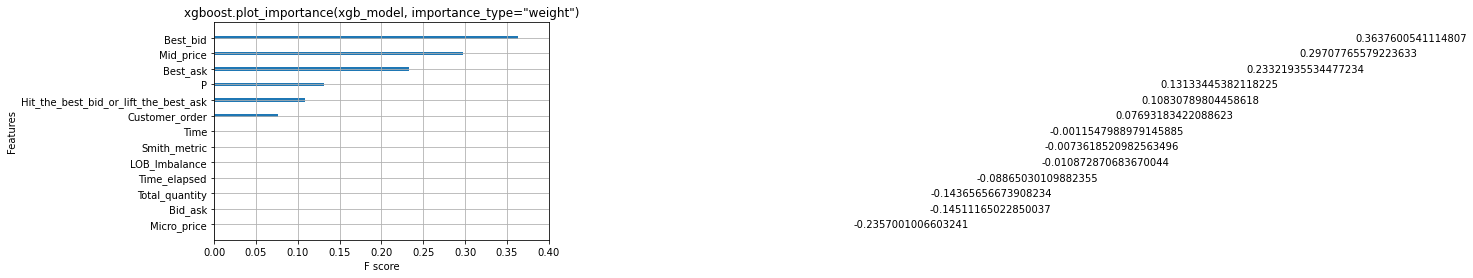

In [7]:
xgb.plot_importance(xgb_model, importance_type="weight")
plt.title('xgboost.plot_importance(xgb_model, importance_type="weight")')
plt.show()

In [8]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score,precision_score, recall_score 
import math

val_pred = xgb_model.predict(xgb_val)
print('MAE:',mean_absolute_error(y_val, val_pred))
print('RMSE:',mean_squared_error(y_val, val_pred, squared = False))
print('R2:',r2_score(y_val, val_pred))

MAE: 2.8407679631510123
RMSE: 4.002313524740746
R2: 0.6826623409167256


In [9]:
test_pred = xgb_model.predict(xgb_test)
print('MAE:',mean_absolute_error(y_test, test_pred))
print('RMSE:',mean_squared_error(y_test, test_pred, squared = False))
print('R2:',r2_score(y_test, test_pred))

MAE: 2.8996289990123616
RMSE: 4.275870826556185
R2: 0.6276594093645933


# Feature selection

In [10]:
X = X.drop(labels = ['Time', 'Bid_ask'], axis = 1)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

xgb_val = xgb.DMatrix(X_val, label = y_val)
xgb_train = xgb.DMatrix(X_train, label = y_train)
xgb_test = xgb.DMatrix(X_test, label = y_test)

X.head(10)

,Hit_the_best_bid_or_lift_the_best_ask,Customer_order,Mid_price,Micro_price,Best_bid,Best_ask,Time_elapsed,LOB_Imbalance,Total_quantity,P,Smith_metric
0,0,137,544.0,771.5000,89,999,0.0000,0.5000,4,0.0000,0.0000
1,0,106,93.0,92.6364,89,97,5.0250,0.5000,11,0.0000,0.0000
2,1,96,82.0,79.0000,67,97,0.0250,0.6667,10,0.0000,0.0000
3,0,144,88.0,87.4444,83,93,4.0625,0.6667,18,93.6567,422.7540
4,1,139,89.5,88.3750,85,94,1.6250,0.5000,24,78.6667,435.5288
5,0,111,90.5,89.8519,87,94,0.9500,0.5000,27,79.9300,383.1083
6,1,116,96.5,95.2143,92,101,1.9000,0.5000,28,80.9767,344.9081
7,0,150,98.0,97.4000,95,101,0.7500,0.5000,30,84.0433,307.1081
8,0,119,98.0,97.7273,95,101,1.2875,0.5000,33,86.0400,280.1203
9,1,98,95.5,94.8125,90,101,0.0625,0.5000,32,87.0800,260.5911


In [11]:
params = {
    'booster': 'gblinear',
    'objective': 'reg:squarederror',
    'lambda': 2,
    'eta': 0.1,
    'seed': 1000,
}

plst = list(params.items())

num_rounds = 50000
xgb_model = xgb.train(plst, xgb_val, num_rounds)

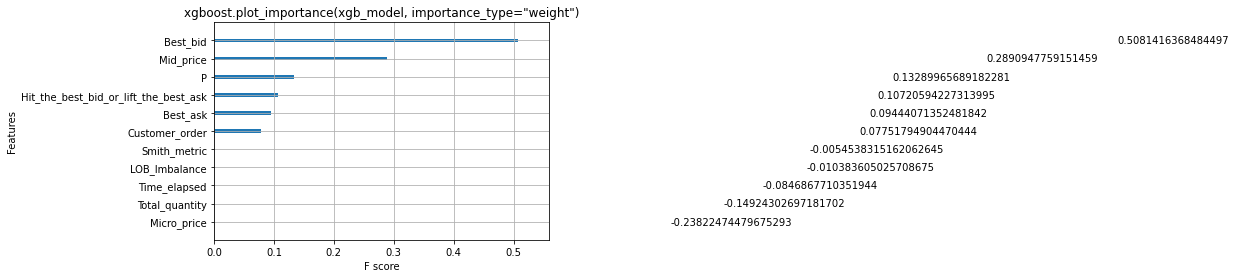

In [12]:
xgb.plot_importance(xgb_model, importance_type="weight")
plt.title('xgboost.plot_importance(xgb_model, importance_type="weight")')
plt.show()

In [13]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score,precision_score, recall_score 
import math

val_pred = xgb_model.predict(xgb_val)
print('MAE:',mean_absolute_error(y_val, val_pred))
print('RMSE:',mean_squared_error(y_val, val_pred, squared = False))
print('R2:',r2_score(y_val, val_pred))

MAE: 2.843980738526848
RMSE: 4.007033157636488
R2: 0.6819134738830446


In [14]:
test_pred = xgb_model.predict(xgb_test)
print('MAE:',mean_absolute_error(y_test, test_pred))
print('RMSE:',mean_squared_error(y_test, test_pred, squared = False))
print('R2:',r2_score(y_test, test_pred))

MAE: 2.900485977857821
RMSE: 4.272340754427733
R2: 0.6282739492457519


# Test Dataset validation

In [15]:
test_dataset = read_csv('C:/Users/12569/Desktop/final project/test.csv')

test_dataset.head(10)

,Time,Hit_the_best_bid_or_lift_the_best_ask,Customer_order,Bid_ask,Mid_price,Micro_price,Best_bid,Best_ask,Time_elapsed,LOB_Imbalance,Total_quantity,P,Smith_metric,Trade_price
0,5.2125,0,121,117,81.5,69.8000,23,140,0.0000,0.5000,5,0.0000,0.0000,121
1,6.7625,0,126,109,79.5,40.5714,25,134,1.5500,0.5000,7,0.0000,0.0000,77
2,10.1000,0,101,10,94.0,93.0000,89,99,3.3375,0.5000,15,0.0000,0.0000,97
3,11.3500,0,116,8,93.0,93.0000,89,97,1.2500,0.5000,16,88.1033,28.2398,90
4,11.5625,0,144,14,96.0,95.5333,89,103,0.2125,0.5000,15,79.8900,29.5207,96
5,12.2375,1,137,13,99.5,99.1176,93,106,0.6750,0.5000,17,85.1900,26.6811,103
6,14.2000,0,129,7,102.5,103.0000,99,106,1.9625,0.5000,21,87.4333,25.4338,100
7,14.6250,1,132,22,110.0,111.7368,99,121,0.4250,0.5000,19,90.1533,25.1517,106
8,16.5125,0,134,9,111.5,112.2500,107,116,1.8875,0.5000,24,93.1433,24.3417,109
9,21.0750,0,150,7,112.5,112.9118,109,116,4.5625,0.6667,34,95.1333,23.6318,112


In [16]:
X = test_dataset.drop(labels = ['Time', 'Bid_ask', 'Trade_price'], axis = 1)

X.head(10)

,Hit_the_best_bid_or_lift_the_best_ask,Customer_order,Mid_price,Micro_price,Best_bid,Best_ask,Time_elapsed,LOB_Imbalance,Total_quantity,P,Smith_metric
0,0,121,81.5,69.8000,23,140,0.0000,0.5000,5,0.0000,0.0000
1,0,126,79.5,40.5714,25,134,1.5500,0.5000,7,0.0000,0.0000
2,0,101,94.0,93.0000,89,99,3.3375,0.5000,15,0.0000,0.0000
3,0,116,93.0,93.0000,89,97,1.2500,0.5000,16,88.1033,28.2398
4,0,144,96.0,95.5333,89,103,0.2125,0.5000,15,79.8900,29.5207
5,1,137,99.5,99.1176,93,106,0.6750,0.5000,17,85.1900,26.6811
6,0,129,102.5,103.0000,99,106,1.9625,0.5000,21,87.4333,25.4338
7,1,132,110.0,111.7368,99,121,0.4250,0.5000,19,90.1533,25.1517
8,0,134,111.5,112.2500,107,116,1.8875,0.5000,24,93.1433,24.3417
9,0,150,112.5,112.9118,109,116,4.5625,0.6667,34,95.1333,23.6318


In [17]:
xgb_test = xgb.DMatrix(X)
trade_price_pred = xgb_model.predict(xgb_test)

In [18]:
print(trade_price_pred)

[ 62.212738  69.00502   86.63947   98.90669  101.046196 103.46683
 105.329666 107.96463  111.4485   112.38415  114.63032  114.005875
 111.49253  110.0649   107.45169  108.086174 110.38851  104.42945
 101.36207  100.427216 106.94559  105.95949  111.59821  112.202324
 112.51284  111.19019  104.69541  105.81819  107.3529   108.20848
 108.34188  106.43127  104.84278  105.230705 105.475204 108.56124
 106.116165 103.21962  101.24298  105.02661  105.20341  104.66942
 106.9884   107.56556  102.755424 102.55523  100.2436   102.01683
 101.84264  100.7977   100.37124   99.484024  98.85931  103.09339
  99.935814 101.80431  101.91477   99.98659  101.8991   101.33722
  99.90342   98.7999    98.80244  100.25347  102.40344  103.59846
 106.69281  105.01029  106.92646  107.29293  107.89952  107.605354
 108.87627  109.36803  106.85791  107.53552  107.6723   107.953156
 108.93665  106.11839  107.23485  105.24918  107.60401  110.546486
 110.968575 110.31985  109.002014 106.40558  106.69069  109.66609
 108.

In [19]:
import pandas as pd
trade_price_pred = pd.DataFrame(trade_price_pred)
trade_price_pred.to_csv('trade_price_pred.csv')